In [2]:
%%time
dataset_name = "W19_only"
df_list = "BES_Panel"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}
# (var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    
# get full set of inferred "cross wave" auth-lib/left-right values and ages
pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
# pan_dataset_allr_values = pan_dataset_allr_values.loc[BES_Panel.index].sort_index()
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')


Toggle code

Wall time: 2.75 s


In [3]:
# import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [4]:
memory_use(locs = locals().items())
gc.collect()

                     BES_Panel:  19.0MiB
              pan_dataset_ages:  16.7MiB
       pan_dataset_allr_values:   8.1MiB
             pan_dataset_votes:   6.6MiB
             BES_file_manifest:  61.9KiB
                      manifest:   1.6KiB
                          HTML:   1.0KiB
                StandardScaler:   1.0KiB
                      Pipeline:   1.0KiB
                  GridSearchCV:   1.0KiB


0

In [5]:
BES_Panel = pd.read_csv("E:\\BES_analysis_data\\92-97\\1992-1997BESPanel.csv")

In [6]:
BES_Panel.columns

Index(['Unnamed: 0', 'serialno', 'fldar92', 'streg92', 'opcs92', 'oopcs92',
       'pano92', 'opano92', 'intnm392', 'callno92',
       ...
       'hlhspr97', 'ssspr97', 'govnos97', 'cmpncr97', 'govcmp97', 'ptythn97',
       'ptycls97', 'idstrn97', 'ptyid97', 'study97'],
      dtype='object', length=1685)

In [7]:
data = pd.read_stata("E:\\BES_analysis_data\\92-97\\1992-1997BESPanel.dta", iterator = True)
labels = data.variable_labels()

In [8]:
# BES_Panel = pd.read_stata("E:\\BES_analysis_data\\92-97\\1992-1997BESPanel.dta")

In [9]:
labels["vote9297"]

'party r voted for in 1992 general el x55'

In [10]:
labels["vote97"]

"which party did r vote for '97g.elec?x7a"

In [11]:
# vote92

In [12]:
BES_Panel[search(BES_Panel,"wt").index]

,wtfactor,wtbbc992,wtbbc692,wtitnx92,wtitn592,wtbbcn92,wtc4_792,wtr4to92,rwttrt94,frwttr94,lwtaxi96
0,0.907,once/wk or less,never,4+days a week,never,never,never,never,no,yes,gone down a little
1,0.907,4+days a week,once/wk or less,4+days a week,once/wk or less,never,not answered,never,NaN,NaN,NaN
2,0.907,4+days a week,4+days a week,not answered,4+days a week,not answered,not answered,not answered,no,no,gone down a little
3,0.907,4+days a week,4+days a week,4+days a week,not answered,once/wk or less,not answered,not answered,yes,"skp, r did",gone down a lot
4,0.907,never,never,never,never,never,never,never,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3529,0.276,2-3 days a week,2-3 days a week,once/wk or less,once/wk or less,never,never,never,NaN,NaN,NaN
3530,0.276,never,once/wk or less,4+days a week,4+days a week,never,never,never,no,no,stayed the same
3531,0.276,once/wk or less,once/wk or less,4+days a week,not answered,not answered,not answered,not answered,NaN,NaN,NaN
3532,0.276,2-3 days a week,once/wk or less,once/wk or less,once/wk or less,never,never,never,NaN,NaN,NaN


In [13]:
round(pd.crosstab(BES_Panel["vote9297"].astype('category').cat.remove_categories(["not     answered","refused to disclose"]).cat.remove_unused_categories(),
                  BES_Panel["vote97"].astype('category').cat.remove_categories(["not     answered","refused disclos vote","communist party"]).cat.remove_unused_categories(),
                  values=BES_Panel["wtfactor"],aggfunc=sum,normalize='columns')*100,1)

vote97,conservative,don't know,green party,labour,liberal democrat,natural law party,other,plaid cymru,referendum party,"skp,didn't vote",snp
vote9297,,,,,,,,,,,
conservative,92.1,0.0,0.0,14.0,30.2,0.0,0.0,0.0,59.9,35.7,5.7
dk/cant remember,1.3,0.0,25.4,1.0,3.7,0.0,0.0,0.0,0.0,3.8,0.0
green party,0.0,0.0,23.8,0.8,0.5,0.0,0.0,0.0,0.0,0.0,0.0
labour,0.7,100.0,50.8,71.6,11.2,0.0,0.0,50.0,12.4,22.4,8.6
liberal democrat,3.0,0.0,0.0,9.2,52.3,0.0,100.0,0.0,25.0,7.8,5.7
no:did not vote,2.8,0.0,0.0,2.7,2.1,0.0,0.0,0.0,0.0,28.2,1.4
other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.8,0.6,0.0
plaid cymru,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0
snp,0.1,0.0,0.0,0.7,0.1,0.0,0.0,0.0,0.0,1.5,78.6


In [14]:
round(pd.crosstab(BES_Panel["vote9297"].astype('category').cat.remove_categories(["not     answered","refused to disclose"]).cat.remove_unused_categories(),
                  BES_Panel["vote97"].astype('category').cat.remove_categories(["not     answered","refused disclos vote","communist party"]).cat.remove_unused_categories(),
                  values=BES_Panel["wtfactor"],aggfunc=sum,normalize='all',margins=True)*100,1)

vote97,conservative,don't know,green party,labour,liberal democrat,natural law party,other,plaid cymru,referendum party,"skp,didn't vote",snp,All
vote9297,,,,,,,,,,,,
conservative,26.1,0.0,0.0,5.6,4.7,0.0,0.0,0.0,1.4,4.3,0.1,42.1
dk/cant remember,0.4,0.0,0.1,0.4,0.6,0.0,0.0,0.0,0.0,0.5,0.0,1.9
green party,0.0,0.0,0.1,0.3,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.5
labour,0.2,0.1,0.2,28.4,1.8,0.0,0.0,0.1,0.3,2.7,0.1,33.7
liberal democrat,0.8,0.0,0.0,3.7,8.2,0.0,0.1,0.0,0.6,0.9,0.1,14.4
no:did not vote,0.8,0.0,0.0,1.1,0.3,0.0,0.0,0.0,0.0,3.4,0.0,5.6
other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.1
plaid cymru,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.1
snp,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.2,1.1,1.6


In [15]:
BES_Panel["vote97"].astype('category').cat.categories

Index(['communist party', 'conservative', 'don't   know', 'green   party',
       'labour', 'liberal democrat', 'natural law party', 'not     answered',
       'other', 'plaid   cymru', 'referendum party', 'refused disclos vote',
       'skp,didn't vote', 'snp'],
      dtype='object')

In [16]:
BES_Panel["vote9297"].astype('category').cat.categories

Index(['conservative', 'dk/cant remember', 'green   party', 'labour',
       'liberal democrat', 'no:did not vote', 'not     answered', 'other',
       'plaid   cymru', 'refused to disclose', 'snp'],
      dtype='object')

In [17]:
BES_Panel = pd.read_csv("E:\\BES_analysis_data\\63-70\\STATA63-70PoliticalChangeinBritainData.csv")

In [18]:
# data = pd.read_stata("E:\\BES_analysis_data\\63-70\\STATA63-70PoliticalChangeinBritainData.dta", iterator = True)
# labels = data.variable_labels()

In [19]:
import pyreadstat    
dataframe, meta = pyreadstat.read_dta("E:\\BES_analysis_data\\63-70\\STATA63-70PoliticalChangeinBritainData.dta")

In [20]:
(BES_Panel=="Conservative").sum().sort_values()

Unnamed: 0    0
v772          0
v771          0
v770          0
v769          0
             ..
v300          0
v299          0
v298          0
v296          0
v1246         0
Length: 1468, dtype: int64

In [21]:
BES_Panel.dtypes.value_counts()

int64      1461
float64       7
dtype: int64

In [22]:
BES_Panel["v364"].value_counts()

0    1200
2     886
1     678
3     140
4       8
7       8
8       1
9       1
Name: v364, dtype: int64

In [23]:
replace_dict = {0:"DNV",1:"CON",2:"LAB",3:"LD",4:np.nan,5:np.nan,6:np.nan,7:np.nan,8:np.nan,9:np.nan}
BES_Panel["v364"].replace(replace_dict).value_counts()

DNV    1200
LAB     886
CON     678
LD      140
Name: v364, dtype: int64

In [24]:
round(pd.crosstab(BES_Panel["v363"].replace(replace_dict),BES_Panel["v364"].replace(replace_dict),normalize='columns',
           values=BES_Panel["v14"], aggfunc=sum)*100,1)
# 64 -> 66

v364,CON,DNV,LAB,LD
v363,,,,
CON,63.4,18.3,5.1,10.7
DNV,30.4,60.9,31.6,31.0
LAB,2.0,15.0,61.0,13.0
LD,4.2,5.8,2.4,45.2


In [25]:
round(pd.crosstab(BES_Panel["v364"].replace(replace_dict),BES_Panel["v365"].replace(replace_dict),normalize='columns',
           values=BES_Panel["v22"], aggfunc=sum)*100,1)
# 66->70

v365,CON,DNV,LAB,LD
v364,,,,
CON,62.0,18.5,2.9,7.5
DNV,19.0,44.6,12.8,20.9
LAB,12.1,32.6,82.2,27.5
LD,6.9,4.3,2.0,44.1


In [26]:
# i. COISEBYATIYES
# 2. LABOUR
# 3. LIBEIIALS
# 4. PLAID Cr""" (YELSB "ATIOUALIST)
# 5. CO(lBllNIST
# 6. PATPIOTIC PARTY
# 7. PEFUSED TO SA1
# 8. DT"EP
# 9. DK
# 0. IA. IIAP ('5'. *Y' OB '0' OW BEP. "0. 356).
# “ESPOYDENT "AS "02 I"TEHVIE"tD 1" 1964

In [27]:
#### okay - try face-to-face BES datasets

## Look for

# vote variable
# age variable
# class/income??



In [28]:
BES_Panel_19 = pd.read_stata("E:\\BES_analysis_data\\Face_to_face\\19\\bes_rps_2019_1.1.1.dta")
data = pd.read_stata("E:\\BES_analysis_data\\Face_to_face\\19\\bes_rps_2019_1.1.1.dta", iterator = True)
labels_19 = data.variable_labels()

In [29]:
BES_Panel_19.to_csv("E:\\BES_analysis_data\\Face_to_face\\19\\bes_rps_2019_1.1.1.csv")
pd.Series(labels_19).to_csv("E:\\BES_analysis_data\\Face_to_face\\19\\bes_rps_2019_1.1.1_labels.csv")

In [30]:
# labels_19

# Age: Age at last birthday
# 'y10_banded': 'Age at last birthday (banded)',
# 'Q24_CSES': 'Age',

# Vote
# 'u05': '2017 vote',
# 'p01': 'EU referendum vote recalled',
# 'p02': 'EU referendum vote intention',
# 'b09': 'Scottish independence referendum vote intention',
# 'b01': '2019 General Election turnout',
# 'b02': '2019 General Election vote',
# 'b04': '2019 General Election non-voter: Probable vote',

#Class
# 'w01': 'Subjective class',
# 'w02': 'Subjective class squeeze',
# 'w03': 'Subjective class of family growing up?',

#Demopgraphics
# everything in Y!


# weights
#  'wt_demog': 'VEP demographic weight (all modes)',
#  'wt_vote': 'VEP self-reported vote weight (all modes)',
#  'wt_demog_f2f': 'VEP demographic weight (face-to-face only)',
#  'wt_vote_f2f': 'VEP Self-reported vote weight (face-to-face only)',
#  'wt_demog_cses': 'VEP demographic weight (CSES only)',
#  'wt_vote_cses': 'VEP self-reported vote weight (CSES only)'}

In [31]:

vote_replace_dict = {"Conservative":"CON","Conservative Party":"CON",
                     "Labour":"LAB","Labour Party":"LAB",
                     "Did not vote":"DNV","No, did not vote":"DNV","Spoilt ballot paper":"DNV",
                     "Yes, voted":"VOTED",
                     "Liberal Democrat":"LD","Liberal Democrats":"LD",
                     "Don't know":"DK","Not stated":"DK","Prefer not to say/Refuse":"DK",
"Scottish National Party":"SNP","United Kingdom Independence Party (UKIP)":"UKIP",
"Green Party":"GP","Not eligible/too young to vote":"TYTV","Plaid Cymru":"PC",
"Brexit":"BXP","Brexit Party":"BXP",
"Other":"OTH","Independent":"OTH","Specified name- no party mentioned":"OTH","An independent candidate":"OTH",
                     "British National Party (BNP)":"BNP"}

vote_2019 = BES_Panel_19["b02"].replace(vote_replace_dict)
vote_2019.loc[BES_Panel_19["b01"].replace(vote_replace_dict)=="DNV"]="DNV"
vote_2019.loc[BES_Panel_19["b01"].replace(vote_replace_dict)=="DK"]="DK"
vote_2019.name = "2019GE"

BES_Panel_19["u05"].replace(vote_replace_dict).value_counts()

CON     1066
LAB      869
DNV      525
DK       319
LD       270
SNP      126
UKIP      82
GP        79
TYTV      72
PC        17
OTH       10
BXP        6
BNP        4
Name: u05, dtype: int64

In [32]:
# BES_Panel_19["b02"].replace(vote_replace_dict).value_counts()

In [33]:
BES_Panel_19["b01"].replace(vote_replace_dict).value_counts()

VOTED    3130
DNV       768
DK         48
Name: b01, dtype: int64

In [34]:
vote_2017 = BES_Panel_19["u05"].replace(vote_replace_dict)
vote_2017.name = "2017GE"

In [35]:
# replace_contents_dict = {x:x+"("+str(vote_2017.value_counts().loc[x])+")" for x in vote_2017.dropna().unique()}
# vote_2017 = vote_2017.replace(replace_contents_dict)

In [36]:
# replace_contents_dict = {x:x+"("+str(vote_2019.value_counts().loc[x])+")" for x in vote_2019.dropna().unique()}
# vote_2019 = vote_2019.replace(replace_contents_dict)

In [37]:
round(100*pd.crosstab(vote_2017.replace("BXP",np.nan),
                      vote_2019.replace("DK",np.nan).replace("UKIP",np.nan),
                      normalize='all',margins=True,
                     values=BES_Panel_19["wt_vote"],aggfunc=sum),1)

2019GE,BXP,CON,DNV,GP,LAB,LD,OTH,PC,SNP,All
2017GE,,,,,,,,,,
BNP,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
CON,0.2,20.0,5.2,0.1,1.1,1.7,0.3,0.0,0.1,28.7
DK,0.2,0.9,3.5,0.1,0.8,0.4,0.2,0.0,0.0,6.1
DNV,0.1,1.7,17.2,0.3,1.7,0.4,0.0,0.0,0.0,21.4
GP,0.0,0.2,0.0,0.6,0.6,0.3,0.0,0.0,0.0,1.8
LAB,0.3,2.2,4.3,0.5,16.0,1.3,0.1,0.0,0.2,24.8
LD,0.0,1.0,0.6,0.2,1.1,3.6,0.0,0.1,0.0,6.7
OTH,0.0,0.1,0.0,0.0,0.1,0.0,0.1,0.0,0.0,0.2
PC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.3


In [38]:
# vote_2017.replace(replace_contents_dict)

In [39]:
# 43.6/32.1

In [40]:
# 28.4/22.4

In [41]:
vote_19 = vote_2019

In [42]:
round(100*pd.crosstab(pd.Series(np.ones(vote_2019.shape)),
                      vote_2019.replace("DK",np.nan).replace("UKIP",np.nan),
                      normalize='all',margins=True,
                     values=BES_Panel_19["wt_vote"],aggfunc=sum),1)

2019GE,BXP,CON,DNV,GP,LAB,LD,OTH,PC,SNP,All
row_0,,,,,,,,,,
1.0,1.4,29.6,33.9,1.8,21.8,7.8,0.7,0.3,2.6,100.0
All,1.4,29.6,33.9,1.8,21.8,7.8,0.7,0.3,2.6,100.0


In [43]:
Age_2019 = BES_Panel_19["Age"]
Age_2019 = Age_2019.replace("Refusal",np.nan).replace("Not stated",np.nan).astype(float)

In [44]:
# BES_Panel["wt_vote"].loc[Age_2019.dropna().sort_values().index].cumsum()>(3502/2)

In [45]:
df = BES_Panel_19[["Age","wt_vote","b01"]].replace("Refusal",np.nan).replace("Not stated",np.nan)
df["b01"] = df["b01"].replace(vote_replace_dict).replace({"VOTED":1,"DNV":0,"DK":np.nan})
df["Age"] = df["Age"].astype(float)

def weighted_median(df, val, weight):
    df_sorted = df.sort_values(val)
    cumsum = df_sorted[weight].cumsum()
    cutoff = df_sorted[weight].sum() / 2.
    return df_sorted[cumsum >= cutoff][val].iloc[0]

weighted_median(df.dropna(),"Age","wt_vote")

50.0

In [46]:
df["turnout_weighted"]=df["b01"]*df["wt_vote"]

In [47]:
weighted_median(df[df["b01"]==1],"Age","wt_vote")

53.0

In [48]:
(df["Age"]*df["wt_vote"]).mean()

49.60691301558086

In [49]:
(df["Age"]*df["wt_vote"])[df["b01"]==1.0].mean()

43.330813911934854

In [50]:
df["turnout_weighted2"] = df["wt_vote"]
df.loc[df["b01"]!=1,"turnout_weighted2"]=np.nan

In [51]:
(df["Age"]*df["turnout_weighted2"]/np.mean(df["turnout_weighted2"].dropna())).mean()

52.18154187324838

In [52]:
# (df["Age"]*df["wt_vote"])[df["b01"]==1].dropna().mean()
sum(df["turnout_weighted2"].dropna())

2316.7765166455415

In [53]:
BES_Panel_19["y10_banded"].cat.categories

Index(['Not stated', 'Refusal', '18-24', '25-34', '35-44', '45-54', '55-64',
       '65-74', '75-84', '85+'],
      dtype='object')

In [54]:
BES_Panel_19["y17"][BES_Panel_19["y10_banded"].isin(['55-64',
       '65-74', '75-84', '85+'])].value_counts(normalize=True)

Retired from paid work                             0.603848
Working full time - employee (30+ hours)           0.165252
Working part time - employee (8-29 hours)          0.069610
Working full time - self-employed (30+ hours)      0.043011
Not working because long-term sick or disabled     0.039615
Working part time - self-employed (8-29 hours)     0.031126
Looking after the family or home                   0.022071
None of these                                      0.013016
Unemployed and actively seeking work               0.007923
Not working because temporarily sick or injured    0.002830
Not stated                                         0.001698
A full time student or pupil                       0.000000
Name: y17, dtype: float64

In [55]:
BES_Panel_19["y17"][BES_Panel_19["y10_banded"].isin(['18-24', '25-34', '35-44', '45-54',])].value_counts(normalize=True)

mask = BES_Panel_19["y10_banded"].isin(['18-24', '25-34', '35-44', '45-54',])
weighted_value_counts(BES_Panel_19["y17"][mask],BES_Panel_19["wt_vote"][mask],normalize=True)

,weighted_sample_fraction,raw_sample_size
y17,,
Not stated,0.00,1.0
Not working because temporarily sick or injured,0.01,16.0
Retired from paid work,0.01,13.0
None of these,0.01,18.0
Working part time - self-employed (8-29 hours),0.03,53.0
Unemployed and actively seeking work,0.03,54.0
Not working because long-term sick or disabled,0.03,69.0
Working full time - self-employed (30+ hours),0.07,124.0
Looking after the family or home,0.07,112.0


In [56]:

mask = BES_Panel_19["y10_banded"].isin(['55-64',])
weighted_value_counts(BES_Panel_19["y17"][mask],BES_Panel_19["wt_vote"][mask],normalize=True)
# BES_Panel["y17"][mask].value_counts(normalize=True)

,weighted_sample_fraction,raw_sample_size
y17,,
Not stated,0.00,0.0
A full time student or pupil,0.00,0.0
Not working because temporarily sick or injured,0.01,5.0
Unemployed and actively seeking work,0.02,13.0
None of these,0.03,14.0
Working part time - self-employed (8-29 hours),0.04,26.0
Looking after the family or home,0.04,25.0
Not working because long-term sick or disabled,0.08,49.0
Working full time - self-employed (30+ hours),0.09,54.0


In [57]:
mask = BES_Panel_19["y10_banded"].isin([ '65-74', '75-84', '85+'    ])
weighted_value_counts(BES_Panel_19["y17"][mask],BES_Panel_19["wt_vote"][mask],normalize=True)

,weighted_sample_fraction,raw_sample_size
y17,,
Not stated,0.00,1.0
Unemployed and actively seeking work,0.00,0.0
A full time student or pupil,0.00,0.0
Not working because temporarily sick or injured,0.00,0.0
Not working because long-term sick or disabled,0.01,14.0
Looking after the family or home,0.01,9.0
None of these,0.01,7.0
Working part time - self-employed (8-29 hours),0.02,27.0
Working full time - self-employed (30+ hours),0.02,19.0


In [58]:
mask = BES_Panel_19["y10_banded"].isin([ '55-64','65-74', '75-84', '85+'    ])
weighted_value_counts(BES_Panel_19["y17"][mask],BES_Panel_19["wt_vote"][mask],normalize=True)

,weighted_sample_fraction,raw_sample_size
y17,,
Not working because temporarily sick or injured,0.00,5.0
Not stated,0.00,1.0
A full time student or pupil,0.00,0.0
None of these,0.01,21.0
Unemployed and actively seeking work,0.01,13.0
Looking after the family or home,0.02,34.0
Working part time - self-employed (8-29 hours),0.03,53.0
Not working because long-term sick or disabled,0.04,63.0
Working full time - self-employed (30+ hours),0.05,73.0


In [59]:
BES_Panel_19["y17"][mask].value_counts(normalize=True)

Retired from paid work                             0.603848
Working full time - employee (30+ hours)           0.165252
Working part time - employee (8-29 hours)          0.069610
Working full time - self-employed (30+ hours)      0.043011
Not working because long-term sick or disabled     0.039615
Working part time - self-employed (8-29 hours)     0.031126
Looking after the family or home                   0.022071
None of these                                      0.013016
Unemployed and actively seeking work               0.007923
Not working because temporarily sick or injured    0.002830
Not stated                                         0.001698
A full time student or pupil                       0.000000
Name: y17, dtype: float64

In [60]:
weighted_value_counts(BES_Panel_19["y17"],BES_Panel_19["wt_vote"],normalize=True)

,weighted_sample_fraction,raw_sample_size
y17,,
Not stated,0.00,2.0
Not working because temporarily sick or injured,0.01,21.0
None of these,0.01,39.0
Unemployed and actively seeking work,0.02,67.0
Working part time - self-employed (8-29 hours),0.03,106.0
Not working because long-term sick or disabled,0.04,132.0
A full time student or pupil,0.05,98.0
Looking after the family or home,0.05,146.0
Working full time - self-employed (30+ hours),0.06,197.0


In [61]:
mask = BES_Panel_19["b01"].replace(vote_replace_dict)=="VOTED"
weighted_value_counts(BES_Panel_19["y17"][mask],BES_Panel_19["wt_vote"][mask],normalize=True)

,weighted_sample_fraction,raw_sample_size
y17,,
Not stated,0.00,1.0
Not working because temporarily sick or injured,0.00,12.0
None of these,0.01,26.0
Unemployed and actively seeking work,0.02,44.0
Not working because long-term sick or disabled,0.02,75.0
Working part time - self-employed (8-29 hours),0.03,90.0
Looking after the family or home,0.03,87.0
A full time student or pupil,0.05,76.0
Working full time - self-employed (30+ hours),0.06,164.0


In [62]:
# 'y01a': 'Thinking about the total income of your household from all sources before tax - ',
# 'Y01_detailed': 'What is the total annual income of your household from all sources before tax - ',
# 'y01_Annual': 'Income - gross household (Annual)',
# 'y01_Weekly': 'Income - gross household (Weekly)',
# 'y01_Monthly': 'Income - gross household (Monthly)',

In [63]:
labels_19

{'finalserialno': 'Final Serial Number',
 'agency': 'Fieldwork agency',
 'Y10A': 'Including yourself, how many adults aged 18 and over currently live in your hous',
 'Y10B1': 'A British Citizen',
 'Y10B2': 'A Citizen of the Republic of Ireland',
 'Y10B3': 'A Citizen of a Commonwealth country who has a ?right to remain? in the UK',
 'Y10B4': 'A Citizen of an EU country',
 'Y10B5': 'None of these',
 'a01': 'Most important issue (open text)',
 'a01_code': 'Most important issue (coded)',
 'a02': 'Best party on most important issue',
 'a03': 'Interest in politics',
 'm02_1': "Politicians don't care what people like me think",
 'm02_2': 'It is often difficult for me to understand what is going on',
 'm02_3': 'People like me have no say in what government does',
 'm02_4': 'The main political parties in Britain are pretty much all the same',
 'm02_5': 'UK parties/politicians fight eachother rather than further public interest',
 'm02_6': 'Politicians ignore the issues I really care about',
 'b

In [64]:
BES_Panel_19['y10_banded'].value_counts()

45-54         689
55-64         653
65-74         648
35-44         544
25-34         535
75-84         370
18-24         231
Refusal       179
85+            96
Not stated      1
Name: y10_banded, dtype: int64

In [65]:
# BES_Panel["y10_banded"].cat.categories

age_replace_dict = {'Not stated':"DK", 'Refusal':"DK", '18-24':"<55", '25-34':"<55", '35-44':"<55", '45-54':"<55",
     '55-64':"55+", '65-74':"55+", '75-84':"55+", '85+':"55+"}
age = BES_Panel_19["y10_banded"]
age = age.replace(age_replace_dict).replace("DK",np.nan)
age_19=age.copy()
age_19.value_counts()

<55    1999
55+    1767
Name: y10_banded, dtype: int64

In [66]:
# BES_Panel["y01_Annual"].cat.categories
inc_replace_dict = {'Not stated':"DK", 'Prefer not to say':"PNTS", "Don't know":"DK",
                    'Under £5,200':"0-15.6k", '£5,200 - £15,599':"0-15.6k",
                    '£15,600 - £25,999':"15.6-26k",
                    '£26,000 - £36,399':"26-36.4k",
                    '£36,400 - £46,799':"36.4-46.8k",
                    '£46,800 - £74,999':"46.8-75k",
                    '£75,000 - £149,999':"75k+",'£150,000 or more':"75k+"}
inc = BES_Panel_19["y01_Annual"].replace(inc_replace_dict).replace("DK",np.nan).replace("PNTS",np.nan)
inc_19 = inc.copy()
inc.value_counts()

15.6-26k      603
0-15.6k       595
46.8-75k      539
26-36.4k      510
75k+          449
36.4-46.8k    395
Name: y01_Annual, dtype: int64

In [67]:
# BES_Panel["y01_Annual"].value_counts()

In [68]:
# BES_Panel['y01_Annual'].value_counts(dropna=False)

In [1]:
# vote_2019

In [70]:
age_inc = age+"|"+inc
GE2019 = round(100*pd.crosstab(age_inc,
                      vote_2019,
                      normalize='index',margins=True,
                     values=BES_Panel_19["wt_vote"],aggfunc=sum),1)
GE2019

2019GE,BXP,CON,DK,DNV,GP,LAB,LD,OTH,PC,SNP,UKIP
row_0,,,,,,,,,,,
55+|0-15.6k,3.8,32.2,0.0,39.6,1.6,18.2,2.3,0.7,0.2,1.5,0.0
55+|15.6-26k,0.8,47.4,0.0,22.1,1.7,16.3,7.7,1.3,0.0,2.7,0.0
55+|26-36.4k,2.2,44.3,0.0,22.6,1.3,17.2,10.4,0.7,0.2,1.0,0.0
55+|36.4-46.8k,1.7,44.5,0.0,16.6,3.1,16.1,11.8,2.1,1.5,2.7,0.0
55+|46.8-75k,1.2,54.0,0.0,8.6,0.9,16.2,14.6,1.7,0.0,2.8,0.0
55+|75k+,0.0,39.6,0.0,18.6,1.7,18.2,16.3,2.9,0.0,2.7,0.0
<55|0-15.6k,0.6,10.8,0.0,61.0,1.3,19.8,3.1,0.6,0.4,2.3,0.1
<55|15.6-26k,0.7,14.9,0.0,57.6,0.9,20.8,2.3,0.5,0.5,2.0,0.0
<55|26-36.4k,0.0,23.7,0.0,41.4,1.8,26.8,3.8,0.0,0.0,2.5,0.0


In [71]:
fn = "E:\\BES_analysis_data\\Face_to_face\\17\\bes_f2f_2017_v1.5.dta"
BES_Panel_17 = pd.read_stata(fn,convert_categoricals=False)
cols = list(BES_Panel_17.columns)
cols.remove('ns_sec')
BES_Panel_17 = pd.read_stata(fn,columns=cols)
BES_Panel_17['ns_sec']=pd.read_stata(fn,columns=['ns_sec'],convert_categoricals=False)["ns_sec"]
data = pd.read_stata(fn, iterator = True)
labels_17 = data.variable_labels()

In [72]:
BES_Panel_17.to_csv("E:\\BES_analysis_data\\Face_to_face\\17\\bes_f2f_2017_v1.5.csv")
pd.Series(labels_17).to_csv("E:\\BES_analysis_data\\Face_to_face\\17\\bes_f2f_2017_v1.5.1_labels.csv")

In [73]:
# labels_17

In [74]:
age_replace_dict = {'Not stated':"DK", 'Refusal':"DK", 'Refused':"DK",'18-24':"<55", '25-34':"<55", '35-44':"<55", '45-54':"<55",
     '55-64':"55+", '65-74':"55+", '75-84':"55+", '85+':"55+"}
age = BES_Panel_17["y10_banded"]
age = age.replace(age_replace_dict).replace("DK",np.nan)
age_17 = age.copy()
age_17.value_counts(dropna=False)

<55    1146
55+    1029
NaN      19
Name: y10_banded, dtype: int64

In [75]:
# BES_Panel["y01_Annual"].cat.categories
# inc_replace_dict = {'Not stated':"DK", 'Prefer not to say':"PNTS", "Don't know":"DK",
#                     'Under £5,200':"<15.6k", '£5,200 - £15,599':"<15.6k",
#                     '£15,600 - £25,999':"15.6-26k",
#                     '£26,000 - £36,399':"26-36.4k",
#                     '£36,400 - £46,799':"36.4-46.8k",
#                     '£46,800 - £74,999':"46.8-75k",
#                     '£75,000 - £149,999':"75k+",'£150,000 or more':"75k+"}
inc_replace_dict = {'Refused':"DK", 'Don`t know':"DK",
                    'Under GBP 2,600':"0-15.6k", 'GBP 2,600 - GBP 5,199':"0-15.6k",
       'GBP 5,200 - GBP 10,399':"0-15.6k", 'GBP 10,400 - GBP 15,599':"0-15.6k",
       'GBP 15,600 - GBP 20,799':"15.6-26k", 'GBP 20,800 - GBP 25,999':"15.6-26k",
       'GBP 26,000 - GBP 31,199':"26-36.4k", 'GBP 31,200 - GBP 36,399':"26-36.4k",
       'GBP 36,400 - GBP 39,999':"36.4-45k", 'GBP 40,000 - GBP 44,999':"36.4-45k",
       'GBP 45,000 - GBP 49,999':"45-75k", 'GBP 50,000 - GBP 59,999':"45-75k",'GBP 60,000 - GBP 74,999':"45-75k",
        'GBP 75,000 - GBP 99,999':"75k+", 'GBP 100,000 or more':"75k+"}


inc = BES_Panel_17["y01"].replace(inc_replace_dict).replace("DK",np.nan).replace("PNTS",np.nan)\
    .astype('category').cat.reorder_categories(['0-15.6k', '15.6-26k', '26-36.4k', '36.4-45k', '45-75k', '75k+'])
inc_17 = inc.copy()
inc.value_counts().sort_index()

0-15.6k     432
15.6-26k    357
26-36.4k    281
36.4-45k    178
45-75k      334
75k+        183
Name: y01, dtype: int64

In [76]:
vote_replace_dict.update({"Conservatives":"CON","Refused":"DK","Scottish National Party (SNP)":"SNP",
                         "Don`t know":"DK","None/No party":"DNV",})
vote_2017 = BES_Panel_17["b02"].replace(vote_replace_dict)
vote_2017.loc[BES_Panel_17["b01"].replace(vote_replace_dict)=="DNV"]="DNV"
vote_2017.loc[BES_Panel_17["b01"].replace(vote_replace_dict)=="DK"]="DK"
vote_2017.name = "2017GE"
vote_2017.value_counts()

LAB     725
CON     671
DNV     462
LD      117
DK       75
SNP      49
UKIP     37
GP       31
PC       23
OTH       4
Name: 2017GE, dtype: int64

In [77]:
age_inc = age.astype(str)+"|"+inc.astype(str)
mask = age.notnull()&inc.notnull()&vote_2017.notnull()

GE2017 = round(100*pd.crosstab(age_inc[mask],
                      vote_2017[mask],
                      normalize='index',margins=True,
                     values=BES_Panel_17["wt_vote"][mask],aggfunc=sum),1)
GE2017


2017GE,CON,DK,DNV,GP,LAB,LD,OTH,PC,SNP,UKIP
row_0,,,,,,,,,,
55+|0-15.6k,35.3,0.0,26.4,0.4,30.5,0.9,0.0,0.7,3.1,2.6
55+|15.6-26k,50.0,0.0,14.3,0.8,20.9,4.5,0.9,0.6,1.7,6.2
55+|26-36.4k,44.7,0.0,13.5,3.7,23.6,8.6,0.0,1.3,2.3,2.4
55+|36.4-45k,46.8,0.0,8.7,0.0,36.5,4.6,0.0,1.5,2.1,0.0
55+|45-75k,50.1,0.0,9.5,0.0,24.2,9.8,0.0,3.0,3.4,0.0
55+|75k+,58.6,0.0,11.7,1.4,16.3,8.4,0.0,0.0,3.5,0.0
<55|0-15.6k,3.8,0.0,54.8,3.7,32.9,1.8,0.3,0.8,1.1,0.9
<55|15.6-26k,12.7,0.0,61.1,0.0,21.0,2.8,0.0,0.2,1.5,0.7
<55|26-36.4k,16.3,0.0,44.8,0.0,28.1,7.0,0.0,1.1,1.8,1.0


In [78]:
fn = "E:\\BES_analysis_data\\Face_to_face\\15\\bes_f2f_2015_v4.0.dta"
BES_Panel_15 = pd.read_stata(fn)#,convert_categoricals=False)
# cols = list(BES_Panel_17.columns)
# cols.remove('ns_sec')
# BES_Panel_17 = pd.read_stata(fn,columns=cols)
# BES_Panel_17['ns_sec']=pd.read_stata(fn,columns=['ns_sec'],convert_categoricals=False)["ns_sec"]
data = pd.read_stata(fn, iterator = True)
labels_15 = data.variable_labels()

In [79]:
# labels_15

In [80]:
age = BES_Panel_15["Age"].replace(-1,np.nan)
temp=age.copy()
age[temp>=55] = "55+"
age[temp<55] = "<55"
del temp
age_15  =age.copy()
age_15.value_counts(dropna=False)

<55    1632
55+    1323
NaN      32
Name: Age, dtype: int64

In [81]:
# BES_Panel_15["y01"]

In [82]:
# BES_Panel["y01_Annual"].cat.categories
# inc_replace_dict = {'Not stated':"DK", 'Prefer not to say':"PNTS", "Don't know":"DK",
#                     'Under £5,200':"<15.6k", '£5,200 - £15,599':"<15.6k",
#                     '£15,600 - £25,999':"15.6-26k",
#                     '£26,000 - £36,399':"26-36.4k",
#                     '£36,400 - £46,799':"36.4-46.8k",
#                     '£46,800 - £74,999':"46.8-75k",
#                     '£75,000 - £149,999':"75k+",'£150,000 or more':"75k+"}
inc_replace_dict = {'Refused':"DK", "Don't know":"DK", 'Don`t know':"DK",
                    'Under GBP 2,600':"0-15.6k", 'GBP 2,600 - GBP 5,199':"0-15.6k",
       'GBP 5,200 - GBP 10,399':"0-15.6k", 'GBP 10,400 - GBP 15,599':"0-15.6k",
       'GBP 15,600 - GBP 20,799':"15.6-26k", 'GBP 20,800 - GBP 25,999':"15.6-26k",
       'GBP 26,000 - GBP 31,199':"26-36.4k", 'GBP 31,200 - GBP 36,399':"26-36.4k",
       'GBP 36,400 - GBP 39,999':"36.4-45k", 'GBP 40,000 - GBP 44,999':"36.4-45k",
       'GBP 45,000 - GBP 49,999':"45-75k", 'GBP 50,000 - GBP 59,999':"45-75k",'GBP 60,000 - GBP 74,999':"45-75k",
        'GBP 75,000 - GBP 99,999':"75k+", 'GBP 100,000 or more':"75k+"}

inc = BES_Panel_15["y01"].replace(inc_replace_dict).replace("DK",np.nan).replace("PNTS",np.nan)\
    .astype('category').cat.reorder_categories(['0-15.6k', '15.6-26k', '26-36.4k', '36.4-45k', '45-75k', '75k+'])
inc_15 = inc.copy()
inc.value_counts().sort_index()

0-15.6k     672
15.6-26k    447
26-36.4k    322
36.4-45k    230
45-75k      367
75k+        199
Name: y01, dtype: int64

In [83]:
vote_replace_dict.update({"Conservatives":"CON","Refused":"DK","Scottish National Party (SNP)":"SNP",
                         "Don`t know":"DK","None/No party":"DNV",})
vote_2015 = BES_Panel_15["b02"].replace(vote_replace_dict)
vote_2015.loc[BES_Panel_15["b01"].replace(vote_replace_dict)=="DNV"]="DNV"
vote_2015.loc[BES_Panel_15["b01"].replace(vote_replace_dict)=="DK"]="DK"
vote_2015.name = "2015GE"
vote_2015.value_counts()

CON     836
DNV     780
LAB     677
UKIP    234
LD      158
DK      110
SNP     101
GP       66
OTH      12
PC       10
BNP       3
Name: 2015GE, dtype: int64

In [84]:
age_inc = age_15.astype(str)+"|"+inc.astype(str)
mask = age_15.notnull()&inc.notnull()&vote_2015.notnull()
print("N=",mask.sum())
GE2015 = round(100*pd.crosstab(age_inc[mask],
                      vote_2015[mask],
                      normalize='index',margins=True,
                     values=BES_Panel_15["wt_vote"][mask],aggfunc=sum),1)
GE2015
# [["CON(1348)","LAB(895)"]]

N= 2232


2015GE,BNP,CON,DK,DNV,GP,LAB,LD,OTH,PC,SNP,UKIP
row_0,,,,,,,,,,,
55+|0-15.6k,0.0,24.2,0.0,25.2,0.9,23.2,5.4,0.7,1.4,5.0,14.0
55+|15.6-26k,0.0,31.8,0.0,23.6,2.2,21.4,7.0,0.3,0.0,2.8,10.8
55+|26-36.4k,0.0,45.4,0.0,8.6,1.7,18.0,14.6,1.2,0.0,1.5,9.0
55+|36.4-45k,0.0,46.6,0.0,12.4,5.6,18.9,3.8,0.0,0.0,2.6,10.0
55+|45-75k,0.0,47.9,0.0,20.7,0.0,13.7,11.4,0.9,1.1,3.0,1.2
55+|75k+,0.0,50.7,0.0,13.6,0.0,7.6,11.7,1.8,0.0,3.0,11.5
<55|0-15.6k,0.2,5.3,0.0,60.1,1.9,21.3,1.2,0.0,0.8,3.7,5.5
<55|15.6-26k,0.0,12.7,0.0,51.8,1.9,19.1,3.0,0.0,0.6,2.8,8.0
<55|26-36.4k,0.3,19.1,0.0,44.2,4.2,20.1,6.2,0.0,0.0,0.9,5.0


In [85]:
fn = "E:\\BES_analysis_data\\Face_to_face\\10\\2010BESprepost.dta"
BES_Panel_10 = pd.read_stata(fn,convert_categoricals=False)
cols = list(BES_Panel_10.columns)
screwed_cols = ['bq55_2e','bq55_3e','cq38w']
[cols.remove(x) for x in screwed_cols]
BES_Panel_10 = pd.read_stata(fn,columns=cols)
BES_Panel_10[screwed_cols]=pd.read_stata(fn,columns=screwed_cols,convert_categoricals=False)[screwed_cols]
data = pd.read_stata(fn, iterator = True)
labels_10 = data.variable_labels()

In [86]:
# labels_10

In [87]:
# {k:v for k,v in labels_10.items() if "weight" in v}



In [88]:
replace_dict = {'not stated':np.nan,"refused":np.nan,"don't know":np.nan}
# four age variables!
age = BES_Panel_10[["aq63","bq89","cq42","zq89"]].replace(replace_dict).astype(float).fillna(method='ffill',axis=1)["zq89"]
temp=age.copy()
age[temp>=55] = "55+"
age[temp<55] = "<55"
del temp
age_10=age.copy()
age_10.value_counts(dropna=False)

<55    1978
55+    1525
NaN       9
Name: zq89, dtype: int64

In [89]:
inc = BES_Panel_10[["aq70","bq96","zq96"]].fillna(method='ffill',axis=1)["zq96"]

inc_replace_dict = {'0-5000':"0-15k", '5001-10000':"0-15k", '10001-15000':"0-15k",
        '15001-20000':"15-25k", '20001-25000':"15-25k",
        '25001-30000':"25-35k", '30001-35000':"25-35k",
        '35001-40000':"35-45k", '40001-45000':"35-45k",
        '45001-50000':"45-70k", '50001-60000':"45-70k", '60001-70000':"45-70k",
        '70001-80000':"70k+", '80001-90000':"70k+", '90001 & over':"70k+"}
inc=inc.replace(inc_replace_dict)

inc=inc.astype('category').cat.reorder_categories(['0-15k', '15-25k', '25-35k', '35-45k', '45-70k', '70k+'])
inc_10 = inc.copy()
inc.value_counts(dropna=False)

0-15k     873
NaN       797
15-25k    562
25-35k    382
45-70k    372
35-45k    286
70k+      240
Name: zq96, dtype: int64

In [90]:
# BES_Panel_10[["aq11_2","aq11_3","bq12_1","bq12_2"]]

In [91]:
# 'aq11_2': 'decided how to vote?',
#  'aq11_3': 'decided-vote which party',
#     'bq12_1': 'vote 2010 general election?',
#  'bq12_2': 'party vote 2010 general election',

In [92]:
vote_replace_dict.update({'united kingdom independence party (ukip)':"UKIP", 'liberal democrats':"LD",
       'labour':"LAB", 'conservatives':"CON", 'refused':"DK",
       'british national party (bnp)':"BNP", 'plaid cymru':"PC", 'green party':"GP",
       'scottish national party (snp)':"SNP", 'labour ':"LAB", "don't know":"DK", 'other':"OTH",
       'british national party (bnp) ':"BNP",
       'united kingdom independence party (ukip) ':"UKIP"})
vote_replace_dict.update({'refused':"DK", "don't know":"DK", 'yes, voted':"VOTED", 'no, did not vote':"DNV"})



In [93]:
vote_2010 = BES_Panel_10[["aq11_3","bq12_2"]].replace("DK",np.nan).fillna(method="ffill",axis=1)["bq12_2"].replace(np.nan,"DK")

vote_2010 = vote_2010.replace(vote_replace_dict)
vote_2010.loc[BES_Panel_10["bq12_1"].replace(vote_replace_dict)=="DNV"]="DNV"
vote_2010.loc[BES_Panel_10["bq12_1"].replace(vote_replace_dict)=="DK"]="DK"
vote_2010.name = "2010GE"
vote_2010.value_counts()

CON     888
LAB     814
DNV     678
LD      512
DK      369
SNP     113
UKIP     47
BNP      35
GP       25
PC       20
OTH      11
Name: 2010GE, dtype: int64

In [94]:
## OOPS - there are really 3 different datasets here!

# BES_Panel_20[[""]]

In [95]:
age_inc = age_10.astype(str)+"|"+inc.astype(str)
mask = age_10.notnull()&inc.notnull()&vote_2010.notnull()
print("N=",mask.sum())
GE2010=(pd.crosstab(age_inc[mask],
                      vote_2010[mask],
                      normalize='index',margins=True,
                     values=BES_Panel_10["panwgtc"][mask],aggfunc=sum)*1000).astype(int)/10
GE2010
## look at the DNV %!

N= 2712


2010GE,BNP,CON,DK,DNV,GP,LAB,LD,OTH,PC,SNP,UKIP
row_0,,,,,,,,,,,
55+|0-15k,0.4,32.4,2.0,14.6,1.8,30.1,14.9,0.3,0.2,1.6,1.2
55+|15-25k,0.8,33.9,4.5,13.4,0.0,30.1,15.3,0.0,0.0,0.7,0.9
55+|25-35k,2.5,53.7,1.3,9.8,0.0,12.6,17.6,0.0,0.9,0.0,1.3
55+|35-45k,0.0,47.7,0.0,7.4,0.0,21.1,17.4,2.8,0.0,3.3,0.0
55+|45-70k,0.0,47.5,1.6,7.9,0.0,14.5,24.0,0.0,0.0,2.1,2.2
55+|70k+,2.9,47.3,0.0,10.9,0.0,14.5,18.4,0.0,0.0,2.7,2.9
<55|0-15k,1.6,9.3,4.8,47.8,0.0,19.8,13.3,0.4,0.1,1.1,1.2
<55|15-25k,1.9,15.1,0.8,30.9,0.4,30.7,18.2,0.0,0.0,0.4,1.2
<55|25-35k,0.0,31.6,4.8,27.3,0.3,15.3,17.1,0.0,0.0,0.2,3.0


In [96]:
fn = "E:\\BES_analysis_data\\Face_to_face\\05_post_election\\2005BESb.dta"
BES_Panel_05 = pd.read_stata(fn,convert_categoricals=False)
# BES_Panel_10 = pd.read_stata(fn,convert_categoricals=False)
# cols = list(BES_Panel_10.columns)
# screwed_cols = ['bq55_2e','bq55_3e','cq38w']
# [cols.remove(x) for x in screwed_cols]
# BES_Panel_10 = pd.read_stata(fn,columns=cols)
# BES_Panel_10[screwed_cols]=pd.read_stata(fn,columns=screwed_cols,convert_categoricals=False)[screwed_cols]
data = pd.read_stata(fn, iterator = True)
labels_05 = data.variable_labels()

In [97]:
# labels_05

# 'aq48': 'age',
# 'bq77': 'age',
# 'tq77': 'combined age',
# 'cage': "r's age",
                
# 'aq55': 'annual household income',
# 'bq84': 'annual household income',
# 'tq84': 'combined-annual household income',
    
# 'aq10c': 'decided-which party',
# 'bq12a': 'vote in general election?',
# 'bq12b': 'party voted for general election',
    
    
# {k:v for k,v in labels_10.items() if "weight" in v}    
    
    # ptv!
#'cq22a': 'how likely vote conservative',
#  'cq22b': 'how likely vote labour',

In [98]:
# BES_Panel_05[["aq48","bq77","tq77","cage"]].replace(999,np.nan).isnull().sum()
age = BES_Panel_05[["aq48","bq77","tq77","cage"]].replace(999,np.nan).fillna(axis=1,method='ffill')["cage"]
temp=age.copy()
age[temp>=55] = "55+"
age[temp<55] = "<55"
del temp
age_05 = age.copy()
age_05.value_counts(dropna=False)

<55    2802
55+    1987
NaN       2
Name: cage, dtype: int64

In [99]:
replace_dict = {98:np.nan,99:np.nan,999:np.nan,9999:np.nan}
inc = BES_Panel_05[["aq55","bq84","tq84"]].replace(replace_dict).fillna(axis=1,method='ffill')["tq84"]
inc_replace_dict = {1:"0-15k", 2:"0-15k", 3:"0-15k",
        4:"15-25k", 5:"15-25k",
        6:"25-35k", 7:"25-35k",
        8:"35-45k", 9:"35-45k",
        10:"45-70k", 11:"45-70k", 12:"45-70k",
        13:"70k+"}
inc=inc.replace(inc_replace_dict)

inc=inc.astype('category').cat.reorder_categories(['0-15k', '15-25k', '25-35k', '35-45k', '45-70k', '70k+'])
inc_05 = inc.copy()
inc.value_counts(dropna=False)

0-15k     1542
15-25k     877
NaN        662
25-35k     630
45-70k     457
35-45k     442
70k+       181
Name: tq84, dtype: int64

In [100]:
# 'aq10c': 'decided-which party',
# 'bq12a': 'vote in general election?',
# 'bq12b': 'party voted for general election',

replace_dict = {1:"LAB",2:"CON",3:"LD",4:"SNP",5:"PC",6:"GP",7:"UKIP",8:"BNP",9:"OTH",98:"DK",99:"DK",999:"DK"}

vote_2005 = BES_Panel_05[["aq10c","bq12b"]].replace("DK",np.nan).fillna(method="ffill",axis=1)["bq12b"].replace(np.nan,"DK")

vote_2005 = vote_2005.replace(replace_dict)
vote_2005.loc[BES_Panel_05["bq12a"].replace({1:"VOTED",2:"DNV",9:"DK",99:"DK"})=="DNV"]="DNV"
vote_2005.loc[BES_Panel_05["bq12a"].replace({1:"VOTED",2:"DNV",9:"DK",99:"DK"})=="DK"]="DK"
vote_2005.name = "2005GE"
vote_2005.value_counts()

LAB     1198
DNV     1079
CON      867
DK       689
LD       645
SNP      137
PC        69
UKIP      45
OTH       36
GP        20
BNP        6
Name: 2005GE, dtype: int64

In [101]:
age_inc = age_05.astype(str)+"|"+inc.astype(str)
mask = age_05.notnull()&inc.notnull()&vote_2005.notnull()
print("N=",mask.sum())
GE2005 = (pd.crosstab(age_inc[mask],
                      vote_2005[mask],
                      normalize='index',margins=True,
                      values=BES_Panel_05["prewtbr"][mask],aggfunc=sum)*1000).astype(int)/10
GE2005
## look at the DNV %!

N= 4129


2005GE,BNP,CON,DK,DNV,GP,LAB,LD,OTH,PC,SNP,UKIP
row_0,,,,,,,,,,,
55+|0-15k,0.5,23.3,14.4,14.2,0.0,31.4,11.5,0.8,0.6,1.3,1.4
55+|15-25k,0.0,33.1,11.9,12.5,0.4,22.8,15.6,0.1,0.6,1.4,1.1
55+|25-35k,0.0,39.9,7.1,6.0,0.0,28.2,16.2,0.2,0.4,1.1,0.4
55+|35-45k,0.0,44.0,4.8,9.5,0.0,14.0,23.8,0.0,0.0,1.0,2.6
55+|45-70k,0.0,40.3,14.3,9.6,0.0,17.1,15.8,0.0,0.2,1.9,0.4
55+|70k+,0.0,20.0,13.3,8.6,0.0,33.2,20.5,0.0,1.0,0.0,3.0
<55|0-15k,0.2,4.8,24.3,43.3,0.3,14.7,9.1,0.0,0.2,0.8,1.7
<55|15-25k,0.0,10.4,21.8,29.2,0.0,21.3,14.2,0.7,0.1,0.5,1.3
<55|25-35k,0.5,14.2,18.0,24.4,0.6,29.5,8.9,0.8,0.1,1.5,1.0


In [102]:
fn = "E:\\BES_analysis_data\\Face_to_face\\01\\prepostagg_14SE.dta"
BES_Panel_01 = pd.read_stata(fn)#,convert_categoricals=False)
# BES_Panel_10 = pd.read_stata(fn,convert_categoricals=False)
# cols = list(BES_Panel_10.columns)
# screwed_cols = ['bq55_2e','bq55_3e','cq38w']
# [cols.remove(x) for x in screwed_cols]
# BES_Panel_10 = pd.read_stata(fn,columns=cols)
# BES_Panel_10[screwed_cols]=pd.read_stata(fn,columns=screwed_cols,convert_categoricals=False)[screwed_cols]
data = pd.read_stata(fn, iterator = True)
labels_01 = data.variable_labels()

In [103]:
# labels_01

# 'aq38': 'age in years',
# 'bq72': 'age',
# 'ageall': 'age-all respondents',
# 'ageoctmw': 'age w/ gender weight-post-election respondents',

# 'aq7a': 'decided how to vote',
# 'aq7b': 'if decided - party vote',

# 'bq8a': 'vote in 2001 general election',
# 'bq8b': 'party voted for',

# 'aq45': 'annual household income',
# 'aq46': 'main source of income',
# 'bq78': 'annual household income',
# 'bq79': 'main source of income',
# 'incomes': 'annual household income-summary',

# 'vote97s': 'vote 1997-summary',
# 'vscots': 'vote last election-scottish parliament-summary',
# 'vwales': 'vote last election-welsh assembly-summary',
# 'dailys': 'read daily morning newspapers-summary',
# 'wdailys': 'which morning newspaper-summary',
# 'owns': 'own or rent-summary',
# 'morts': 'own outright or mortgage-summary',
# 'trades': 'trade union member-summary',
# 'edquals': 'educational/work qualifications-summary',
# 'religs': 'belong to religion-summary',
# 'wreligs': 'religious denomination-summary',
# 'incomes': 'annual household income-summary',
# 'rsectors': 'r-occupational sector-summary',
# 'ssectors': 'spouse-occupational sector-summary',
# 'ethns': 'ethnicity-summary',
# 'mains': 'main source of income-summary',

# 'cq32a': 'prob vote-conservative',
# 'cq32b': 'prob vote-labour',
# 'cq32c': 'prob vote-liberal democrat',
# 'cq32d': 'prob vote-snp',
# 'cq32e': 'prob vote-plaid cymru',

In [104]:
replace_dict = {"not app":np.nan,'refused':np.nan,'na':np.nan,'refused, na':np.nan}
age = BES_Panel_01[["aq38","bq72","ageall"]].replace(replace_dict).astype(float).fillna(axis=1,method='ffill')["ageall"]
temp=age.copy()
age[temp>=55] = "55+"
age[temp<55] = "<55"
del temp
age_01 = age.copy()
age_01.value_counts(dropna=False)

<55    2329
55+    1556
NaN      15
Name: ageall, dtype: int64

In [105]:
# 'aq45': 'annual household income',
# 'aq46': 'main source of income',
# 'bq78': 'annual household income',
# 'bq79': 'main source of income',
# 'incomes': 'annual household income-summary',

inc_replace_dict = {'<5000':"0-15k", '5000-10000':"0-15k", '10001-15000':"0-15k",
        '15001-20000':"15-25k", '20001-25000':"15-25k",
        '25001-30000':"25-35k", '30001-35000':"25-35k",
        '35001-40000':"35-45k", '40001-45000':"35-45k",
        '45001-50000':"45-60k", '50001-60000':"45-60k", '60001 or more':"60k+",}

inc = BES_Panel_01[['aq45','bq78','incomes']].replace("refused",np.nan).replace("don't know",np.nan).fillna(axis=1,method='ffill')["incomes"]
inc=inc.replace(inc_replace_dict)

inc=inc.astype('category').cat.reorder_categories(['0-15k', '15-25k', '25-35k', '35-45k', '45-60k', '60k+'])
inc_01 = inc.copy()
inc.value_counts(dropna=False)

0-15k     1314
NaN       1095
15-25k     555
25-35k     392
35-45k     255
45-60k     150
60k+       139
Name: incomes, dtype: int64

In [106]:
vote_replace_dict.update({"not app":"DK","conservative":"CON","liberal democrat":"LD","snp":"SNP","greens":"GP",
                         "other [specify]":"OTH"})

vote_2001 = BES_Panel_01["bq8b"]

vote_2001 = vote_2001.replace(vote_replace_dict)
vote_2001.loc[BES_Panel_01["bq8a"].replace({"voted":"VOTED","didn't vote":"DNV","not app":"DK"})=="DNV"]="DNV"
vote_2001.loc[BES_Panel_01["bq8a"].replace({"voted":"VOTED","didn't vote":"DNV","not app":"DK"})=="DK"]="DK"
vote_2001.name = "2001GE"
vote_2001.value_counts()

LAB    1023
DK      951
DNV     827
CON     537
LD      381
SNP     100
PC       39
OTH      29
GP       13
Name: 2001GE, dtype: int64

In [107]:
age_inc = age_01.astype(str)+"|"+inc.astype(str)
mask = age_01.notnull()&inc.notnull()&vote_2001.notnull()
print("N=",mask.sum())
GE2001 = (pd.crosstab(age_inc[mask],
                      vote_2001[mask],
                      normalize='index',margins=True,
                      values=BES_Panel_01["postoctw"][mask],aggfunc=sum)*1000).astype(int)/10
GE2001
## look at the DNV %!

N= 2802


2001GE,CON,DK,DNV,GP,LAB,LD,OTH,PC,SNP
row_0,,,,,,,,,
55+|0-15k,23.2,2.1,13.9,0.1,45.0,12.4,1.2,0.2,1.4
55+|15-25k,34.0,1.5,17.9,0.0,27.3,17.9,0.0,0.7,0.5
55+|25-35k,26.8,0.0,18.9,0.0,31.5,20.0,0.0,0.4,2.0
55+|35-45k,35.5,0.0,18.6,0.0,36.1,8.7,0.0,1.0,0.0
55+|45-60k,47.7,0.0,12.3,0.0,23.6,14.7,0.0,0.0,1.5
55+|60k+,35.1,1.5,13.7,0.0,34.2,15.2,0.0,0.0,0.0
<55|0-15k,7.3,0.8,48.5,1.2,26.5,13.2,0.8,0.5,0.8
<55|15-25k,10.4,2.4,33.8,0.4,37.5,12.0,1.4,0.3,1.5
<55|25-35k,19.9,2.0,36.8,0.0,28.9,9.9,0.7,0.0,1.5


In [108]:
fn = "E:\\BES_analysis_data\\Face_to_face\\97\\97BES.dta"
BES_Panel_97 = pd.read_stata(fn)
data = pd.read_stata(fn, iterator = True)
labels_97 = data.variable_labels()

In [109]:
# labels_97

# 'agenr': 'record age of selected person q10 of q147',
# 'rage': "respondent's age in years last birthday? q630",
# 'ragecat': "respondent's age(grouped)   dv q631",
# 'rsexage': 'age grouped within gender    dv q632',

# 'hhincver': 'version of income question used? q855',
# 'hhincoma': 'total income per household before tax [card]? q856',
# 'hhincomb': 'total income per household before tax [ballot]? q856',
# 'hhincome': 'household income total before tax  dv  q860',
# 'hhincqua': 'household income quartiles (gb sample) q861',
# 'hhincqus': 'household income quartiles (scottish sample) q861',
# 'hhincque': 'household income quartiles (ethnic)  dv  q861',
# 'hhincqui': 'cses: household income quintiles (gb) q862',
# 'hhinquis': 'cses: household income quintile (scotland) q862',
# 'hhinquie': 'cses: household income quintile (ethnic)  862',

# 'votdlc': "did r vote in '97 local election? q244",
# 'votelc': "party r voted for '97 local election? q245",
# 'voted': 'did you manage to vote in general election? q206',
# 'vote': 'which party did you vote for in g.election? q216',    

#  'wtallgb': "weight: whole sample: britain  spring'97 q651",
#  'wtallsc': "weight: whole sample: scotland spring'97 q652",
#  'wtergb': "weight: electors only: britain spring'97 q653", <<<<<<<<<<
#  'wtersc': "weight: electors only: scotland spring'97 q654",

In [110]:
age = BES_Panel_97["rage"]
age = age.replace("don't   know",np.nan).replace("97+",97).replace('not     answered',np.nan).astype(float)
temp=age.copy()
age[temp>=55] = "55+"
age[temp<55] = "<55"
del temp
age_1997=age.copy()
age_1997.value_counts(dropna=False)

<55    2281
55+    1316
NaN      18
Name: rage, dtype: int64

In [111]:
BES_Panel_97[["hhincver","hhincoma","hhincomb","hhincome","hhincqua","hhincqus","hhincque","hhincqui","hhinquis","hhinquie"]]

replace_dict = {'form not completed':np.nan, 'lowest fifth of income':'1st fifth (lowest)',
       'second fifth of income':"2nd fifth", 'third fifth of income':'3rd fifth',
       'fourth fifth of income':'4th fifth', 'highest fifth of income':'5th fifth',
        'dont know':np.nan,
       'defaced ballot':np.nan, 'refusal':np.nan, 'not     answered':np.nan}
inc = BES_Panel_97["hhincqui"].replace(replace_dict)
inc = inc.astype('category').cat.reorder_categories(['1st fifth (lowest)',  '2nd fifth',
       '3rd fifth', '4th fifth', '5th fifth',])
inc_97 = inc.copy()
inc.value_counts()

1st fifth (lowest)    936
2nd fifth             714
3rd fifth             561
5th fifth             478
4th fifth             429
Name: hhincqui, dtype: int64

In [112]:
vote_replace_dict.update({'skp,didnt vote':"DNV",'refused to disclose voting':"DK",
                         'other party':"OTH",'referendum party':"REF",'not     answered':"DK"})

vote_1997 = BES_Panel_97["vote"]

vote_1997 = vote_1997.replace(vote_replace_dict)
vote_1997.loc[BES_Panel_97["voted"].replace({"voted":"VOTED","didn't vote":"DNV","not app":"DK"})=="DNV"]="DNV"
vote_1997.loc[BES_Panel_97["voted"].replace({"voted":"VOTED","didn't vote":"DNV","not app":"DK"})=="DK"]="DK"
vote_1997.name = "1997GE"
vote_1997.value_counts()

LAB    1367
DNV     766
CON     735
LD      459
SNP     132
DK       65
REF      54
OTH      19
PC       11
GP        7
Name: 1997GE, dtype: int64

In [113]:
age_inc = age_1997.astype(str)+"|"+inc.astype(str)
mask = age_1997.notnull()&inc.notnull()&vote_1997.notnull()
print("N=",mask.sum())
GE1997 = (pd.crosstab(age_inc[mask],
                      vote_1997[mask],
                      normalize='index',margins=True,
                      values=BES_Panel_97["wtergb"][mask],aggfunc=sum)*1000).astype(int)/10
GE1997
## look at the DNV %!

N= 3116


1997GE,CON,DK,DNV,GP,LAB,LD,OTH,PC,REF,SNP
row_0,,,,,,,,,,
55+|1st fifth (lowest),16.7,2.9,14.5,0.2,48.0,12.9,0.6,0.1,2.0,1.7
55+|2nd fifth,32.9,1.5,9.6,0.0,40.8,10.5,1.4,0.0,2.3,0.6
55+|3rd fifth,37.5,2.2,8.3,0.0,28.0,20.8,1.1,0.0,0.8,1.0
55+|4th fifth,37.3,4.1,6.2,0.0,31.1,15.7,0.0,0.0,3.1,2.1
55+|5th fifth,57.8,0.0,11.9,0.0,18.6,11.5,0.0,0.0,0.0,0.0
<55|1st fifth (lowest),6.8,0.0,34.2,1.0,46.3,8.3,0.1,0.3,0.3,2.2
<55|2nd fifth,11.6,1.2,22.7,0.0,45.3,12.9,2.0,0.2,1.3,2.3
<55|3rd fifth,15.2,1.3,25.0,0.0,39.8,14.3,0.2,0.3,2.5,0.8
<55|4th fifth,24.9,1.6,14.8,0.1,41.0,14.6,0.3,0.0,1.3,0.9


In [114]:
fn = "E:\\BES_analysis_data\\Face_to_face\\92\\92BES_14SE.dta"
# BES_Panel_92 = pd.read_stata(fn)
BES_Panel_92 = pd.read_stata(fn,convert_categoricals=False)
cols = list(BES_Panel_92.columns)
screwed_cols = ['polldist']
[cols.remove(x) for x in screwed_cols]
BES_Panel_92 = pd.read_stata(fn,columns=cols)
BES_Panel_92[screwed_cols]=pd.read_stata(fn,columns=screwed_cols,convert_categoricals=False)[screwed_cols]
data = pd.read_stata(fn, iterator = True)
labels_92 = data.variable_labels()

In [115]:
# labels_92

# 'arf8c': "non-respondent's age group   [drop]arf8c",
# 'v915c': "respondent's age last birthday?    q915c",
# 'ragecat': 'age of respondent (banded)            dv',
# 'rsexage': 'age within gender of respondent       dv',

# 'v920': 'main source of household income?    q920',
# 'v921': 'total income of household all source q921',
# 'hhincqua': 'household income quartile             dv',

# 'v7a': 'did you manage to vote in gen.elec.? q7a',
# 'v9a': 'which party did you vote for in g.elec? q9a',

# 'wtfactor': 'weight factor',

In [116]:
# BES_Panel_92[["arf8c","v915c","ragecat","rsexage"]].isnull().sum()

# a *lot* of missing ages!

In [117]:
age = BES_Panel_92["v915c"].replace({ 'refused':np.nan, 'not     answered':np.nan}).astype(float)
temp=age.copy()
age[temp>=55] = "55+"
age[temp<55] = "<55"
del temp
age_1992=age.copy()
age_1992.value_counts(dropna=False)

<55    2301
NaN    1747
55+    1184
Name: v915c, dtype: int64

In [118]:
BES_Panel_92[["v920","v921","hhincqua"]]

replace_dict = {'less than 5,999':"1st 1/4(lowest)", '6,000-  11,999':"2nd 1/4", '12,000- 19,999':"3rd 1/4", '20,000+':"4th 1/4",
       'refused':"PNTS", "don't   know":"DK", 'not     answered':"DK"}

inc = BES_Panel_92["hhincqua"].replace(replace_dict).replace("DK",np.nan).replace("PNTS",np.nan)

inc = inc.astype('category').cat.reorder_categories(['1st 1/4(lowest)',  '2nd 1/4',  '3rd 1/4', '4th 1/4'])
inc_92 = inc.copy()
inc.value_counts()

4th 1/4            940
3rd 1/4            728
1st 1/4(lowest)    717
2nd 1/4            697
Name: hhincqua, dtype: int64

In [119]:
vote_replace_dict.update({"voted":"VOTED","didn't vote":"DNV","not app":"DK",
                         "nf/bnp/brit.movement":"BNP","plaid   cymru":"PC","green   party":"GP",
                         "refused disclos vote":"DK","skp,didn't vote":"DNV"})



vote_1992 = BES_Panel_92["v9a"].replace(vote_replace_dict)

vote_1992.loc[BES_Panel_92["v7a"].replace(vote_replace_dict)=="DNV"]="DNV"
vote_1992.loc[BES_Panel_92["v7a"].replace(vote_replace_dict)=="DK"]="DK"
vote_1992.name = "1992E"
vote_1992.value_counts()

CON    1255
LAB    1047
LD      476
DNV     457
SNP     190
DK       85
OTH       9
GP        9
PC        5
BNP       1
Name: 1992E, dtype: int64

In [120]:
age_inc = age_1992.astype(str)+"|"+inc.astype(str)
mask = age_1992.notnull()&inc.notnull()&vote_1992.notnull()
print("N=",mask.sum())
GE1992 = (pd.crosstab(age_inc[mask],
                      vote_1992[mask],
                      normalize='index',margins=True,
                      values=BES_Panel_92["wtfactor"][mask],aggfunc=sum)*1000).astype(int)/10
GE1992

N= 3041


1992E,BNP,CON,DK,DNV,GP,LAB,LD,OTH,PC,SNP
row_0,,,,,,,,,,
55+|1st 1/4(lowest),0.0,30.7,2.4,14.1,0.0,40.9,10.6,0.0,0.0,1.0
55+|2nd 1/4,0.4,33.9,1.9,8.0,0.0,38.4,15.1,0.4,0.4,0.9
55+|3rd 1/4,0.0,57.1,1.5,7.6,0.0,15.1,16.4,0.8,0.0,1.3
55+|4th 1/4,0.0,60.2,1.8,6.5,0.0,11.1,19.2,0.0,0.0,0.9
<55|1st 1/4(lowest),0.0,14.8,1.1,26.1,0.0,40.5,12.7,0.1,0.5,3.9
<55|2nd 1/4,0.0,26.2,1.9,14.1,0.6,41.8,12.5,0.0,0.0,2.5
<55|3rd 1/4,0.0,35.2,1.7,9.9,0.4,32.1,17.6,0.0,0.2,2.5
<55|4th 1/4,0.0,52.3,2.2,8.7,0.3,18.2,15.9,0.2,0.0,1.9
All,0.0,38.7,1.9,11.5,0.2,30.1,14.9,0.1,0.1,1.9


In [121]:
fn = "E:\\BES_analysis_data\\Face_to_face\\87\\87BES_14SE.dta"
# BES_Panel_92 = pd.read_stata(fn)
BES_Panel_87 = pd.read_stata(fn,convert_categoricals=False)
cols = list(BES_Panel_87.columns)
screwed_cols = ['v13a','v13b','v13c','v13d','v13e','v13f',
                'v15b1','v15b2','v15b3','v15b4','v15b5','v15b6','v15b7','v15b8','v15b9','v15b10','v15b11',
                'v17a1','v17a2','v17a3','v17a4','v17a5','v17b1','v17b2','v17b3','v17b4a','v17b4b','v17b5',
                'v17c1','v17c2','v17c3','v17c4','v17c5','v18fil',
                'v18a','v18b','v18c','v18d','v18e','v18f','v18g','v18h','v18i','v18j',
                'v126',
               ]


[cols.remove(x) for x in screwed_cols]
BES_Panel_87 = pd.read_stata(fn,columns=cols)
BES_Panel_87[screwed_cols]=pd.read_stata(fn,columns=screwed_cols,convert_categoricals=False)[screwed_cols]
data = pd.read_stata(fn, iterator = True)
labels_87 = data.variable_labels()

In [122]:
# labels_87

# 'v58c': "resp's age last birthday",

# 'v6a': 'respondent voted in general election',
# 'v8a': 'party voted for in general election',

# 'v64': 'total household income before tax',

# 'weight': 'weighting variable',

In [123]:
age = BES_Panel_87["v58c"].replace("refused",np.nan).replace("not answered",np.nan).astype(float)
temp=age.copy()
age[temp>=55] = "55+"
age[temp<55] = "<55"
del temp
age_1987 =age.copy()
age_1987.value_counts(dropna=False)

<55    2507
NaN    2205
55+    1288
Name: v58c, dtype: int64

In [124]:
# BES_Panel_92[["v920","v921","hhincqua"]]

# replace_dict = {'less than 5,999':"1st 1/4(lowest)", '6,000-  11,999':"2nd 1/4", '12,000- 19,999':"3rd 1/4", '20,000+':"4th 1/4",
#        'refused':"PNTS", "don't   know":"DK", 'not     answered':"DK"}

# inc = BES_Panel_92["hhincqua"].replace(replace_dict).replace("DK",np.nan).replace("PNTS",np.nan)

# inc = inc.astype('category').cat.reorder_categories(['1st 1/4(lowest)',  '2nd 1/4',  '3rd 1/4', '4th 1/4'])
# inc.value_counts()

replace_dict = {'less than 3000':"0-5k", '3000-4999':"0-5k", '5000-5999':"05-10k", '6000-7999':"05-10k", '8000-9999':"05-10k",
       '10000-11999':"10-15k", '12000-14999':"10-15k", '15000-17999':"15k+", '18000-19999':"15k+",
       '20000-24999':"15k+", '25000-29999':"15k+", '30000+':"15k+", 'refused':"PNTS", 'dont know':"DK",
       'not answered':"DK"}


inc = BES_Panel_87["v64"].replace(replace_dict).replace("DK",np.nan).replace("PNTS",np.nan)
inc = inc.astype('category').cat.reorder_categories(["0-5k",  "05-10k",  "10-15k","15k+"])
inc_87 = inc.copy()
inc.value_counts().sort_index()

0-5k      872
05-10k    880
10-15k    698
15k+      907
Name: v64, dtype: int64

In [125]:
# BES_Panel_92[["v7a","v9a"]]


vote_replace_dict.update({"green/ecology":"GP","none/dont know":"DK","scottish national":"SNP","sdp/lib alliance":"LD",
                          "yes":"VOTED","no":"DNV"})



vote_1987 = BES_Panel_87["v8a"].replace(vote_replace_dict)

vote_1987.loc[BES_Panel_87["v6a"].replace(vote_replace_dict)=="DNV"]="DNV"
vote_1987.loc[BES_Panel_87["v6a"].replace(vote_replace_dict)=="DK"]="DK"
vote_1987.name = "1987GE"
vote_1987.value_counts()

CON    1405
LAB    1000
LD      754
DNV     531
DK       91
SNP      29
PC       10
GP        6
Name: 1987GE, dtype: int64

In [126]:
age_inc = age_1987.astype(str)+"|"+inc.astype(str)
mask = age_1987.notnull()&inc.notnull()&vote_1987.notnull()
print("N=",mask.sum())
GE1987=(pd.crosstab(age_inc[mask],
                      vote_1987[mask],
                      normalize='index',margins=True,
                      values=BES_Panel_87["weight"][mask],aggfunc=sum)*1000).astype(int)/10
GE1987

N= 3337


1987GE,CON,DK,DNV,GP,LAB,LD,PC,SNP
row_0,,,,,,,,
55+|0-5k,29.0,3.6,14.4,0.0,30.6,21.2,0.1,0.6
55+|05-10k,43.2,1.0,10.7,0.0,23.9,19.8,0.8,0.3
55+|10-15k,57.0,2.3,7.0,0.0,11.3,20.6,0.7,0.7
55+|15k+,57.8,3.6,4.9,2.0,7.3,21.5,0.0,2.6
<55|0-5k,16.1,0.6,19.8,0.0,48.7,13.9,0.0,0.6
<55|05-10k,27.6,1.9,16.6,0.0,35.6,17.1,0.3,0.5
<55|10-15k,37.4,1.5,10.8,0.3,25.9,23.0,0.1,0.6
<55|15k+,47.1,0.7,13.5,0.2,16.1,21.0,0.1,0.9
All,36.8,1.7,13.5,0.1,26.6,20.0,0.2,0.7


In [127]:
fn = "E:\\BES_analysis_data\\Face_to_face\\83\\83BES_14SE.dta"
BES_Panel_83 = pd.read_stata(fn)

data = pd.read_stata(fn, iterator = True)
labels_83 = data.variable_labels()

In [128]:
# labels_83

# 'q56': "respondent's age last birthday",

# 'q7a': 'did respondent vote 1983',
# 'q9a': '[if voted] party voted for',
    
#  'q50a': 'thinks hhold income above,below average',
#  'q50b': 'hhold income gt-lt prices, last year',
#  'q50c': 'hhold income gt-lt prices, next year',    
    
# 'weight': ''

In [129]:
inc = BES_Panel_83['q50a']
inc = inc.replace("dk",np.nan).replace("na",np.nan)\
        .replace("far belo average","below   average").replace("far abv average","above   average")\
        .replace("below   average","below average").replace("above   average","above average")\
        .cat.remove_unused_categories()
inc_83 = inc.copy()
inc.value_counts(dropna=False)

average          1959
below average    1177
above average     736
NaN                83
Name: q50a, dtype: int64

In [130]:
age = BES_Panel_83['q56'].replace("na",np.nan).astype('float')
temp=age.copy()
age[temp>=55] = "55+"
age[temp<55] = "<55"
del temp
age_83 = age.copy()
age_83.value_counts(dropna=False)

<55    2652
55+    1283
NaN      20
Name: q56, dtype: int64

In [131]:
vote_replace_dict.update({"con":"CON","lab":"LAB","skipped":"DK","alliance":"ALL","lib":"LD","social  democr":"SD",
                          "ecology party":"GP","other   party":"OTH","natnl   front":"BNP",
                          "yes":"VOTED","no":"DNV"})



vote_1983 = BES_Panel_83["q9a"].replace(vote_replace_dict)

vote_1983.loc[BES_Panel_83["q7a"].replace(vote_replace_dict)=="DNV"]="DNV"
vote_1983.loc[BES_Panel_83["q7a"].replace(vote_replace_dict)=="DK"]="DK"
vote_1983.name = "1983E"
vote_1983.value_counts()

CON    1432
LAB     937
DNV     660
ALL     416
LD      278
SD       94
DK       92
SNP      33
PC        7
OTH       2
GP        2
BNP       2
Name: 1983E, dtype: int64

In [132]:
age_inc = age_83.astype(str)+"|"+inc.astype(str)
mask = age_83.notnull()&inc.notnull()&vote_1983.notnull()
age_inc[age_83.isnull()|inc.isnull()] = np.nan
age_inc = age_inc.astype('category').cat.reorder_categories(["<55"+"|"+x for x in inc.cat.categories]+["55+"+"|"+x for x in inc.cat.categories])
print("N=",mask.sum())
GE1983 =(pd.crosstab(age_inc[mask],
                      vote_1983[mask],
                      normalize='index',margins=True,
                      values=BES_Panel_83["weight"][mask],aggfunc=sum)*1000).astype(int)/10
GE1983

N= 3852


1983E,ALL,BNP,CON,DK,DNV,GP,LAB,LD,OTH,PC,SD,SNP
row_0,,,,,,,,,,,,
<55|below average,10.5,0.1,21.8,2.3,22.9,0.0,31.8,7.1,0.0,0.0,2.0,0.9
<55|average,12.4,0.0,35.4,2.4,17.0,0.0,22.3,6.8,0.0,0.0,2.4,0.8
<55|above average,13.6,0.0,47.2,0.8,14.1,0.1,13.8,5.9,0.1,0.0,3.4,0.5
55+|below average,5.7,0.0,33.5,3.2,14.6,0.0,31.0,8.4,0.2,0.3,2.6,0.1
55+|average,7.8,0.0,43.3,2.2,14.1,0.0,21.7,7.5,0.0,0.6,1.7,0.5
55+|above average,9.4,0.8,49.6,2.2,11.9,0.0,12.9,8.4,0.0,0.0,2.3,2.0
All,10.5,0.0,36.5,2.2,16.6,0.0,23.3,7.1,0.0,0.1,2.4,0.7


In [133]:
fn = "E:\\BES_analysis_data\\Face_to_face\\79\\79BESS.dta"
# BES_Panel_79 = pd.read_stata(fn)
BES_Panel_79 = pd.read_stata(fn,convert_categoricals=False)
cols = list(BES_Panel_79.columns)
screwed_cols = ['m256313' ]

[cols.remove(x) for x in screwed_cols]
BES_Panel_79 = pd.read_stata(fn,columns=cols)
BES_Panel_79[screwed_cols]=pd.read_stata(fn,columns=screwed_cols,convert_categoricals=False)[screwed_cols]
data = pd.read_stata(fn, iterator = True)
labels_79 = data.variable_labels()

In [134]:
# labels_79

# 'm212284': "r's income or if married:both incs-q109",

# 'm114145': 'r voted in general electn-q39',
# 'm115147': 'party voted for in general election-q41',

#  'm115153': 'party voted for october 1974-q45',
#  'm124a154': 'party voted for february 1974-q46',
#  'm125155': 'party voted for 1970-q47',


# Wah! No age variable!
# use 'retired/not retired'

# 'm191279': 'in what year r born-q105',

In [135]:
BES_Panel_79["m212284"].cat.categories
replace_dict = {0:np.nan,    'up to $9 per week':"lowest 3rd",  '$10 to $13 per week':"lowest 3rd",
        '$14 to $18 per week':"lowest 3rd",  '$19 to $23 per week':"lowest 3rd",  '$24 to $28 per week':"lowest 3rd",
        '$29 to $33 per week':"lowest 3rd",  '$34 to $38 per week':"lowest 3rd",  '$39 to $48 per week':"middle 3rd",
        '$49 to $58 per week':"middle 3rd",  '$59 to $77 per week':"middle 3rd",  '$78 to $96 per week':"upper 3rd",
       '$97 to $115 per week':"upper 3rd",  '$116 to $140 per wk':"upper 3rd",  '$141 to $170 per wk':"upper 3rd",
              '$171 and over':"upper 3rd",           'dk-refused':"PNTS"}

inc = BES_Panel_79["m212284"].replace(replace_dict).replace("PNTS",np.nan)
inc = inc.astype('category').cat.reorder_categories(["lowest 3rd","middle 3rd","upper 3rd"])
inc_79 = inc.copy()
inc.value_counts(dropna=False)

upper 3rd     585
middle 3rd    541
lowest 3rd    401
NaN           366
Name: m212284, dtype: int64

In [136]:

vote_replace_dict.update({"con":"CON","lab":"LAB","skipped":"DK","alliance":"ALL","lib":"LD","social  democr":"SD",
                          "ecology party":"GP","other   party":"OTH","natnl   front":"BNP",
                          "yes":"VOTED","no":"DNV","dk-refused":"DK","liberal":"LIB",
                          "did vote":"VOTED","did not vote":"DNV"})



vote_1979 = BES_Panel_79["m115147"].replace(vote_replace_dict).replace(0,np.nan)
voting = BES_Panel_79["m114145"].replace(0,np.nan).replace(vote_replace_dict)
vote_1979.loc[voting=="DNV"]="DNV"
vote_1979.loc[voting=="DK"]="DK"
vote_1979.name = "1979GE"
vote_1979.value_counts()

CON    732
LAB    586
DNV    269
LIB    215
DK      52
SNP     14
OTH      7
PC       4
Name: 1979GE, dtype: int64

In [137]:
age = 1979-BES_Panel_79["m191279"].replace(0,np.nan).astype(float)
temp=age.copy()
age[temp>=55] = "55+"
age[temp<55] = "<55"
del temp
age_1979 = age.copy()
age_1979.value_counts(dropna=False)

<55    1274
55+     603
NaN      16
Name: m191279, dtype: int64

In [138]:
age_inc = age_1979.astype(str)+"|"+inc.astype(str)
mask = age_1979.notnull()&inc.notnull()&vote_1979.notnull()
age_inc[age_1979.isnull()|inc.isnull()] = np.nan
age_inc = age_inc.astype('category').cat.reorder_categories(["<55"+"|"+x for x in inc.cat.categories]+["55+"+"|"+x for x in inc.cat.categories])
print("N=",mask.sum())
GE1979 = (pd.crosstab(age_inc[mask],
                      vote_1979[mask],
                      normalize='index',margins=True,
                      )*1000).astype(int)/10
## No weights!
GE1979

N= 1525


1979GE,CON,DK,DNV,LAB,LIB,OTH,PC,SNP
row_0,,,,,,,,
<55|lowest 3rd,23.2,2.3,22.6,36.0,13.9,0.0,0.0,1.7
<55|middle 3rd,29.2,1.0,18.1,37.8,12.4,0.2,0.0,1.0
<55|upper 3rd,44.1,1.7,12.2,25.9,13.6,0.7,0.5,0.7
55+|lowest 3rd,38.5,2.6,13.1,35.0,10.5,0.0,0.0,0.0
55+|middle 3rd,42.2,1.9,9.7,34.4,9.7,1.2,0.0,0.6
55+|upper 3rd,48.7,1.2,3.7,32.5,11.2,0.0,0.0,2.5
All,37.2,1.7,14.3,32.6,12.3,0.4,0.1,0.9


In [139]:
fn = "E:\\BES_analysis_data\\Face_to_face\\74_october\\74oct.dta"
BES_Panel_74_oct = pd.read_stata(fn)

data = pd.read_stata(fn, iterator = True)
labels_74_oct = data.variable_labels()

In [140]:
# labels_74_oct

# 'oct191': 'year of birth',

# 'oct212': 'family income',
# 'oct213': 'income before or after tax',

# 'oct114': 'did respondent vote',
# 'oct115': 'party voted for',

#  'oct124': 'nonvoters probable vote',
#  'oct124a': 'vote in feb 1974',
#  'oct125': 'vote in 1970',

In [141]:
age = 1974-BES_Panel_74_oct["oct191"].replace(0,np.nan).replace('na',np.nan).astype(float)
temp=age.copy()
age[temp>=55] = "55+"
age[temp<55] = "<55"
del temp
age_1974_oct = age.copy()
age_1974_oct.value_counts(dropna=False)

<55    1571
55+     784
NaN      10
Name: oct191, dtype: int64

In [142]:
# BES_Panel_74_oct[["oct212","oct213"]].loc[BES_Panel_74_oct["oct212"]=="8"]

In [143]:
replace_dict = {"":np.nan,"7":np.nan,"8":np.nan,
                "A":"lowest 3rd","B":"lowest 3rd","C":"lowest 3rd","D":"lowest 3rd",
                "E":"middle 3rd","F":"middle 3rd","G":"middle 3rd",
                "H":"upper 3rd","I":"upper 3rd","J":"upper 3rd","K":"upper 3rd","L":"upper 3rd","M":"upper 3rd",
               }

# A-D, E-G,H-M

inc = BES_Panel_74_oct["oct212"].replace(replace_dict)
inc = inc.astype('category').cat.reorder_categories(["lowest 3rd","middle 3rd","upper 3rd"])
inc_74_oct = inc.copy()
inc.value_counts(dropna=False)

upper 3rd     827
lowest 3rd    599
middle 3rd    591
NaN           348
Name: oct212, dtype: int64

In [144]:

vote_replace_dict.update({"con":"CON","lab":"LAB","skipped":"DK","alliance":"ALL","lib":"LD","social  democr":"SD",
                          "ecology party":"GP","other   party":"OTH","natnl   front":"BNP",
                          "yes":"VOTED","no":"DNV","dk-refused":"DK","liberal":"LIB",
                          "did vote":"VOTED","did not vote":"DNV",
                          'dk or refused':"DK",'na':"DK",
                           "labour":"LAB","conservative":"CON","snp":"SNP","other":"OTH","plaid cymru":"PC"})



vote_1974_oct = BES_Panel_74_oct["oct115"].replace(vote_replace_dict).replace(0,np.nan)
voting = BES_Panel_74_oct["oct114"].replace(0,np.nan).replace(vote_replace_dict)
vote_1974_oct.loc[voting=="DNV"]="DNV"
vote_1974_oct.loc[voting=="DK"]="DK"
vote_1974_oct.name = "1974OCTGE"
vote_1974_oct.value_counts()

LAB    830
CON    704
LIB    352
DNV    347
DK      63
SNP     56
OTH      7
PC       6
Name: 1974OCTGE, dtype: int64

In [145]:
age_inc = age_1974_oct.astype(str)+"|"+inc.astype(str)
mask = age_1974_oct.notnull()&inc.notnull()&vote_1974_oct.notnull()
age_inc[age_1974_oct.isnull()|inc.isnull()] = np.nan
age_inc = age_inc.astype('category').cat.reorder_categories(["<55"+"|"+x for x in inc.cat.categories]+["55+"+"|"+x for x in inc.cat.categories])
print("N=",mask.sum())
GE1974OCT = (pd.crosstab(age_inc[mask],
                      vote_1974_oct[mask],
                      normalize='index',margins=True,
                      )*1000).astype(int)/10
## No weights!
GE1974OCT

N= 2010


1974OCTGE,CON,DK,DNV,LAB,LIB,OTH,PC,SNP
row_0,,,,,,,,
<55|lowest 3rd,17.4,1.6,24.4,38.1,15.7,0.0,0.4,2.0
<55|middle 3rd,21.0,1.9,20.0,39.6,13.6,0.4,0.4,2.8
<55|upper 3rd,29.4,1.4,13.2,34.8,17.1,0.2,0.1,3.4
55+|lowest 3rd,35.4,2.8,9.8,34.9,14.3,0.0,0.5,1.9
55+|middle 3rd,30.4,1.7,11.6,38.5,14.0,1.1,0.0,2.3
55+|upper 3rd,50.3,2.3,6.9,27.1,12.4,0.0,0.0,0.7
All,28.7,1.8,14.8,36.0,15.1,0.2,0.2,2.6


In [146]:
fn = "E:\\BES_analysis_data\\Face_to_face\\74_february\\74feb.dta"
BES_Panel_74_feb = pd.read_stata(fn)

data = pd.read_stata(fn, iterator = True)
labels_74_feb = data.variable_labels()

In [147]:
# labels_74_feb

# 'feb191': 'year of birth',

# 'feb212': 'family income',
# 'feb213': 'income before or after tax',

# 'feb114': 'did respondent vote',
# 'feb115': 'party voted for',

# 'feb125': 'vote in 1970',
# 'feb126': 'vote in 1966',

In [148]:
age = 1974-BES_Panel_74_feb["feb191"].replace(0,np.nan).replace('na',np.nan).replace('refused',np.nan).astype(float)
temp=age.copy()
age[temp>=55] = "55+"
age[temp<55] = "<55"
del temp
age_1974_feb = age.copy()
age_1974_feb.value_counts(dropna=False)

<55    1580
55+     860
NaN      22
Name: feb191, dtype: int64

In [149]:
replace_dict = {"":np.nan,"7":np.nan,"8":np.nan,
                "A":"lowest 3rd","B":"lowest 3rd","C":"lowest 3rd","D":"lowest 3rd",
                "E":"middle 3rd","F":"middle 3rd","G":"middle 3rd",
                "H":"upper 3rd","I":"upper 3rd","J":"upper 3rd","K":"upper 3rd","L":"upper 3rd","M":"upper 3rd",
               }

inc = BES_Panel_74_feb["feb212"].replace(replace_dict)
inc = inc.astype('category').cat.reorder_categories(["lowest 3rd","middle 3rd","upper 3rd"])
inc_74_feb = inc.copy()
inc.value_counts(dropna=False)

upper 3rd     766
lowest 3rd    681
middle 3rd    606
NaN           409
Name: feb212, dtype: int64

In [150]:
# BES_Panel_79["m114145"]
# BES_Panel_79["m115147"]
# 'q7a': 'did respondent vote 1983',
# 'q9a': '[if voted] party voted for',


vote_replace_dict.update({"con":"CON","lab":"LAB","skipped":"DK","alliance":"ALL","lib":"LD","social  democr":"SD",
                          "ecology party":"GP","other   party":"OTH","natnl   front":"BNP",
                          "yes":"VOTED","no":"DNV","dk-refused":"DK","liberal":"LIB",
                          "did vote":"VOTED","did not vote":"DNV",
                          'dk or refused':"DK",'na':"DK","dk":"DK"})



vote_1974_feb = BES_Panel_74_feb["feb115"].replace(vote_replace_dict).replace(0,np.nan)
voting = BES_Panel_74_feb["feb114"].replace(0,np.nan).replace(vote_replace_dict)
vote_1974_feb.loc[voting=="DNV"]="DNV"
vote_1974_feb.loc[voting=="DK"]="DK"
vote_1974_feb.name = "1974FEBGE"
vote_1974_feb.value_counts()


# 'feb114': 'did respondent vote',
# 'feb115': 'party voted for',

LAB    841
CON    787
LIB    395
DNV    298
DK      94
SNP     38
PC       6
OTH      3
Name: 1974FEBGE, dtype: int64

In [151]:
age_inc = age_1974_feb.astype(str)+"|"+inc.astype(str)
mask = age_1974_feb.notnull()&inc.notnull()&vote_1974_feb.notnull()
age_inc[age_1974_feb.isnull()|inc.isnull()] = np.nan
age_inc = age_inc.astype('category').cat.reorder_categories(["<55"+"|"+x for x in inc.cat.categories]+["55+"+"|"+x for x in inc.cat.categories])
print("N=",mask.sum())
GE1974FEB = (pd.crosstab(age_inc[mask],
                      vote_1974_feb[mask],
                      normalize='index',margins=True,
                      )*1000).astype(int)/10
## No weights!
GE1974FEB

N= 2041


1974FEBGE,CON,DK,DNV,LAB,LIB,OTH,PC,SNP
row_0,,,,,,,,
<55|lowest 3rd,22.0,2.2,19.4,34.8,18.7,0.0,0.0,2.6
<55|middle 3rd,23.0,2.7,15.3,38.9,17.2,0.4,0.2,1.8
<55|upper 3rd,33.6,2.0,10.4,33.2,18.2,0.0,0.3,2.0
55+|lowest 3rd,36.2,4.1,11.9,33.5,11.9,0.2,0.7,1.2
55+|middle 3rd,35.5,1.7,8.8,40.8,13.0,0.0,0.0,0.0
55+|upper 3rd,48.3,0.8,4.0,31.4,14.5,0.0,0.0,0.8
All,31.5,2.5,12.4,35.2,16.1,0.1,0.2,1.6


In [152]:
fn = "E:\\BES_analysis_data\\Face_to_face\\63-70\\STATA63-70PoliticalChangeinBritainData_14SE.dta"
BES_Panel_63_70 = pd.read_stata(fn)
# BES_Panel_79 = pd.read_stata(fn,convert_categoricals=False)
# cols = list(BES_Panel_79.columns)
# screwed_cols = ['m256313',
#                ]


# [cols.remove(x) for x in screwed_cols]
# BES_Panel_79 = pd.read_stata(fn,columns=cols)
# BES_Panel_79[screwed_cols]=pd.read_stata(fn,columns=screwed_cols,convert_categoricals=False)[screwed_cols]
data = pd.read_stata(fn, iterator = True)
labels_63_70 = data.variable_labels()

In [153]:
# labels_63_70

In [154]:
# 'v938': 'AGE IN YEARS        1963',
# 'v939': 'AGE IN YEARS        1964',
# 'v940': 'AGE IN YEARS        1966',
# 'v941': 'AGE IN YEARS        1970',
# 'v942': 'AGE IN DECADES      1963',
# 'v943': 'AGE IN DECADES      1964',
# 'v944': 'AGE IN DECADES      1966',
# 'v945': 'AGE IN DECADES      1970',

# 'v356': '64 VOTE TURNOUT     1964',
# 'v357': '66 VOTE TURNOUT     1966',
# 'v358': '70 VOTE TURNOUT     1970',

# {k:v for k,v in labels_63_70.items() if "WEIGHT" in v}



# 'v513': 'RECALL 66 VOTE      1970',
# 'v517': 'RECALL 64 VOTE      1966',
# 'v518': 'RECALL 64 VOTE      1970',
# 'v524': 'RECALL 59 VOTE      1963',
# 'v525': 'RECALL 59 VOTE      1964',
# 'v526': 'RECALL 59 VOTE      1966',

# 'v1004': 'INCOME GROUP - H.H    63',
# 'v1005': 'INCOME GROUP - H.H    64',
# 'v1006': 'INCOME GROUP - H.H    66',
# 'v1007': 'INCOME GROUP - H.H    70',
# 'v1008': 'IS INCOME ESTIMATED-HH63',
# 'v1009': 'IS INCOME ESTIMATED-HH64',
# 'v1010': 'IS INCOME ESTIMATED-HH66',
# 'v1011': 'IS INCOME ESTIMATED-HH70',
# 'v1012': 'IS INCOME NOT FOR H.H?63',
# 'v1013': 'INCOME GROUP - R    1964',
# 'v1014': 'INCOME GROUP - R    1966',
# 'v1015': 'INCOME GROUP - R    1970',
# 'v1016': 'IS INCOME ESTIMATED-R 64',
# 'v1017': 'IS INCOME ESTIMATED-R 70',
# 'v1215': 'INCOME - 5 GROUPS   1963',
# 'v1216': 'INCOME - 5 GROUPS   1964',
# 'v1217': 'INCOME - 5 GROUPS   1966',
# 'v1218': 'INCOME - 5 GROUPS   1970'

In [155]:
# 'v363': 'DIRECTION OF 1964 VOTE64',
#  'v364': 'DIRECTION OF 1966 VOTE66',
#  'v365': 'DIRECTION OF 1970 VOTE70',
    
    
# BES_Panel_63_70["v363"].value_counts()

In [156]:


# BES_Panel_63_70[["v363","v364","v365"]].replace(replace_dict).isnull().sum()

In [157]:
# 'v356': '64 VOTE TURNOUT     1964',
# 'v357': '66 VOTE TURNOUT     1966',
# 'v358': '70 VOTE TURNOUT     1970',



# BES_Panel_63_70[["v356","v357","v358"]].stack().value_counts()

In [158]:
replace_dict_voting = {1:"VOTED",5:"DNV",0:"DK",8:"DK",9:"DK"}
replace_dict_64_66 = {1:"CON",2:"LAB",3:"LIB",4:"PC",5:"COM",6:"BNP",7:"DK",8:"OTH",9:"DK",0:np.nan}
replace_dict_70 = {1:"CON",2:"LAB",3:"LIB",4:"PC",5:"COM",6:"SNP",7:"DK",8:"OTH",9:"DK",0:np.nan}


voting = BES_Panel_63_70["v358"].replace(replace_dict_voting)
vote_70 = BES_Panel_63_70["v365"].replace(replace_dict_70)
vote_70.loc[voting=="DNV"]="DNV"
vote_70.loc[voting=="DK"]="DK"
vote_70.name = "1970GE"
vote_70.value_counts()

voting = BES_Panel_63_70["v357"].replace(replace_dict_voting)
vote_66 = BES_Panel_63_70["v364"].replace(replace_dict_64_66)
vote_66.loc[voting=="DNV"]="DNV"
vote_66.loc[voting=="DK"]="DK"
vote_66.name = "1966GE"
vote_66.value_counts()

voting = BES_Panel_63_70["v356"].replace(replace_dict_voting)
vote_64 = BES_Panel_63_70["v363"].replace(replace_dict_64_66)
vote_64.loc[voting=="DNV"]="DNV"
vote_64.loc[voting=="DK"]="DK"
vote_64.name = "1964GE"
vote_64.value_counts()

DK     1118
LAB     743
CON     662
DNV     211
LIB     170
PC        5
OTH       3
COM       1
Name: 1964GE, dtype: int64

In [159]:
# 'v939': 'AGE IN YEARS        1964',
# 'v940': 'AGE IN YEARS        1966',
# 'v941': 'AGE IN YEARS        1970',

# BES_Panel_63_70[["v939","v940","v941"]].replace(0,np.nan)

In [160]:
# 'v1004': 'INCOME GROUP - H.H    63',
# 'v1005': 'INCOME GROUP - H.H    64',
# 'v1006': 'INCOME GROUP - H.H    66',
# 'v1007': 'INCOME GROUP - H.H    70',
# 'v1008': 'IS INCOME ESTIMATED-HH63',
# 'v1009': 'IS INCOME ESTIMATED-HH64',
# 'v1010': 'IS INCOME ESTIMATED-HH66',
# 'v1011': 'IS INCOME ESTIMATED-HH70',
# 'v1012': 'IS INCOME NOT FOR H.H?63',
# 'v1013': 'INCOME GROUP - R    1964',
# 'v1014': 'INCOME GROUP - R    1966',
# 'v1015': 'INCOME GROUP - R    1970',
# 'v1016': 'IS INCOME ESTIMATED-R 64',
# 'v1017': 'IS INCOME ESTIMATED-R 70',
# 'v1215': 'INCOME - 5 GROUPS   1963',
# 'v1216': 'INCOME - 5 GROUPS   1964',
# 'v1217': 'INCOME - 5 GROUPS   1966',
# 'v1218': 'INCOME - 5 GROUPS   1970'

In [161]:
replace_dict= { 0:np.nan,14:"PNTS",15:np.nan,19:np.nan,
                1:"lowest 3rd",2:"lowest 3rd",3:"lowest 3rd",4:"lowest 3rd",5:"lowest 3rd",
                6:"middle 3rd",7:"middle 3rd",8:"middle 3rd",
                9:"upper 3rd",10:"upper 3rd",11:"upper 3rd",12:"upper 3rd",13:"upper 3rd",
              }
BES_Panel_63_70[["v1004","v1005","v1006","v1007"]].replace(replace_dict).replace("PNTS",np.nan).stack().value_counts()


# 1-5
# 6-8
# 9-13
inc_70 = BES_Panel_63_70["v1007"].replace(replace_dict).replace("PNTS",np.nan)
inc_70 = inc_70.astype('category').cat.reorder_categories(["lowest 3rd","middle 3rd","upper 3rd"])
inc_70.value_counts(dropna=False)


inc_66 = BES_Panel_63_70["v1006"].replace(replace_dict).replace("PNTS",np.nan)
inc_66 = inc_66.astype('category').cat.reorder_categories(["lowest 3rd","middle 3rd","upper 3rd"])
inc_66.value_counts(dropna=False)

inc_64 = BES_Panel_63_70["v1005"].replace(replace_dict).replace("PNTS",np.nan)
inc_64 = inc_64.astype('category').cat.reorder_categories(["lowest 3rd","middle 3rd","upper 3rd"])
inc_64.value_counts(dropna=False)




NaN           1337
lowest 3rd     631
middle 3rd     515
upper 3rd      439
Name: v1005, dtype: int64

In [162]:
age = BES_Panel_63_70["v941"].replace(0,np.nan).astype(float)
temp=age.copy()
age[temp>=55] = "55+"
age[temp<55] = "<55"
del temp
age_70 = age.copy()
age_70.value_counts(dropna=False)


age = BES_Panel_63_70["v940"].replace(0,np.nan).astype(float)
temp=age.copy()
age[temp>=55] = "55+"
age[temp<55] = "<55"
del temp
age_66 = age.copy()
age_66.value_counts(dropna=False)


age = BES_Panel_63_70["v939"].replace(0,np.nan).astype(float)
temp=age.copy()
age[temp>=55] = "55+"
age[temp<55] = "<55"
del temp
age_64 = age.copy()
age_64.value_counts(dropna=False)



<55    1175
NaN    1095
55+     652
Name: v939, dtype: int64

In [163]:
age_70.value_counts(dropna=False)

NaN    1568
<55     801
55+     553
Name: v941, dtype: int64

In [164]:
age =age_70
inc=inc_70

age_inc = age.astype(str)+"|"+inc.astype(str)
mask = age.notnull()&inc.notnull()&vote_70.notnull()
age_inc[age.isnull()|inc.isnull()] = np.nan
age_inc = age_inc.astype('category').cat.reorder_categories(["<55"+"|"+x for x in inc.cat.categories]+["55+"+"|"+x for x in inc.cat.categories])
print("N=",mask.sum())
GE1970 =(pd.crosstab(age_inc[mask],
                      vote_70[mask],
                      normalize='index',margins=True,
                      )*1000).astype(int)/10
## weights for every election *but* 1970!
GE1970

N= 1134


1970GE,CON,DNV,LAB,LIB,OTH,PC,SNP
row_0,,,,,,,
<55|lowest 3rd,34.0,14.8,46.8,4.2,0.0,0.0,0.0
<55|middle 3rd,31.3,17.7,33.8,13.5,0.0,3.3,0.0
<55|upper 3rd,39.0,16.7,36.2,6.9,0.1,0.5,0.1
55+|lowest 3rd,38.9,18.4,34.7,6.8,0.0,1.0,0.0
55+|middle 3rd,40.7,14.5,40.7,3.8,0.0,0.0,0.0
55+|upper 3rd,59.7,10.4,21.5,8.3,0.0,0.0,0.0
All,40.8,16.0,34.7,7.4,0.0,0.7,0.0


In [165]:

# BES_Panel_63_70['v12'].value_counts()

In [166]:
age =age_66
inc=inc_66

age_inc = age.astype(str)+"|"+inc.astype(str)
mask = age.notnull()&inc.notnull()&vote_66.notnull()
age_inc[age.isnull()|inc.isnull()] = np.nan
age_inc = age_inc.astype('category').cat.reorder_categories(["<55"+"|"+x for x in inc.cat.categories]+["55+"+"|"+x for x in inc.cat.categories])
print("N=",mask.sum())
GE1966 = (pd.crosstab(age_inc[mask],
                      vote_66[mask],
                      normalize='index',margins=True,
                      values=BES_Panel_63_70['v14'][mask],aggfunc=sum
                      )*1000).astype(int)/10
## weights for every election *but* 1970!
GE1966

N= 1792


1966GE,CON,DK,DNV,LAB,LIB,OTH,PC
row_0,,,,,,,
<55|lowest 3rd,19.2,0.0,19.9,52.7,7.1,0.0,0.9
<55|middle 3rd,23.5,0.5,15.6,53.8,5.6,0.2,0.6
<55|upper 3rd,37.2,0.1,14.4,38.6,9.3,0.0,0.1
55+|lowest 3rd,30.6,1.4,15.6,47.6,4.6,0.0,0.0
55+|middle 3rd,41.7,0.0,11.6,39.9,6.7,0.0,0.0
55+|upper 3rd,48.8,0.7,12.2,29.5,8.6,0.0,0.0
All,31.4,0.4,15.2,45.3,7.0,0.0,0.3


In [167]:
age =age_64
inc=inc_64

age_inc = age.astype(str)+"|"+inc.astype(str)
mask = age.notnull()&inc.notnull()&vote_64.notnull()
age_inc[age.isnull()|inc.isnull()] = np.nan
age_inc = age_inc.astype('category').cat.reorder_categories(["<55"+"|"+x for x in inc.cat.categories]+["55+"+"|"+x for x in inc.cat.categories])
print("N=",mask.sum())
GE1964 = (pd.crosstab(age_inc[mask],
                      vote_64[mask],
                      normalize='index',margins=True,
                      values=BES_Panel_63_70['v12'][mask],aggfunc=sum
                      )*1000).astype(int)/10
## weights for every election *but* 1970!
GE1964

N= 1578


1964GE,COM,CON,DK,DNV,LAB,LIB,OTH,PC
row_0,,,,,,,,
<55|lowest 3rd,0.0,23.9,0.9,16.6,50.5,6.8,0.4,0.6
<55|middle 3rd,0.0,26.1,0.7,12.3,48.7,11.7,0.2,0.0
<55|upper 3rd,0.0,43.4,0.5,8.7,32.9,13.9,0.0,0.2
55+|lowest 3rd,0.0,33.7,0.7,10.4,48.5,6.4,0.0,0.0
55+|middle 3rd,0.0,42.1,0.0,7.8,42.7,7.2,0.0,0.0
55+|upper 3rd,1.1,67.8,1.8,3.4,12.9,11.4,0.0,1.2
All,0.0,34.5,0.7,11.1,43.2,9.8,0.1,0.2


In [168]:
GE_list = {"1964":GE1964,"1966":GE1966,"1970":GE1970,
          "1974FEB":GE1974FEB,"1974OCT":GE1974OCT,
           "1979":GE1979,"1983":GE1983,"1987":GE1987,
          "1992":GE1992,"1997":GE1997,
          "2001":GE2001,"2005":GE2005,"2010":GE2010,
          "2015":GE2015,"2017":GE2017,"2019":GE2019,
          }

In [169]:
df_all_years = pd.DataFrame(columns = ['row_0', 'CON', 'LAB', 'age', 'income', 'relative income', 'GE'])
for year in GE_list.keys():
    df = GE_list[year].drop("All",errors='ignore').reset_index()
    df["age"] = df["row_0"].apply(lambda x: x.split("|")[0])
    df["income"] = df["row_0"].apply(lambda x: x.split("|")[1])
    inc_range = [x.split("|")[1] for x in df["row_0"] if "<55" in x]
    inc_dict = {inc_range[x]:(x+.5)/(len(inc_range)) for x in range(0,len(inc_range))}
    df["relative income"] = df["income"].replace(inc_dict)
    df["GE"] = year
    df_all_years = df_all_years.append(df)

df_all_years

bloc_replace_dict = {'LAB':"left-lib bloc",'CON':"right-auth bloc",
    'COM':"left-lib bloc", 'LIB':"left-lib bloc",  'PC':"left-lib bloc", 'SNP':"left-lib bloc", 'ALL':"left-lib bloc",  'GP':"left-lib bloc", 'LD':"left-lib bloc", 'SD':"left-lib bloc",
       'BNP':"right-auth bloc",'REF':"right-auth bloc", 'UKIP':"right-auth bloc", 'BXP':"right-auth bloc"}

# 'DK':"DK", 'DNV':"DNV",'OTH':"OTH",
left_lib_bloc =[]
right_auth_bloc =[]
for party in bloc_replace_dict.keys():
    if bloc_replace_dict[party]=="left-lib bloc":
        left_lib_bloc.append(party)
    elif bloc_replace_dict[party]=="right-auth bloc":
        right_auth_bloc.append(party)
# left_lib_bloc,right_auth_bloc

df_all_years["left-lib bloc"] = df_all_years[left_lib_bloc].sum(axis=1)
df_all_years["right-auth bloc"] = df_all_years[right_auth_bloc].sum(axis=1)

In [170]:
# df_all_years.columns

Wall time: 3.38 s


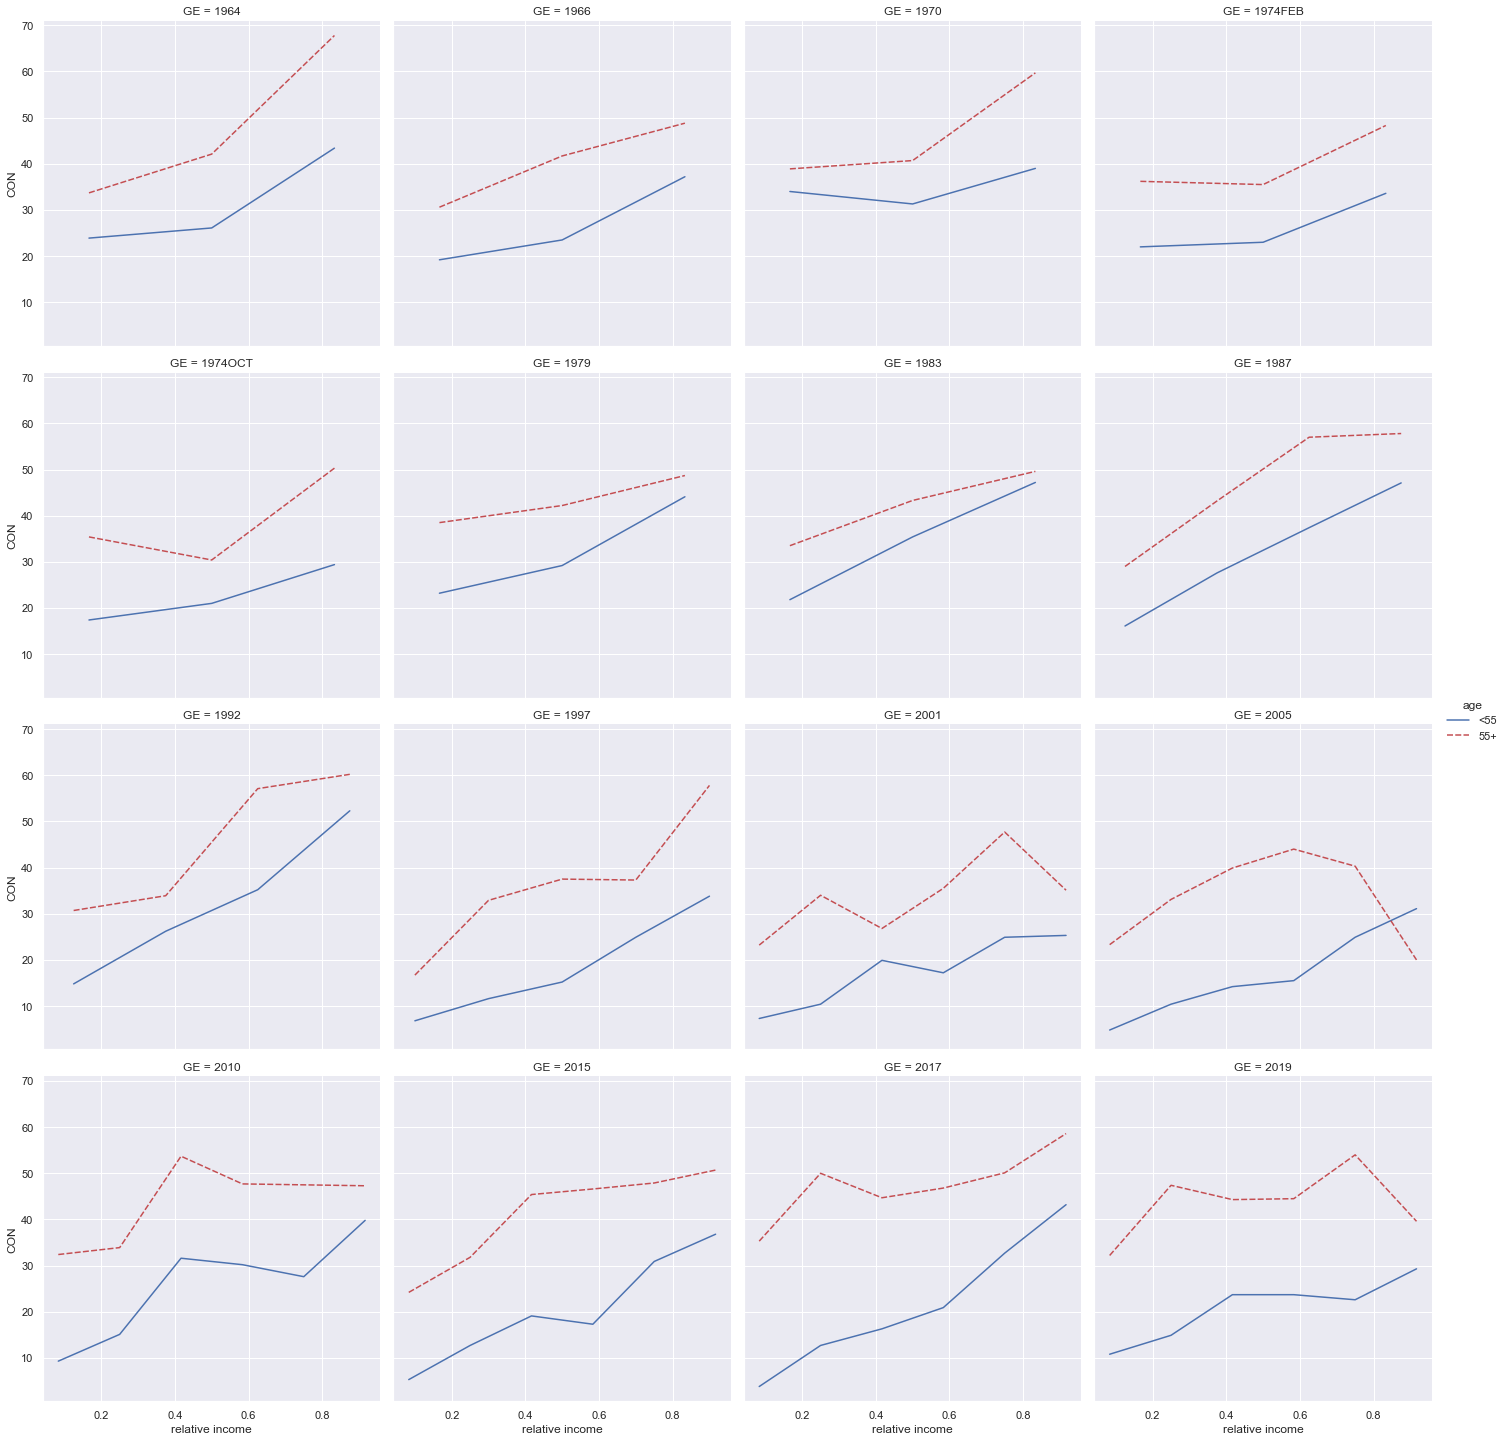

In [171]:
%%time
sns.relplot(
    data=df_all_years, x="relative income", y="CON", col="GE",
    hue="age", style="age",col_wrap=4,
    palette=["b", "r"],kind="line",
);

Wall time: 3.49 s


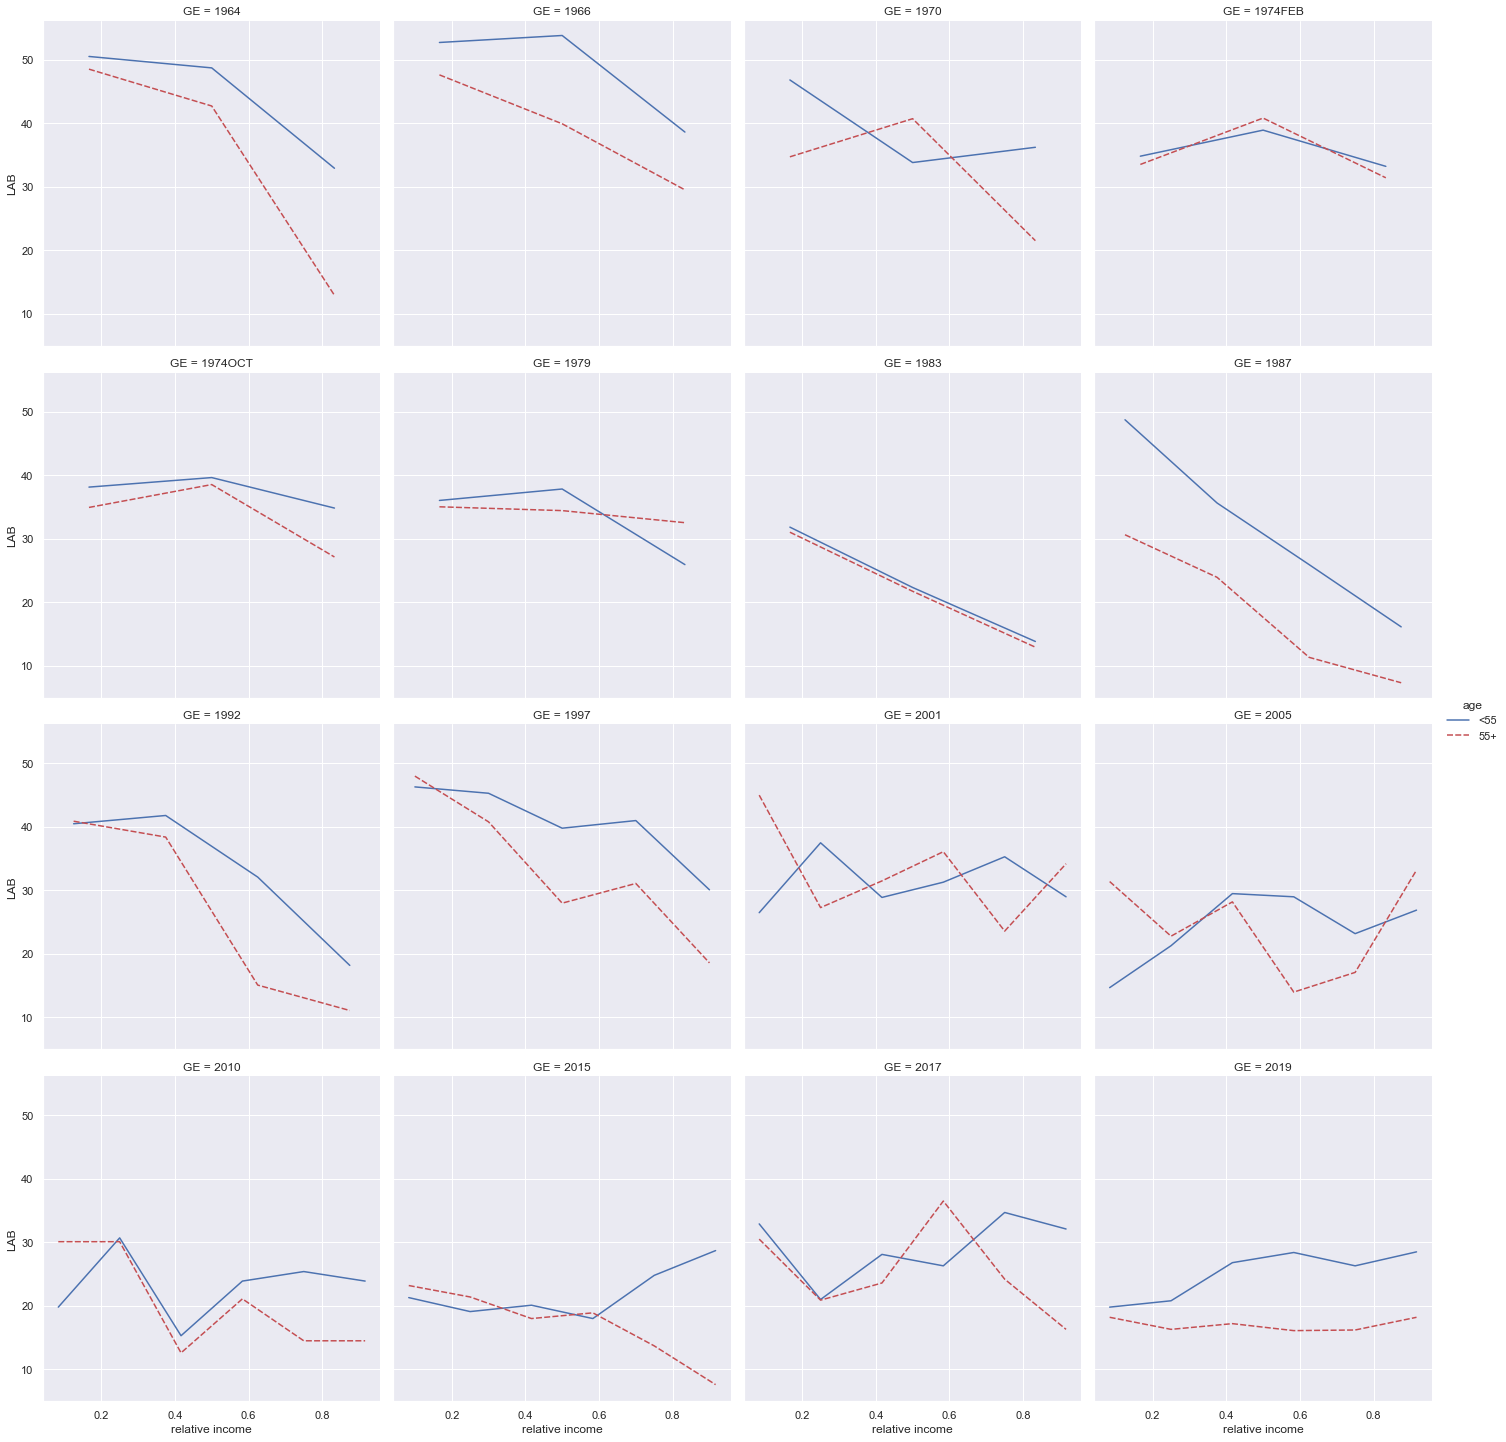

In [172]:
%%time
sns.relplot(
    data=df_all_years, x="relative income", y="LAB", col="GE",
    hue="age", style="age",col_wrap=4,
    palette=["b", "r"],kind="line",
);

Wall time: 3.58 s


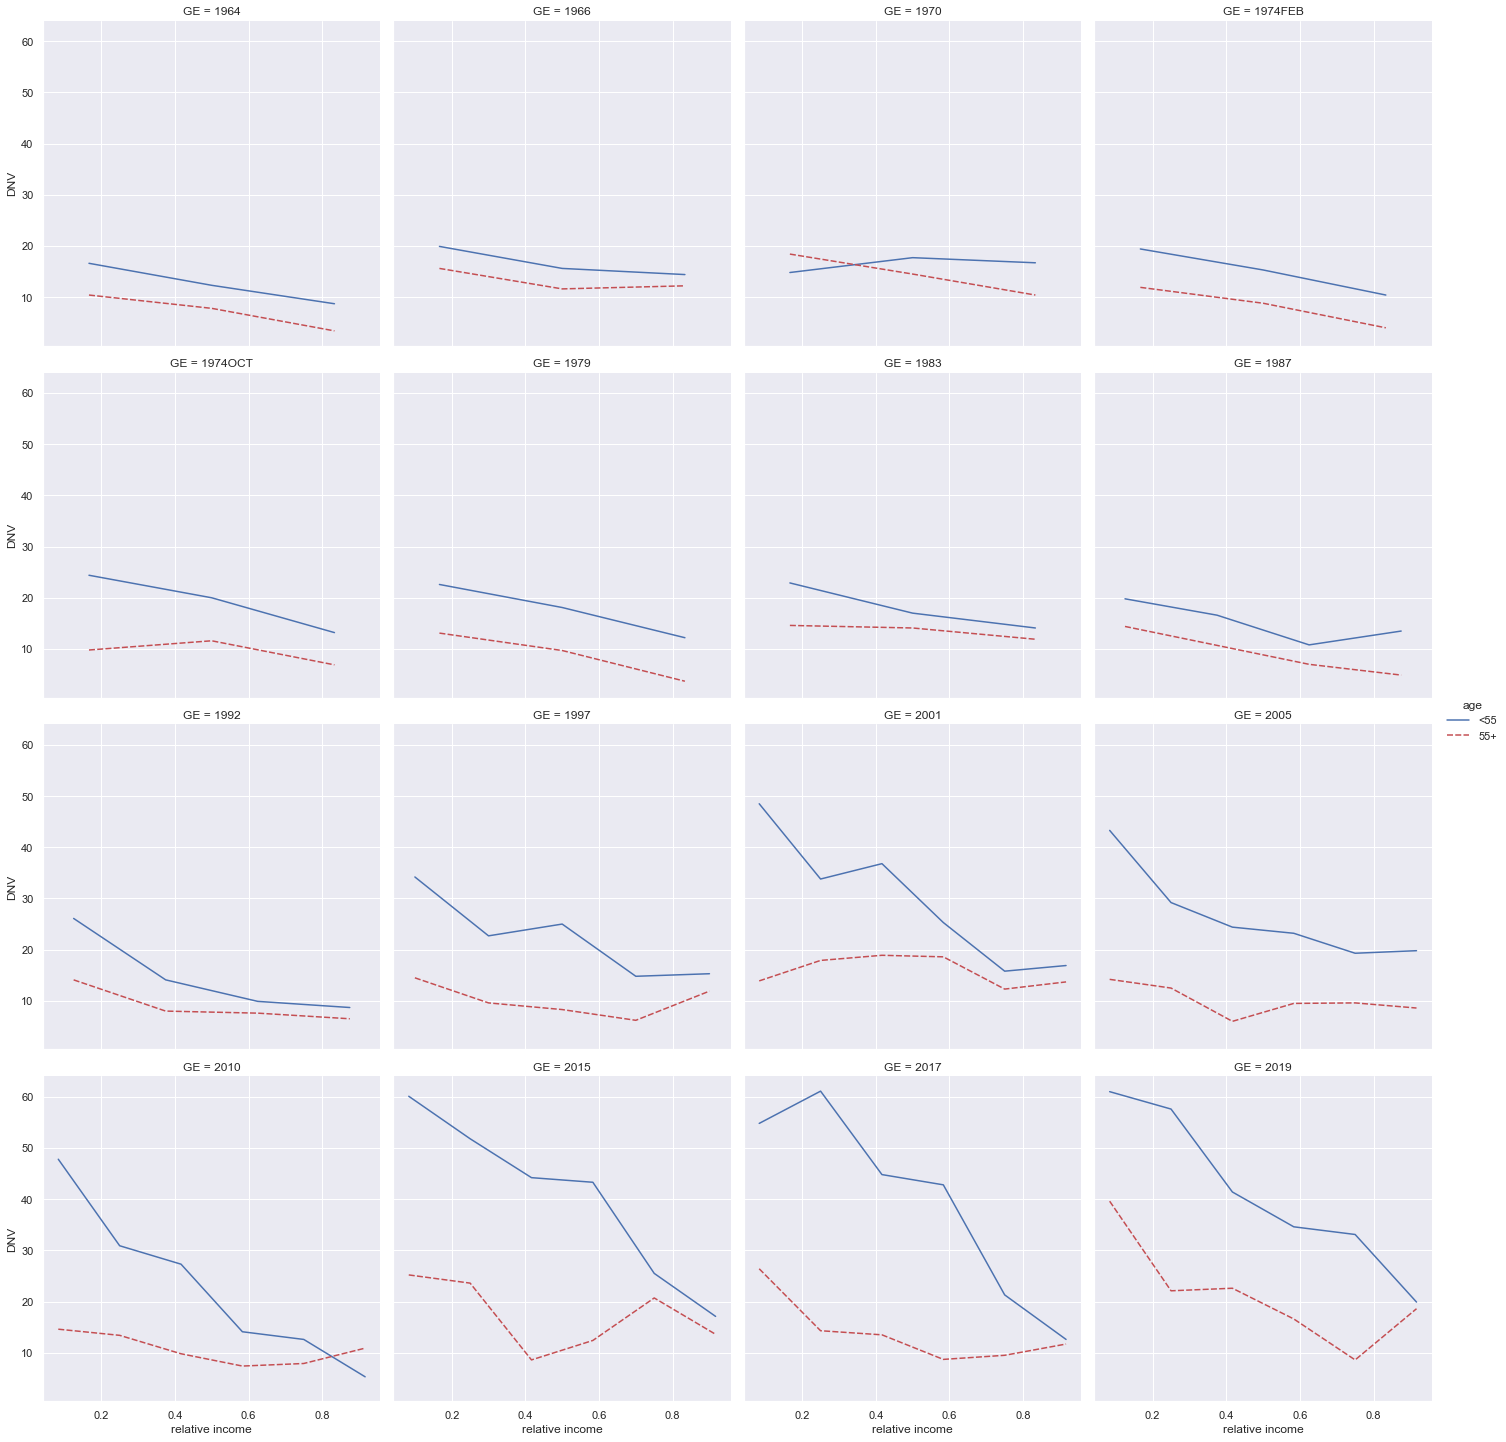

In [173]:
%%time
sns.relplot(
    data=df_all_years, x="relative income", y="DNV", col="GE",
    hue="age", style="age",col_wrap=4,
    palette=["b", "r"],kind="line",
)

In [174]:
GE2019

2019GE,BXP,CON,DK,DNV,GP,LAB,LD,OTH,PC,SNP,UKIP
row_0,,,,,,,,,,,
55+|0-15.6k,3.8,32.2,0.0,39.6,1.6,18.2,2.3,0.7,0.2,1.5,0.0
55+|15.6-26k,0.8,47.4,0.0,22.1,1.7,16.3,7.7,1.3,0.0,2.7,0.0
55+|26-36.4k,2.2,44.3,0.0,22.6,1.3,17.2,10.4,0.7,0.2,1.0,0.0
55+|36.4-46.8k,1.7,44.5,0.0,16.6,3.1,16.1,11.8,2.1,1.5,2.7,0.0
55+|46.8-75k,1.2,54.0,0.0,8.6,0.9,16.2,14.6,1.7,0.0,2.8,0.0
55+|75k+,0.0,39.6,0.0,18.6,1.7,18.2,16.3,2.9,0.0,2.7,0.0
<55|0-15.6k,0.6,10.8,0.0,61.0,1.3,19.8,3.1,0.6,0.4,2.3,0.1
<55|15.6-26k,0.7,14.9,0.0,57.6,0.9,20.8,2.3,0.5,0.5,2.0,0.0
<55|26-36.4k,0.0,23.7,0.0,41.4,1.8,26.8,3.8,0.0,0.0,2.5,0.0


In [175]:
GE1987

1987GE,CON,DK,DNV,GP,LAB,LD,PC,SNP
row_0,,,,,,,,
55+|0-5k,29.0,3.6,14.4,0.0,30.6,21.2,0.1,0.6
55+|05-10k,43.2,1.0,10.7,0.0,23.9,19.8,0.8,0.3
55+|10-15k,57.0,2.3,7.0,0.0,11.3,20.6,0.7,0.7
55+|15k+,57.8,3.6,4.9,2.0,7.3,21.5,0.0,2.6
<55|0-5k,16.1,0.6,19.8,0.0,48.7,13.9,0.0,0.6
<55|05-10k,27.6,1.9,16.6,0.0,35.6,17.1,0.3,0.5
<55|10-15k,37.4,1.5,10.8,0.3,25.9,23.0,0.1,0.6
<55|15k+,47.1,0.7,13.5,0.2,16.1,21.0,0.1,0.9
All,36.8,1.7,13.5,0.1,26.6,20.0,0.2,0.7


Wall time: 3.53 s


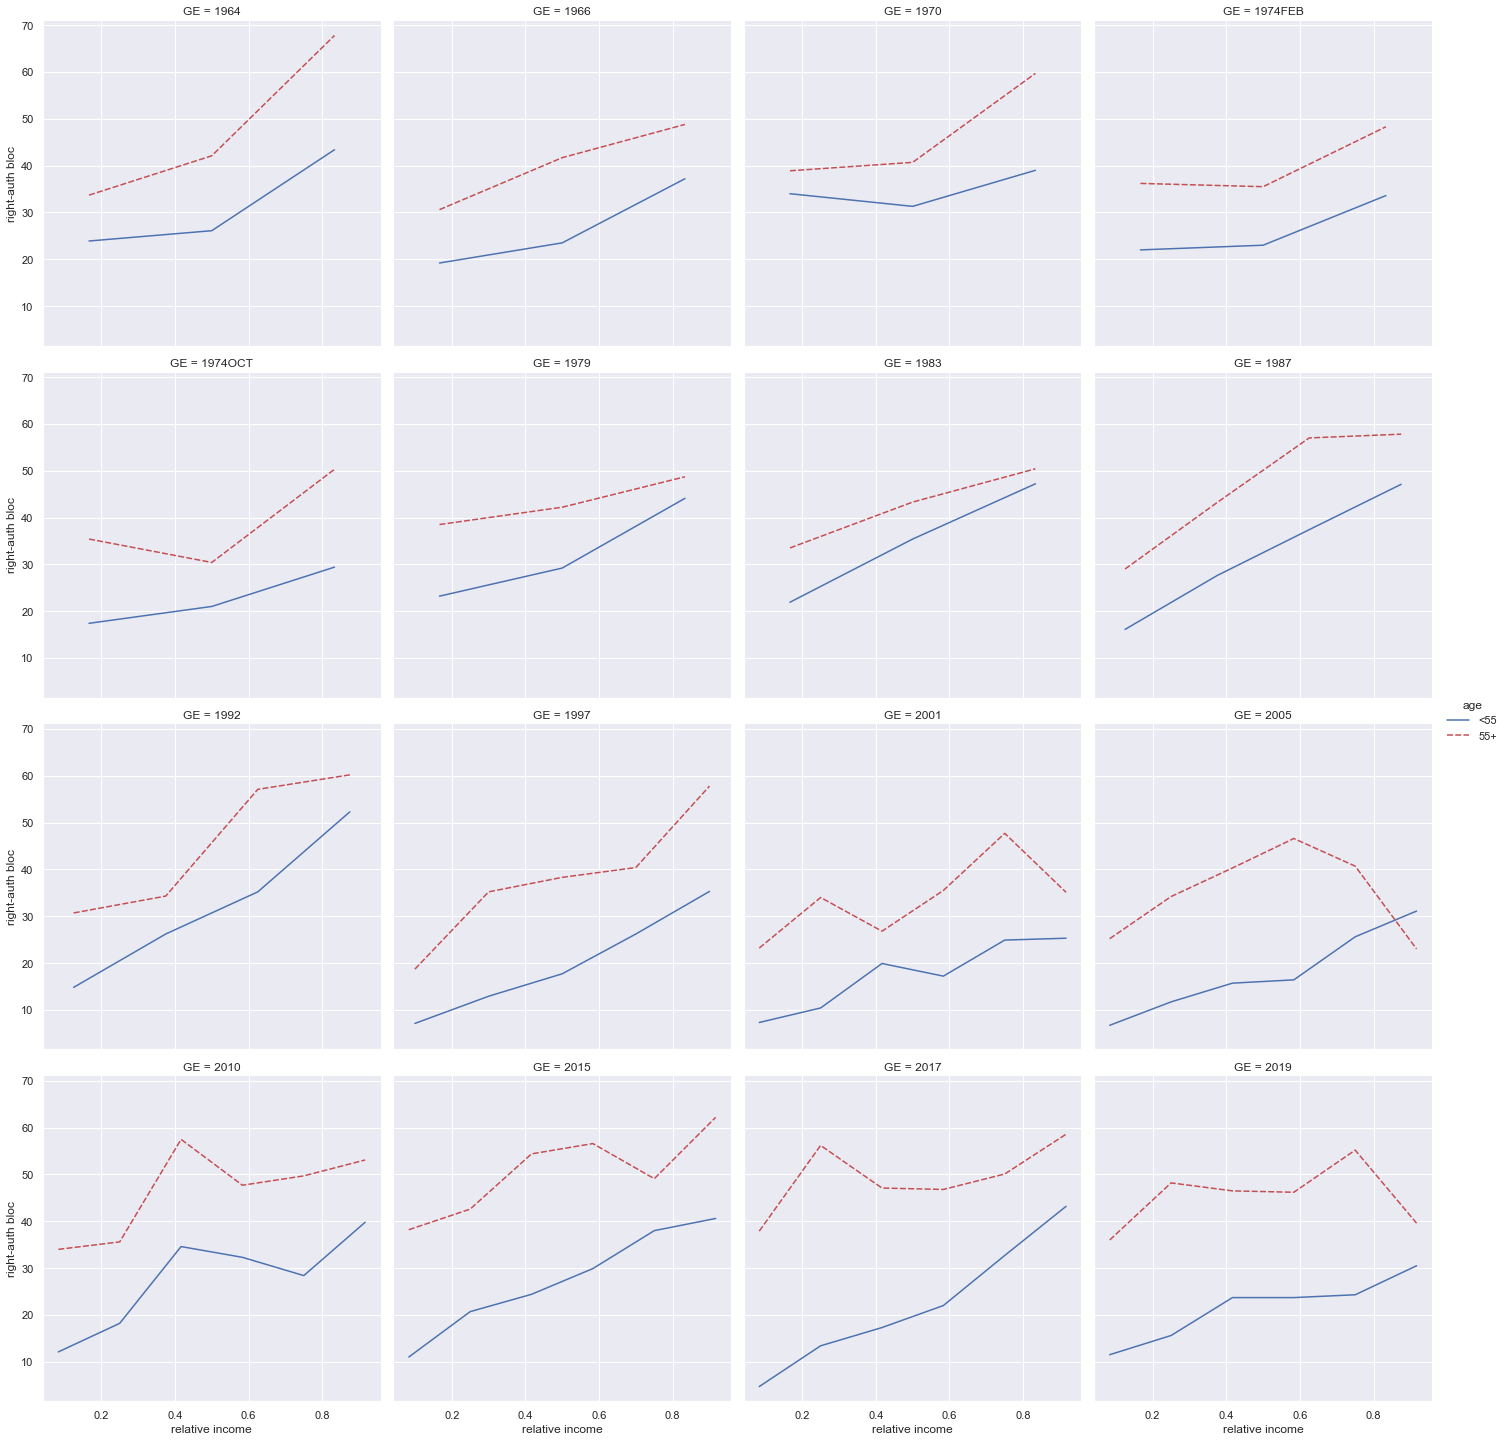

In [176]:
%%time
sns.relplot(
    data=df_all_years, x="relative income", y="right-auth bloc", col="GE",
    hue="age", style="age",col_wrap=4,
    palette=["b", "r"],kind="line",
);

Wall time: 3.65 s


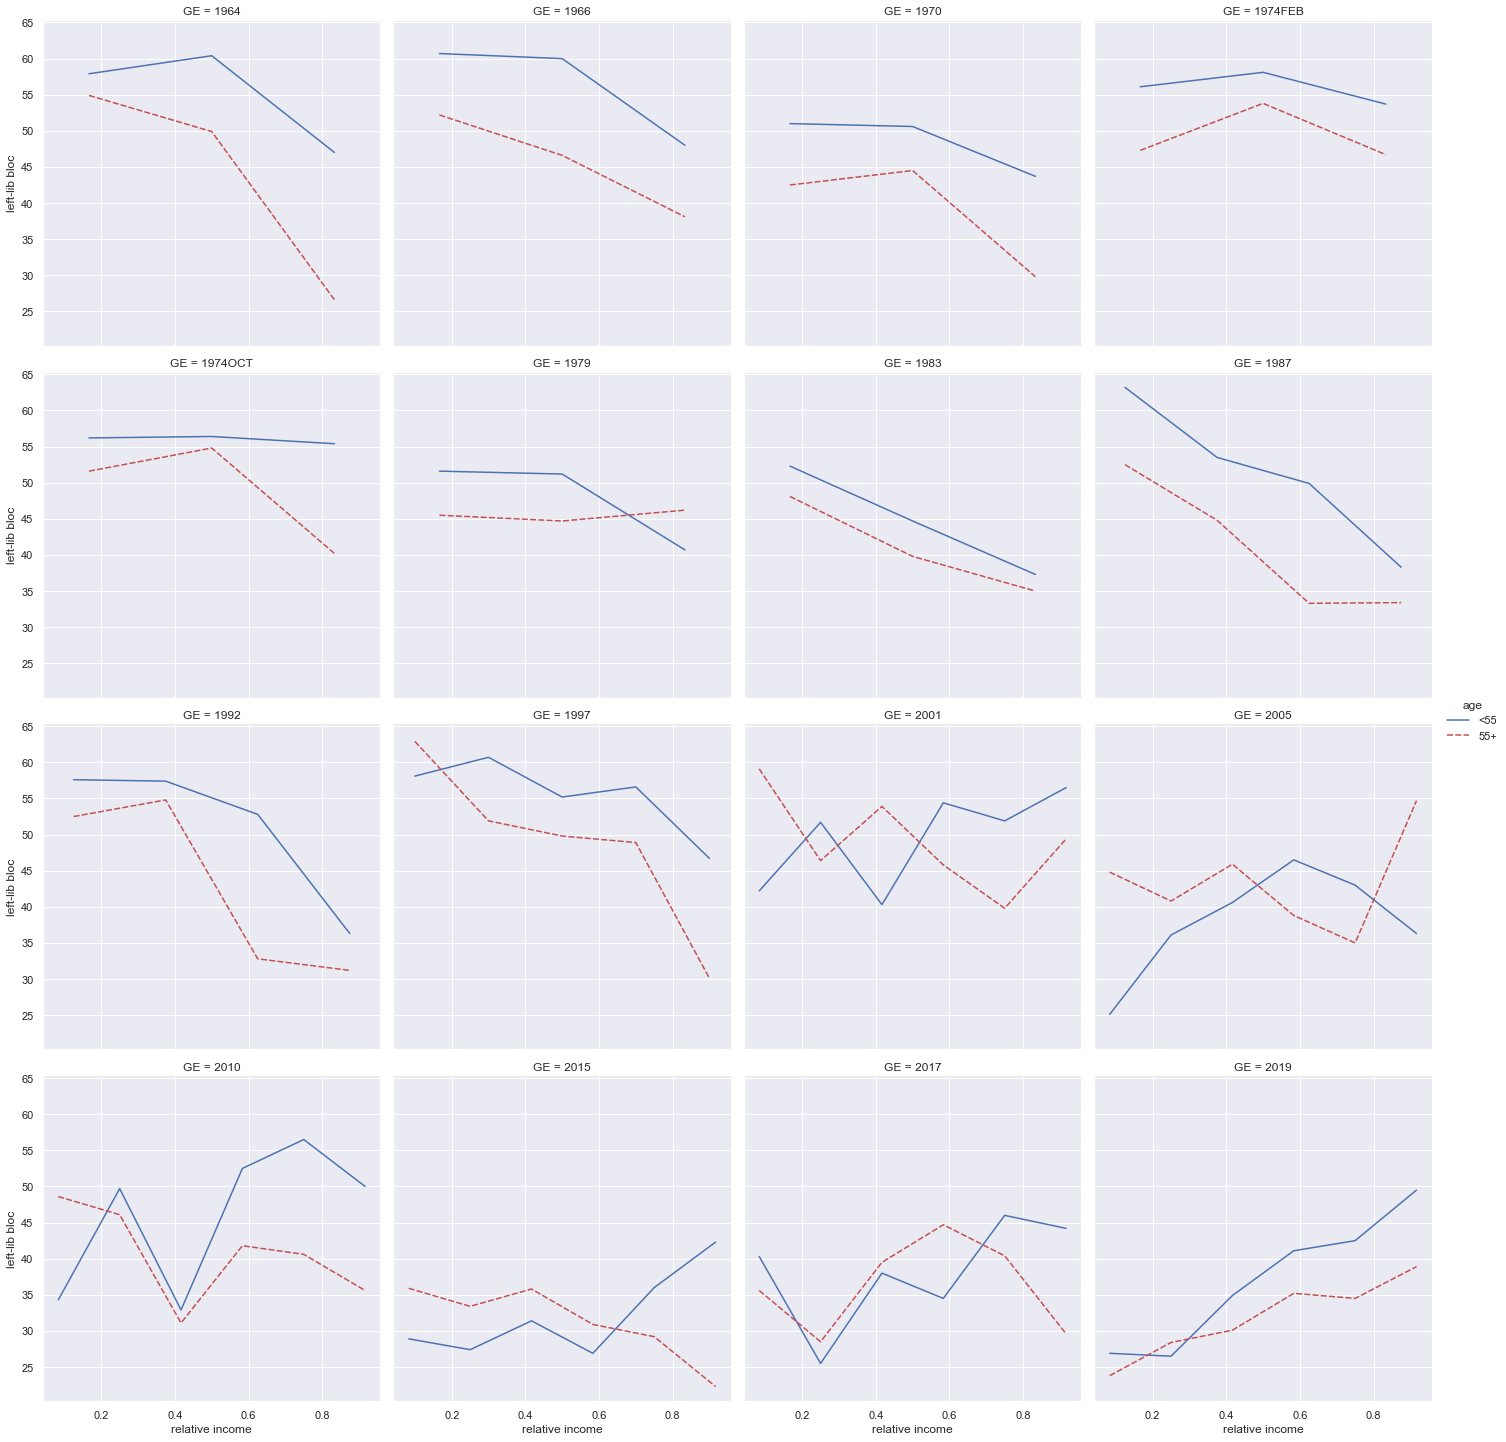

In [177]:
%%time
sns.relplot(
    data=df_all_years, x="relative income", y="left-lib bloc", col="GE",
    hue="age", style="age",col_wrap=4,
    palette=["b", "r"],kind="line",
);

In [178]:
df_all_years["VOTED"]=df_all_years[list(bloc_replace_dict.keys())+["DK"]].sum(axis=1)

In [179]:
# df_all_years_voters = df_all_years[list(bloc_replace_dict.keys())+["DK"]]/(df_all_years["VOTED"]/100)

In [180]:
df_all_years_voters = df_all_years.copy()
df_all_years_voters[list(bloc_replace_dict.keys())+["DK"]] = (df_all_years[list(bloc_replace_dict.keys())+["DK"]]).apply(lambda x: x/(df_all_years["VOTED"]/100))

In [181]:
df_all_years_voters[list(bloc_replace_dict.keys())+["DK"]]

,LAB,CON,COM,LIB,PC,SNP,ALL,GP,LD,SD,BNP,REF,UKIP,BXP,DK
0,61.064087,28.899637,0.0,8.222491,0.725514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.088271
1,55.848624,29.931193,0.0,13.417431,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802752
2,36.193619,47.744774,0.0,15.291529,0.220022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.550055
3,54.311310,37.737962,0.0,7.166853,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.783875
4,46.413043,45.760870,0.0,7.826087,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,49.406176,35.391924,NaN,NaN,1.187648,4.750594,NaN,2.137767,5.463183,NaN,NaN,NaN,0.0,1.662708,0.000000
8,45.733788,40.443686,NaN,NaN,0.000000,4.266212,NaN,3.071672,6.484642,NaN,NaN,NaN,0.0,0.000000,0.000000
9,43.827160,36.574074,NaN,NaN,0.617284,6.172840,NaN,4.012346,8.796296,NaN,NaN,NaN,0.0,0.000000,0.000000
10,39.371257,33.832335,NaN,NaN,0.449102,7.485030,NaN,3.592814,12.724551,NaN,NaN,NaN,0.0,2.544910,0.000000


Wall time: 3.52 s


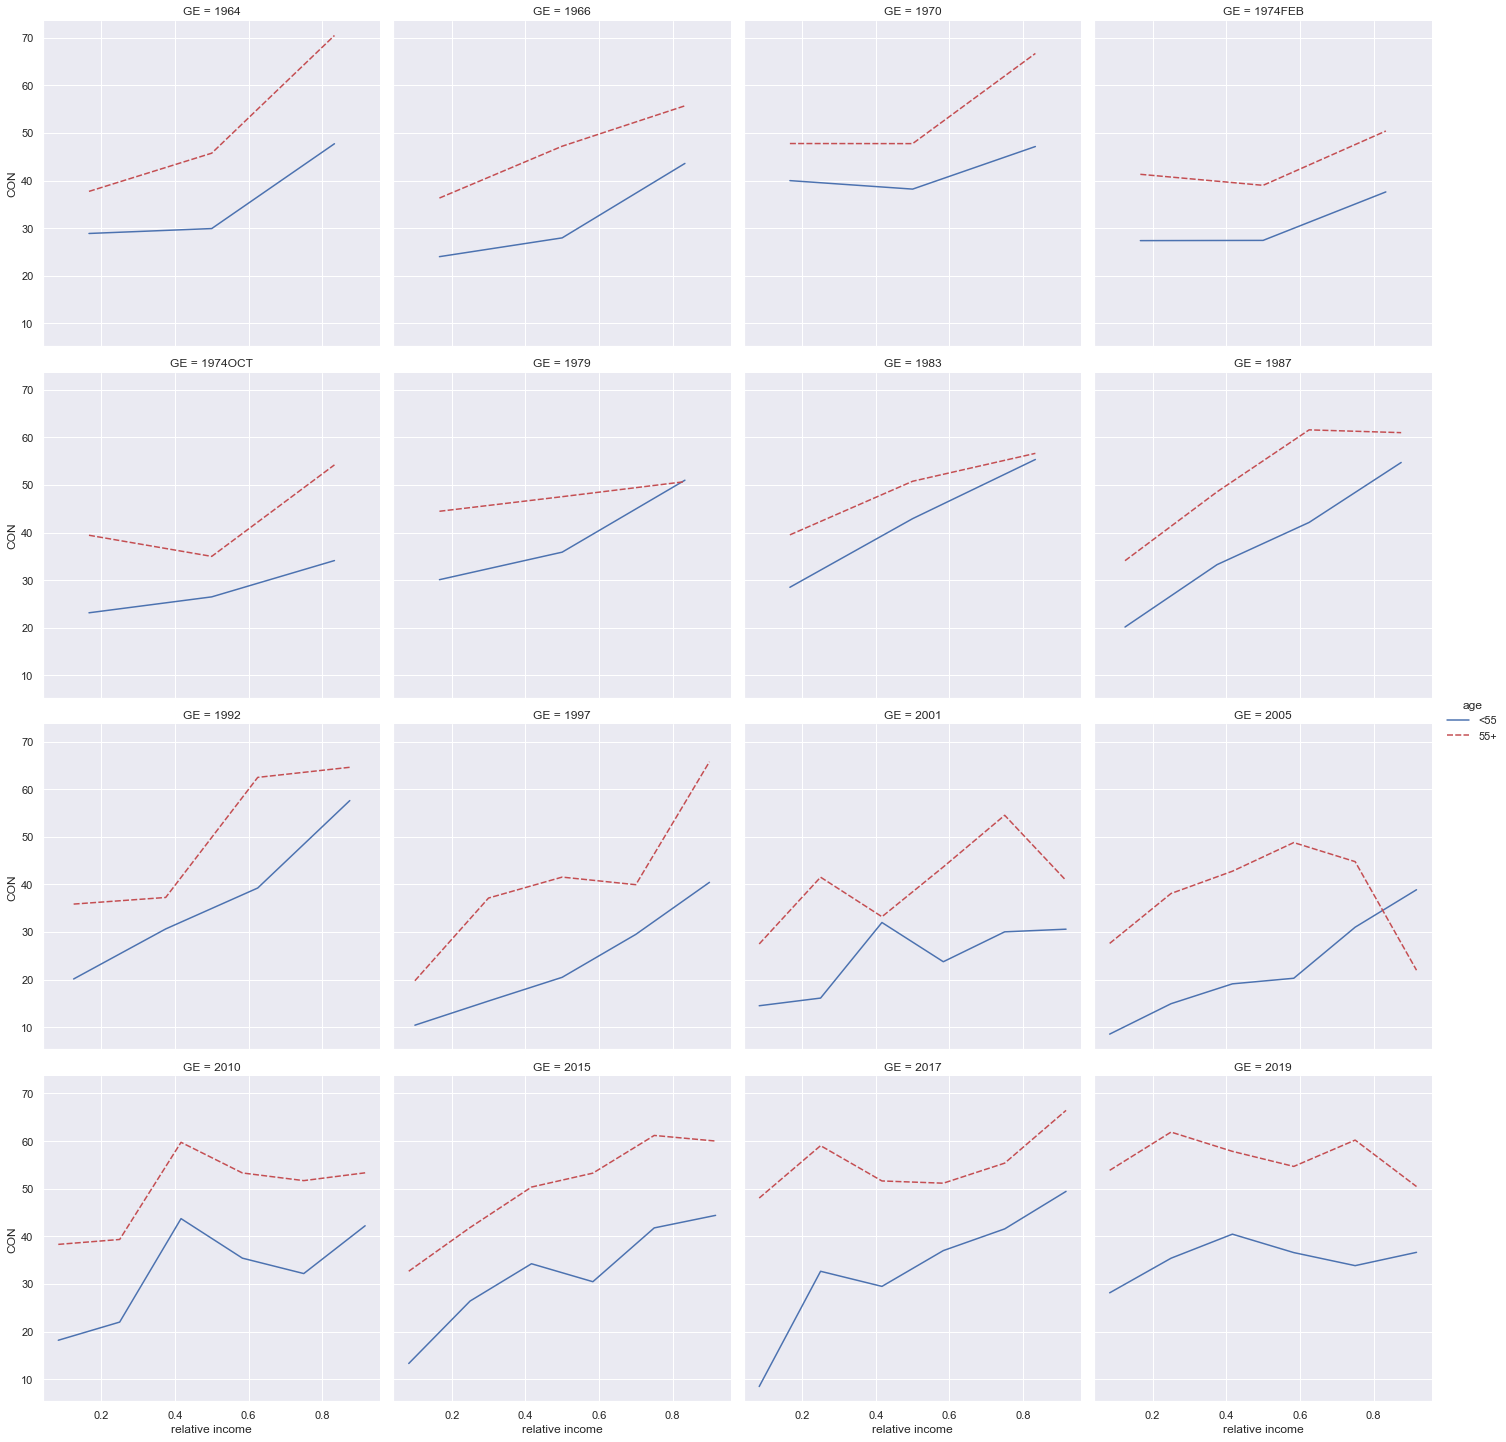

In [182]:
%%time
sns.relplot(
    data=df_all_years_voters, x="relative income", y="CON", col="GE",
    hue="age", style="age",col_wrap=4,
    palette=["b", "r"],kind="line",
);

Wall time: 3.53 s


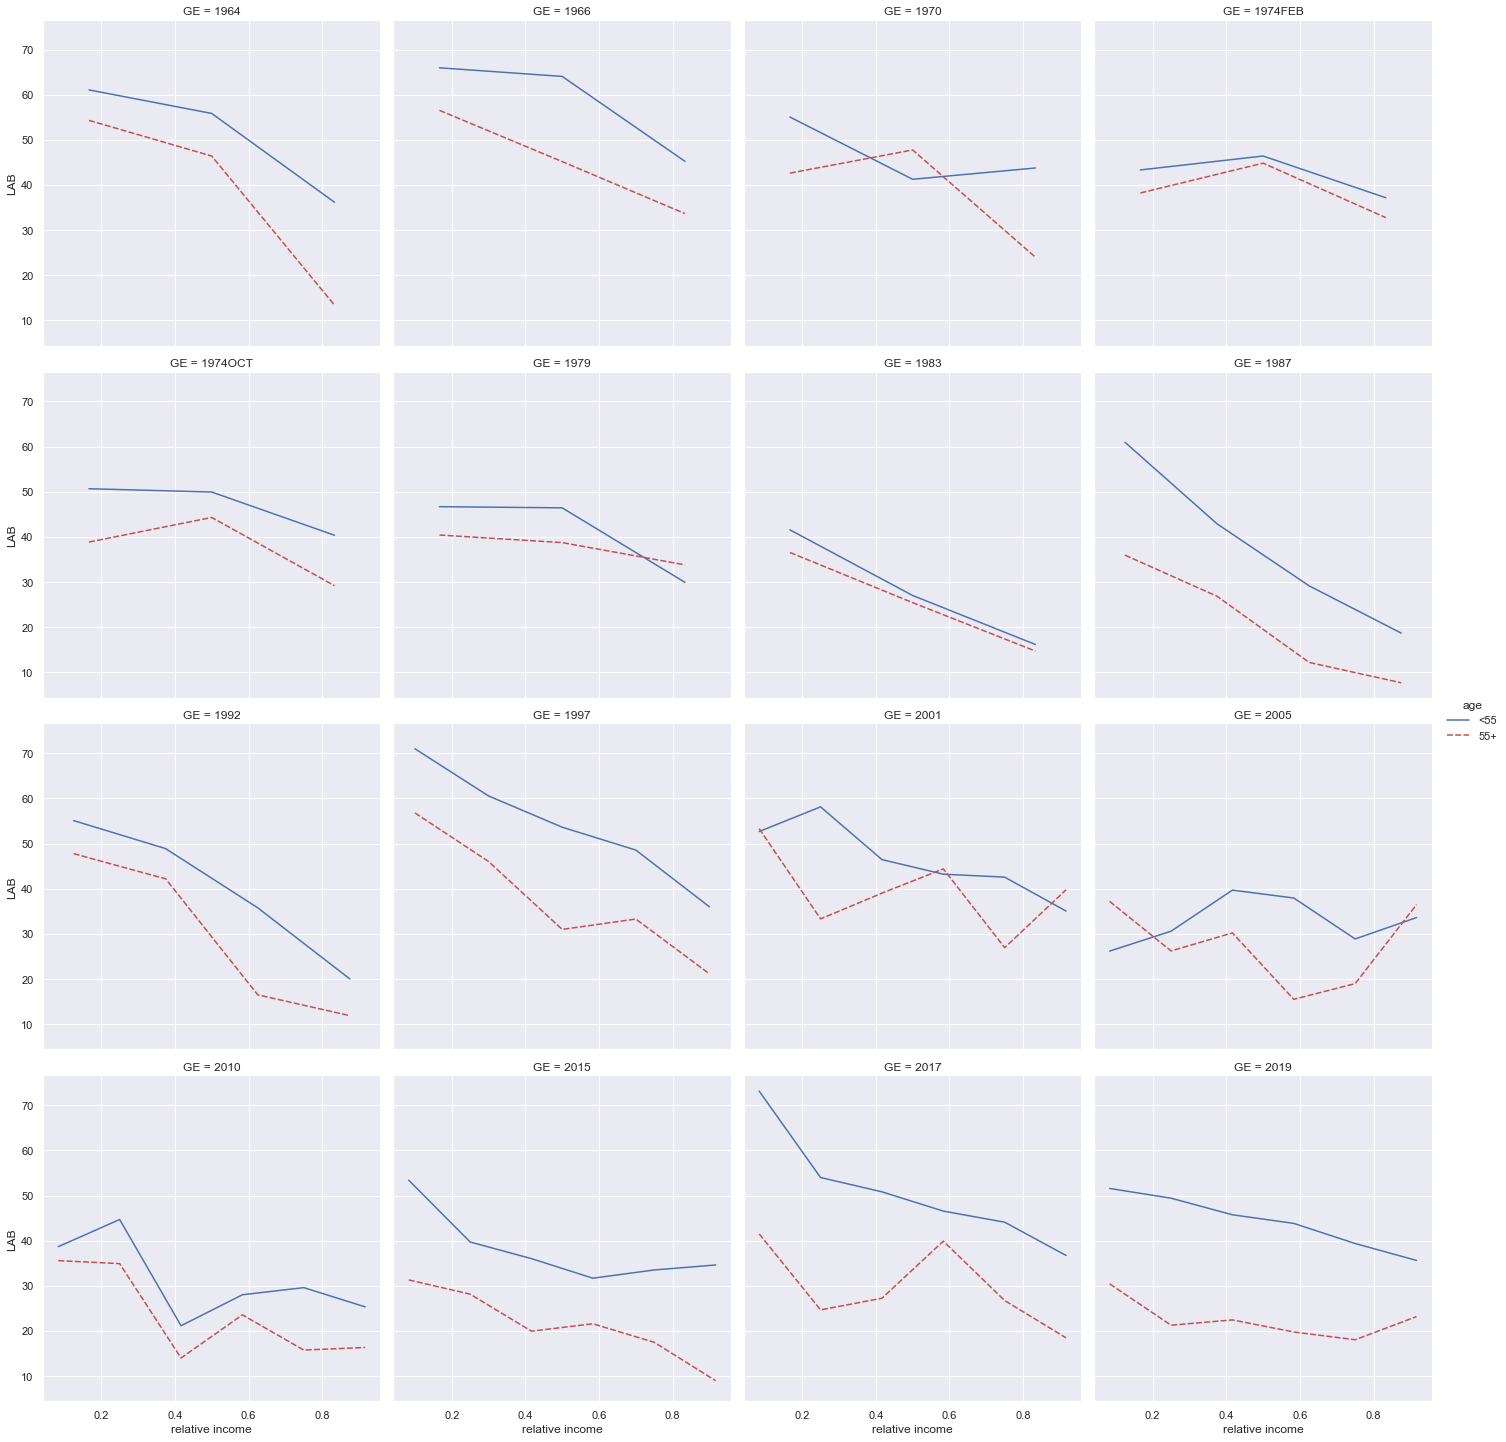

In [183]:
%%time
sns.relplot(
    data=df_all_years_voters, x="relative income", y="LAB", col="GE",
    hue="age", style="age",col_wrap=4,
    palette=["b", "r"],kind="line",
);

In [184]:
### housing tenure?

In [185]:
labels_19
# 'y03': 'Which of these best describes where you live?',
# ['Not stated', 'Don't know', 'Own home outright', 'Own home on mortgage',
#        'Rented from local authority', 'Rented from private landlord',
#        'It belongs to a Housing Association', 'Other']


# 'w13_1': 'Working/middle class: Conservative',
# 'w13_2': 'Working/middle class: Labour',
#'y02_1': 'Main source of income: Earnings from employment',
#...
labels_17
# 'y03': 'Y3 Which of these best describes where you live?',
#['Don`t know', 'Own home outright', 'Own home on mortgage',
# 'Rented from local authority', 'Rented from private landlord',  'It belongs to a Housing Association']

labels_15
# 'y03': 'Y3 Which of these best describes where you live?',
# ['Not stated', "Don't know", 'Own home outright', 'Own home on mortgage',
#         'Rented from local authority', 'Rented from private landlord',       'It belongs to a Housing Association']

labels_10
#  'aq65_1': 'own or rent',
#  'aq65_2': 'own outright or mortgage',
#  'aq65_3': 'rent from whom',
# 'bq93_1': 'own rent accommodation',
# 'bq93_2': 'own outright-mortgage',
# 'bq93_3': 'rent from?',

labels_05
#  'aq50a': 'own or rent',
#  'aq50b': 'if own-own outright or mortgage',
#  'aq50c': 'if rent-who rent from',
#  'bq79a': 'own or rent',
#  'bq79b': 'if own-own outright or mortgage',
#  'bq79c': 'if rent-who rent from',   

labels_01  
# 'aq40a': 'own or rent',
# 'aq40b': 'own outright or mortgage',
# 'bq74a': 'own or rent',
# 'bq74b': 'own outright or mortgage',
# 'owns': 'own or rent-summary',
# 'morts': 'own outright or mortgage-summary',

labels_97
#  'tenurtyp': 'does r live in private household? q950',
#  'tenure1': 'tenure of accommodation?  dv  q953',
#  'tenure2': 'tenure of accommodation (grouped)  dv  q954',
#  'evrbylah': 'r/person responsible for accom. ever bought as tenant? q955',

labels_92
#  'v919a': 'do you live in an institution?     q919a',
#  'v919b': 'hhold own or rent accomodationn[private] q919b',
#  'v919c': 'how r/hhold coping with mortgage?  q919c',
#  'v919d': 'did you/respondent buy as local authority tenant? q919d',
#  'v919e': 'have you ever bought past local authority home? q919e',
#  'v919f': 'ever bought a ;ocal authority council house/flat? q919f',
#  'v919g': 'when did buy council accommodation? q919g',

labels_87
# 'v60ab': 'housing tenure',
#  'v60c': 'ever been local authority tenant',
#  'v60d': 'local authority tenant prior to buying',
#  'v60e': 'ever bought a council house/flat',
#  'v60f': 'when was accommodation bought from council?',
#  'v61': 'how will try to buy council house in next 5 years',
#  'v62': 'whose name is accommodation in?',

labels_83
# 'q65ab': 'household housing tenure',
#  'q65c': '[if household owns] has been la tenant',
#  'q65d': '[if yes at 65c] la tenant prior hse buy',
#  'q65e': '[if hhold rents from la] buy in next 5yr',
#  'q65f': '[if private house] number in household',
#  'q65g': '[if private house] number under age 16',
#  'q65h': '[if private house] who owns or rents'}

labels_79
# 'm187a280': "r's home owned or rented-q106a",
#  'm187a281': 'if owned:outright or mortgage-q106b',
#  'm187a282': 'if rented:from council or private-q106c',
#  'm249283': 'how long lived in area:decimal years',
#  'm215285': 'type of house r lives in-q110a',
#  'm000287': 'is r living in parents home-q110c',

labels_74_oct
# 'oct187a': 'home owned or rented and mode'

labels_74_feb
#  'feb187': 'home owned or rented',
#  'feb188': 'mode of home ownership',
#  'feb189': 'mode of home rental',

labels_63_70
#  'v915': 'IF RENTS OR OWNS HOME 63',
#  'v916': 'IF RENTS OR OWNS HOME 64',
#  'v917': 'IF RENTS OR OWNS HOME 70',

# 'v902': 'R LIVED IN CHILDHOOD',
#  'v903': 'REGION R LIVED (CHILD)',
#  'v904a': 'CNTYS R LIVED (CHILD) (1)',
#  'v904b': 'CNTYS R LIVED (CHILD) (2)',
#  'v905': 'SIZE OF PLACE R LIVED 64',
#  'v906': 'WHERE R HAS LIVED',
#  'v907': 'REGIONS R HAS LIVED 1963',
#  'v908a': 'R LIVED SINCE CHILD MR66 (1)',
#  'v908b': 'R LIVED SINCE CHILD MR66 (2)',
#  'v909': 'R NOW LIVES         1963',
#  'v911': 'YRS R LIVED IN AREA',
#  'v912': 'YRS R LIVED IN HOUSE  63',
#  'v913': 'YRS R LIVED IN HOUSE  64',
#  'v914': 'YRS R LIVED IN HOUSE  70',

{'v1': 'STUDY NUMBER - 7250',
 'v2': 'RESPONDENT NUMBER',
 'v3': 'QUESTIONNAIRE NUMBER  64',
 'v4': 'QUESTIONNAIRE NUMBER  66',
 'v5': 'QUESTIONNAIRE NUMBER  70',
 'v6': 'ROTATION SCHEME     1963',
 'v7': 'QUESTIONNAIRE COLOR 1964',
 'v8': 'QUESTIONNAIRE COLOR 1966',
 'v9': 'QUESTIONNAIRE COLOR 1970',
 'v10': '63 CROSS-SECTION FILTER',
 'v11': '64 ELECTORATE FILTER',
 'v12': '64 ELECTORATE WEIGHTS',
 'v13': '66 ELECTORATE FILTER',
 'v14': '66 ELECTORATE WEIGHTS',
 'v15': '63&70 PANEL FILTER',
 'v16': '63&70 PANEL WEIGHTS',
 'v17': '63&64&70 PANEL FILTER',
 'v18': '63&66&70 PANEL FILTER',
 'v19': '63&64&66&70 PANEL FILTER',
 'v20': '63&64&66&70 PANEL WEIGHT',
 'v21': '64&70 PANEL FILTER',
 'v22': '64&70 PANEL WEIGHTS',
 'v23': '64&66&70 PANEL FILTER',
 'v24': '66&70 PANEL FILTER',
 'v25': '66&70 PANEL WEIGHTS',
 'v26': '63&66 PANEL FILTER',
 'v27': '63&64&66 PANEL FILTER',
 'v28': '63&64 PANEL FILTER',
 'v29': '64&66 PANEL FILTER',
 'v30': '64&66 PANEL WEIGHTS',
 'v31': 'CONSTITUENCY NU

In [186]:
# {k:v for k,v in labels_01.items() if "hous" in v.lower() or "live" in v.lower() or "rent" in v.lower() or "tenure" in v.lower() or "tenant" in v.lower() or "own" in v.lower() or "mortgage" in v}

In [187]:
labels_01

{'ref': 'standard pa constituency reference number',
 'seatname': 'name of constituency',
 'region': 'major census region (britain)',
 'county': 'county',
 'winner01': 'winner of seat 2001',
 'second01': 'party in 2nd place 2001',
 'turn01': '% turnout 2001',
 'maj01': '% majority 2001',
 'con01': '% vote conservative 2001',
 'lab01': '% vote labour 2001',
 'ld01': '% vote libdem 2001',
 'snp01': '% vote snp 2001',
 'pc01': '% vote pc 2001',
 'bnp01': '% vote bnp 2001',
 'grn01': '% vote green 2001',
 'ukip01': '% vote uk independence party 2001',
 'oth01': '% vote for other parties 2001',
 'swing01': "'butler' lab to con swing 1997-2001",
 'seatch01': 'seat changed in 2001',
 'convt01': 'conservative vote 2001',
 'labvt01': 'labour vote 2001',
 'ldvt01': 'liberal democrat vote 2001',
 'snpvt01': 'snp vote 2001',
 'pcvt01': 'plaid cymru vote 2001',
 'ukipvt01': 'uk independence vote 2001',
 'grnvt01': 'green vote 2001',
 'bnpvt01': 'bnp vote 2001',
 'othvt01': 'other vote 2001',
 'majv

In [188]:
replace_dict = {'Not stated':"NA", "Don't know":"DK", 'Own home outright':"OWN", 'Own home on mortgage':"MORT",
       'Rented from local authority':"RENT-LA", 'Rented from private landlord':"RENT-PR",
       'It belongs to a Housing Association':"RENT-HA", 'Other':"OTH"}
housing_det19 = BES_Panel_19["y03"].replace(replace_dict)
housing_det19.value_counts()

replace_dict = {'Not stated':"DK", "Don't know":"DK", 'Own home outright':"OWN", 'Own home on mortgage':"OWN",
       'Rented from local authority':"RENT", 'Rented from private landlord':"RENT",
       'It belongs to a Housing Association':"RENT", 'Other':"OTH"}
housing_19 = BES_Panel_19["y03"].replace(replace_dict)
housing_19.value_counts()

OWN     2672
RENT    1143
OTH       81
DK        50
Name: y03, dtype: int64

In [189]:
replace_dict = {'Not stated':"NA", "Don't know":"DK", 'Own home outright':"OWN", 'Own home on mortgage':"MORT",
       'Rented from local authority':"RENT-LA", 'Rented from private landlord':"RENT-PR",
       'It belongs to a Housing Association':"RENT-HA", 'Other':"OTH","Don`t know":"DK"}
housing_det17 = BES_Panel_17["y03"].replace(replace_dict)
housing_det17.value_counts()

replace_dict = {'Not stated':"NA", "Don't know":"DK", 'Own home outright':"OWN", 'Own home on mortgage':"OWN",
       'Rented from local authority':"RENT", 'Rented from private landlord':"RENT",
       'It belongs to a Housing Association':"RENT", 'Other':"OTH","Don`t know":"DK"}
housing_17 = BES_Panel_17["y03"].replace(replace_dict)
housing_17.value_counts()

OWN     1488
RENT     693
DK        13
Name: y03, dtype: int64

In [190]:
replace_dict = {'Not stated':"NA", "Don't know":"DK", 'Own home outright':"OWN", 'Own home on mortgage':"MORT",
       'Rented from local authority':"RENT-LA", 'Rented from private landlord':"RENT-PR",
       'It belongs to a Housing Association':"RENT-HA", 'Other':"OTH","Don`t know":"DK"}
housing_det15 = BES_Panel_15["y03"].replace(replace_dict)
housing_det15.value_counts()

replace_dict = {'Not stated':"NA", "Don't know":"DK", 'Own home outright':"OWN", 'Own home on mortgage':"OWN",
       'Rented from local authority':"RENT", 'Rented from private landlord':"RENT",
       'It belongs to a Housing Association':"RENT", 'Other':"OTH","Don`t know":"DK"}
housing_15 = BES_Panel_15["y03"].replace(replace_dict)
housing_15.value_counts()

OWN     1932
RENT    1025
DK        29
NA         1
Name: y03, dtype: int64

In [191]:
# BES_Panel_15["y03"].value_counts(),BES_Panel_15["y03"].cat.categories

In [192]:
BES_Panel_10[["aq65_1",'aq65_2',"aq65_3","bq93_1",'bq93_2',"bq93_3"]]
housing_10 = BES_Panel_10[["aq65_1","bq93_1"]].fillna(method='ffill',axis=1)
replace_dict = {"own":"OWN","rent":"RENT",'rent ':"RENT","refused":"NA","don't know":"DK","neither":"OTH"}
housing_10 = housing_10[housing_10.columns[-1]].replace(replace_dict)
housing_10.value_counts()

housing_det10 = BES_Panel_10[['aq65_2',"aq65_3",'bq93_2',"bq93_3"]].fillna(method='ffill',axis=1)
replace_dict = {'buying leasehold/freehold on a mortgage':"MORT",
       'own the leasehold/freehold':"OWN", 'housing association':"RENT-HA",
       'other individual':"RENT-PR", 'property company':"RENT-PR", 'other organisation':"RENT-PR",
       'local authority':"RENT-LA", 'relative':"OTH", 'refused':"NA",
       'own the leasehold/freehold ':"OWN", 'other individual ':"RENT-PR",
       'property company ':"RENT-PR", "don't know":"DK", 'housing trust':"RENT-HA",
       'other organisation ':"RENT-PR", 'employer ':"RENT-PR", 'relative ':"OTH", 'employer':"RENT-PR",
       'other (write in) ':"OTH", 'new town development corporation':"RENT-HA",
       'rent free squatting':"OTH"}
housing_det10 = housing_det10[housing_det10.columns[-1]].replace(replace_dict)
housing_det10.value_counts()

OWN        1210
MORT       1128
RENT-PR     424
RENT-LA     394
RENT-HA     254
OTH          33
DK           21
NA            8
Name: bq93_3, dtype: int64

In [193]:
det_to_simple_dict = {"MORT":"OWN","RENT-PR":"RENT","RENT-LA":"RENT","RENT-HA":"RENT",}
housing_10 = housing_det10.replace(det_to_simple_dict)

In [194]:
#  'aq50a': 'own or rent',
#  'aq50b': 'if own-own outright or mortgage',
#  'aq50c': 'if rent-who rent from',
#  'bq79a': 'own or rent',
#  'bq79b': 'if own-own outright or mortgage',
#  'bq79c': 'if rent-who rent from', 


# BES_Panel_05[["aq65_1",'aq65_2',"aq65_3","bq93_1",'bq93_2',"bq93_3"]]
housing_05 = BES_Panel_05[["aq50a","bq79a"]].fillna(method='ffill',axis=1)
# replace_dict = {"own":"OWN","rent":"RENT",'rent ':"RENT","refused":"NA","don't know":"DK","neither":"OTH"}
replace_dict = {1:"OWN",2:"RENT",3:"NA",8:"NA",99:"DK"}
housing_05 = housing_05[housing_05.columns[-1]].replace(replace_dict)
housing_05.value_counts()

replace_dict = {1:"OWN",2:"MORT",8:"NA",9:"DK",99:np.nan}
owning = BES_Panel_05[['aq50b','bq79b']].replace(replace_dict).fillna(method='ffill',axis=1)
owning = owning[owning.columns[-1]]

replace_dict = {1:"RENT-LA",2:"RENT-HA",3:"RENT-HA",4:"RENT-PR",5:"RENT-PR",6:"RENT-PR",
                7:"OTH",8:"RENT-PR",9:"RENT-HA",10:"OTH",11:"OTH",
                99:np.nan,999:np.nan,99:np.nan,98:np.nan,97:"OTH"}
renting = BES_Panel_05[['aq50c','bq79c']].replace(replace_dict).fillna(method='ffill',axis=1)
renting = renting[renting.columns[-1]]

housing_det05 = pd.concat([owning,renting],axis=1).fillna(method='ffill',axis=1)
housing_det05 = housing_det05[housing_det05.columns[-1]]
housing_det05.value_counts()

housing_05 = housing_det05.replace(det_to_simple_dict)
housing_05.value_counts()

OWN     3359
RENT    1299
OTH       53
NA         6
DK         2
Name: bq79c, dtype: int64

In [195]:
# 'aq40a': 'own or rent',
# 'aq40b': 'own outright or mortgage',
# 'bq74a': 'own or rent',
# 'bq74b': 'own outright or mortgage',

# 'owns': 'own or rent-summary',
# 'morts': 'own outright or mortgage-summary',
replace_dict ={"own":"OWN","rent":"RENT","neither":"NA","refused":"NA"}
housing_01 = BES_Panel_01["owns"].replace(replace_dict)

replace_dict = {"refused, not app":np.nan,"own outright":"OWN","mortgage":"MORT","refused":np.nan,"not app":np.nan}
housing_det01 =housing_01.copy()
housing_det01.loc[BES_Panel_01["morts"].replace(replace_dict).notnull()] = BES_Panel_01["morts"].replace(replace_dict)[BES_Panel_01["morts"].replace(replace_dict).notnull()]
housing_det01.value_counts()


MORT    1363
OWN     1279
RENT    1197
NA        61
Name: owns, dtype: int64

In [196]:
#  'tenurtyp': 'does r live in private household? q950',
#  'tenure1': 'tenure of accommodation?  dv  q953',
#  'tenure2': 'tenure of accommodation (grouped)  dv  q954',
#  'evrbylah': 'r/person responsible for accom. ever bought as tenant? q955',

replace_dict = {'skp,institution':np.nan, 'own(leasehold/freehold) outright':"OWN",
        'owns: buying morgage':"MORT", 'rents:local authority/council':"RENT-LA",
        'rents: housing association/housing trust':"RENT-HA", 'rents: property company':"RENT-PR",
        'rents: employer':"RENT-PR", 'rents: other organisation':"RENT-PR", 'rents: relative':"OTH",
        'rents: other individual':"RENT-PR", 'rentfree, squatting etc':"OTH",
        'rents:housing action trust':"RENT-HA", "don't   know":"DK", 'not     answered':"NA"}
housing_det97 = BES_Panel_97['tenure1'].replace(replace_dict)
housing_det97.value_counts()
replace_dict = {'skp,institution':np.nan, 'own(leasehold/freehold) outright':"OWN",
        'owns: buying morgage':"OWN", 'rents:local authority/council':"RENT",
        'rents: housing association/housing trust':"RENT", 'rents: property company':"RENT",
        'rents: employer':"RENT", 'rents: other organisation':"RENT", 'rents: relative':"OTH",
        'rents: other individual':"RENT", 'rentfree, squatting etc':"OTH",
        'rents:housing action trust':"RENT", "don't   know":"DK", 'not     answered':"NA"}
housing_97 = BES_Panel_97['tenure1'].replace(replace_dict)
housing_97.value_counts()


OWN     2415
RENT    1121
OTH       51
NA        12
DK         2
Name: tenure1, dtype: int64

In [197]:
#  'v919a': 'do you live in an institution?     q919a',
#  'v919b': 'hhold own or rent accomodationn[private] q919b',
#  'v919c': 'how r/hhold coping with mortgage?  q919c',
#  'v919d': 'did you/respondent buy as local authority tenant? q919d',
#  'v919e': 'have you ever bought past local authority home? q919e',
#  'v919f': 'ever bought a ;ocal authority council house/flat? q919f',
#  'v919g': 'when did buy council accommodation? q919g',

replace_dict = {'skp,institution':"NA", 'own     outright':"OWN", 'buying  mortgage':"MORT",
        'rents:local authority':"RENT-LA", 'rents:  new town':"RENT-HA",
        'rents:housing association':"RENT-HA", 'rents:property company':"RENT-PR",
        'rents:  employer':"RENT-PR", 'rents:other organisation':"RENT-PR", 'rents:  relative':"OTH",
        'rents:other individual':"RENT-PR", 'rentfree,squatting':"OTH", 'rents:trust/hat':"RENT-HA",
        'not     answered':"NA"}

housing_det92 = BES_Panel_92["v919b"].replace(replace_dict)
housing_det92.value_counts()

replace_dict = {'skp,institution':"NA", 'own     outright':"OWN", 'buying  mortgage':"OWN",
        'rents:local authority':"RENT", 'rents:  new town':"RENT",
        'rents:housing association':"RENT", 'rents:property company':"RENT",
        'rents:  employer':"RENT", 'rents:other organisation':"RENT", 'rents:  relative':"OTH",
        'rents:other individual':"RENT", 'rentfree,squatting':"OTH", 'rents:trust/hat':"RENT",
        'not     answered':"NA"}
housing_92 = BES_Panel_92["v919b"].replace(replace_dict)
housing_92.value_counts()
# BES_Panel_92["v919b"].value_counts(),BES_Panel_92["v919b"].cat.categories

OWN     2435
RENT    1019
OTH       50
NA        30
Name: v919b, dtype: int64

In [198]:
# 'v60ab': 'housing tenure',
#  'v60c': 'ever been local authority tenant',
#  'v60d': 'local authority tenant prior to buying',
#  'v60e': 'ever bought a council house/flat',
#  'v60f': 'when was accommodation bought from council?',
#  'v61': 'how will try to buy council house in next 5 years',
#  'v62': 'whose name is accommodation in?',

BES_Panel_87["v60ab"].value_counts(),BES_Panel_87["v60ab"].cat.categories,
replace_dict = {'institution':"OTH", 'owns house':"OWN", 'owns flat/maisonette':"OWN", 'loc auth--house':"RENT-LA",
        'loc auth--flat':"RENT-LA", 'housing assoc':"RENT-HA", 'rent--private':"RENT-PR", 'other':"OTH",
        'not answered':"NA"}
housing_det87 = BES_Panel_87["v60ab"].replace(replace_dict)
housing_det87.value_counts()

replace_dict = {'institution':"OTH", 'owns house':"OWN", 'owns flat/maisonette':"OWN", 'loc auth--house':"RENT",
        'loc auth--flat':"RENT", 'housing assoc':"RENT", 'rent--private':"RENT", 'other':"OTH",
        'not answered':"NA"}
housing_87 = BES_Panel_87["v60ab"].replace(replace_dict)
housing_87.value_counts()

OWN     2688
RENT    1062
OTH       71
NA         5
Name: v60ab, dtype: int64

In [199]:
# 'q65ab': 'household housing tenure',
#  'q65c': '[if household owns] has been la tenant',
#  'q65d': '[if yes at 65c] la tenant prior hse buy',
#  'q65e': '[if hhold rents from la] buy in next 5yr',
#  'q65f': '[if private house] number in household',
#  'q65g': '[if private house] number under age 16',
#  'q65h': '[if private house] who owns or rents'}
replace_dict = {'institut':"NA", 'owns    house':"OWN", 'owns    flat etc':"OWN", 'rent hse la':"RENT-LA",
        'rent flt la':"RENT-LA", 'rent    hsng ass':"RENT-HA", 'rent privt llord':"RENT-PR", 'rent frm other':"OTH",
        '65b na':"NA", '65a,b  na':"NA"}
housing_det83 = BES_Panel_83['q65ab'].replace(replace_dict)
housing_det83.value_counts()

replace_dict = {'institut':"NA", 'owns    house':"OWN", 'owns    flat etc':"OWN", 'rent hse la':"RENT",
        'rent flt la':"RENT", 'rent    hsng ass':"RENT", 'rent privt llord':"RENT", 'rent frm other':"OTH",
        '65b na':"NA", '65a,b  na':"NA"}
housing_83 = BES_Panel_83['q65ab'].replace(replace_dict)
housing_83.value_counts()


# BES_Panel_83['q65ab'].value_counts(),BES_Panel_83['q65ab'].cat.categories

OWN     2574
RENT    1268
OTH       78
NA        35
Name: q65ab, dtype: int64

In [200]:
# 'm187a280': "r's home owned or rented-q106a",
#  'm187a281': 'if owned:outright or mortgage-q106b',
#  'm187a282': 'if rented:from council or private-q106c',
#  'm249283': 'how long lived in area:decimal years',
#  'm215285': 'type of house r lives in-q110a',
#  'm000287': 'is r living in parents home-q110c',
replace_dict = {"owned":"OWN","rented":"RENT","other":"OTH",0:np.nan,"dk":"DK"}
housing_79 = BES_Panel_79["m187a280"].replace(replace_dict)
housing_79.value_counts()

replace_dict = {"mortgage":"MORT","outright":"OWN","other":"OTH",0:np.nan,"dk":"DK"}
owning = BES_Panel_79["m187a281"].replace(replace_dict)
owning.value_counts()

replace_dict = {"council-new town":"RENT-LA","privately":"RENT-PR","tied cottage":"OTH",0:np.nan,"dk":"DK"}
renting = BES_Panel_79["m187a282"].replace(replace_dict)
renting.value_counts()
#

housing_det79 = pd.concat([owning,renting],axis=1).fillna(method='ffill',axis=1)["m187a282"]
housing_det79.value_counts()

MORT       619
RENT-LA    571
OWN        412
RENT-PR    208
OTH         28
DK          12
Name: m187a282, dtype: int64

In [201]:
# labels_74_oct
# 'oct187a': 'home owned or rented and mode'

# labels_74_feb
#  'feb187': 'home owned or rented',
#  'feb188': 'mode of home ownership',
#  'feb189': 'mode of home rental',

replace_dict = {'na':"NA", 'owned outright':"OWN", 'mortgage':"MORT", 'rented privately':"RENT-PR",
        'rented council':"RENT-LA", 'owned dk':"DK", 'rented dk':"DK", 'dk ref':"DK"}
housing_det74oct = BES_Panel_74_oct['oct187a'].replace(replace_dict)
housing_det74oct.value_counts()

replace_dict = {'na':"NA", 'owned outright':"OWN", 'mortgage':"OWN", 'rented privately':"RENT",
        'rented council':"RENT", 'owned dk':"OWN", 'rented dk':"RENT", 'dk ref':"DK"}
housing_74oct = BES_Panel_74_oct['oct187a'].replace(replace_dict)
housing_74oct.value_counts()

# BES_Panel_74_oct['oct187a'].value_counts(),BES_Panel_74_oct['oct187a'].cat.categories

OWN     1262
RENT    1085
NA        16
DK         2
Name: oct187a, dtype: int64

In [202]:
replace_dict = {"owned":"OWN","rented":"RENT","rentfree":"OTH","dk":"DK","refused":"NA","na":"NA"}
housing_74feb = BES_Panel_74_feb['feb187'].replace(replace_dict)
housing_74feb.value_counts()

replace_dict = {"na":np.nan,"mortgage":"MORT","owned outright":"OWN","dk":"DK"}
owning = BES_Panel_74_feb['feb188'].replace(replace_dict)
owning.value_counts()
replace_dict = {"na":np.nan,"council":"RENT-LA","private":"RENT-PR"}
renting = BES_Panel_74_feb['feb189'].replace(replace_dict)
renting.value_counts()

housing_det74feb = pd.concat([owning,renting],axis=1).fillna(method='ffill',axis=1)["feb189"]
housing_det74feb.value_counts()

RENT-LA    740
MORT       714
OWN        551
RENT-PR    368
DK          20
Name: feb189, dtype: int64

In [203]:
# labels_63_70
#  'v915': 'IF RENTS OR OWNS HOME 63',
#  'v916': 'IF RENTS OR OWNS HOME 64',
#  'v917': 'IF RENTS OR OWNS HOME 70',
BES_Panel_63_70[["v915","v916","v917",]]
replace_dict = {1.:"RENT-LA",2.:"RENT-PR",3.:"OWN",4.:"OTH",8:np.nan,0:np.nan}
BES_Panel_63_70["v917"].replace(replace_dict).value_counts()

housing_det_64 = BES_Panel_63_70["v916"].replace(replace_dict)
housing_64 = housing_det_64.replace({"RENT-LA":"RENT","RENT-PR":"RENT"})

housing_det_70 = BES_Panel_63_70["v917"].replace(replace_dict)
housing_70 = housing_det_70.replace({"RENT-LA":"RENT","RENT-PR":"RENT"})

# 1. BE12 COUICIL BOOSE/?LAT
# 2. BKIT 800Sc/?L6? (BOT COOMCILJ
# 3. Oiill/XS BUVIIO
# u. OTU1B
# 8. BLSPOBDEB1 WAS BOT II’?EB11113D 11 1963
# 0. IA
# .

In [204]:
## housing_66 missing - no data - build from 64 and 70

In [205]:
# fill 66 in from 64 and 70, but 64 overwrites
housing_det_66 = pd.concat([housing_det_64,housing_det_70],axis=1).fillna(method='bfill')["v916"]
housing_66 = pd.concat([housing_64,housing_70],axis=1).fillna(method='bfill')["v916"]

In [206]:
GE_list_hous = {}
GE_list_hous_det = {}

In [207]:
age =age_64.replace(np.nan,"DK")
hous=housing_64.replace(np.nan,"DK").astype('category')

age_hous = age.astype(str)+"|"+hous.astype(str)
wts = BES_Panel_63_70['v12']
mask = wts.replace(0,np.nan).notnull()&(BES_Panel_63_70["v11"]==1)
age_hous = age_hous.astype('category').cat.remove_unused_categories()

print("N=",mask.sum())
GE1964_hous = (pd.crosstab(age_hous[mask],
                      vote_64[mask].replace(np.nan,"DK"),
                      normalize='index',margins=True,
                      values=wts[mask],aggfunc=sum
                      )*1000).astype(int)/10
GE1964_hous_num = (pd.crosstab(age_hous[mask],
                      vote_64[mask].replace(np.nan,"DK"),
                      normalize='all',margins=True,
                      values=wts[mask],aggfunc=sum
                      )*1000).astype(int)/10
column_perc = GE1964_hous_num.loc['All'].drop("All")
index_perc = GE1964_hous_num['All']
## weights for every election *but* 1970!
GE1964_hous_orig = GE1964_hous.copy()
GE1964_hous.columns = [k+"("+str(v)+"%)" for k,v in dict(zip(GE1964_hous.columns,column_perc)).items()]
GE1964_hous.index = [k+"("+str(v)+"%)" for k,v in dict(zip(GE1964_hous.index,index_perc)).items()]
GE1964_hous

GE_list_hous["GE1964"] = GE1964_hous

N= 1769


In [208]:
# age =age_64.replace(np.nan,"DK")
# hous=housing_64.replace(np.nan,"DK").astype('category')
# vote = vote.replace(np.nan,"DK")

# print("N=",mask.sum())

def get_crosstab(split1,split2,vote,has_weights,wts,mask):
    vote = vote.replace(np.nan,"DK")
    split1 =split1.replace(np.nan,"DK")
    split2 =split2.replace(np.nan,"DK").replace("NA","DK").astype('category')
    
    age_hous = split1.astype(str)+"|"+split2.astype(str)
    age_hous = age_hous.astype('category').cat.remove_unused_categories()
    
    if has_weights:
        GE1964_hous = (pd.crosstab(age_hous[mask],
                              vote[mask].replace(np.nan,"DK"),
                              normalize='index',margins=True,
                              values=wts[mask],aggfunc=sum
                              )*1000).astype(int)/10
        GE1964_hous_num = (pd.crosstab(age_hous[mask],
                              vote[mask].replace(np.nan,"DK"),
                              normalize='all',margins=True,
                              values=wts[mask],aggfunc=sum
                              )*1000).astype(int)/10
    else:
        mask = age_hous.notnull()&vote.notnull()
        GE1964_hous = (pd.crosstab(age_hous[mask],
                              vote[mask].replace(np.nan,"DK"),
                              normalize='index',margins=True,
#                               values=wts[mask],aggfunc=sum
                              )*1000).astype(int)/10
        GE1964_hous_num = (pd.crosstab(age_hous[mask],
                              vote[mask].replace(np.nan,"DK"),
                              normalize='all',margins=True,
#                               values=wts[mask],aggfunc=sum
                              )*1000).astype(int)/10        
        
    column_perc = GE1964_hous_num.loc['All'].drop("All")
    index_perc = GE1964_hous_num['All']
    ## weights for every election *but* 1970!
#     GE1964_hous_orig = GE1964_hous.copy()
    GE1964_hous.columns = [k+"("+str(v)+"%)" for k,v in dict(zip(GE1964_hous.columns,column_perc)).items()]
    GE1964_hous.index = [k+"("+str(v)+"%)" for k,v in dict(zip(GE1964_hous.index,index_perc)).items()]
    return GE1964_hous

In [209]:
GE_list_hous = {}

In [210]:
wts = BES_Panel_63_70['v12']
mask = wts.replace(0,np.nan).notnull()&(BES_Panel_63_70["v11"]==1)    
GE_list_hous["GE1964"] = get_crosstab(age_64,housing_64,vote_64,True,wts,mask)
GE_list_hous["GE1964_det"] = get_crosstab(age_64,housing_det_64,vote_64,True,wts,mask)

wts = BES_Panel_63_70['v14']
mask = wts.replace(0,np.nan).notnull()&(BES_Panel_63_70["v13"]==1)    
GE_list_hous["GE1966"] = get_crosstab(age_66,housing_66,vote_66,True,wts,mask)
GE_list_hous["GE1966_det"] = get_crosstab(age_66,housing_det_66,vote_66,True,wts,mask)

electorate_70_filter  = BES_Panel_63_70["v34"].replace(0,np.nan).notnull()
electorate_70_weights = BES_Panel_63_70[["v25","v22","v20","v16"]].mean(axis=1)

electorate_70_weights = electorate_70_weights.replace(0,np.nan)
electorate_70_weights = electorate_70_weights*(electorate_70_weights.notnull().sum()/electorate_70_weights.sum())
# electorate_70_weights[electorate_70_weights.notnull()]=1
wts = electorate_70_weights
mask = wts.replace(0,np.nan).notnull()&electorate_70_filter
GE_list_hous["GE1970"] = get_crosstab(age_70,housing_70,vote_70,True,wts,mask)
GE_list_hous["GE1970_det"] = get_crosstab(age_70,housing_det_70,vote_70,True,wts,mask)

In [211]:
electorate_70_weights.shape,age_70.shape,housing_70.shape,vote_70.shape

((2922,), (2922,), (2922,), (2922,))

In [212]:
electorate_70_weights.value_counts()
age_70.value_counts().sum()

1354

In [213]:
# electorate_70_weights[electorate_70_weights.notnull()]=1
# .notnull().sum()
# electorate_70_weights.hist()

In [214]:
pd.concat([age_70,housing_det_70,vote_70.replace("DK",np.nan),electorate_70_weights,electorate_70_filter.replace(False,np.nan)],axis=1).isnull().sum(axis=1).value_counts()

# 1355

5    1567
0    1333
1      19
2       3
dtype: int64

In [215]:
vote_70.replace("DK",np.nan).value_counts().sum()

1338

In [216]:
housing_70.value_counts().sum()

1348

In [217]:

GE_list_hous["GE1979"] = get_crosstab(age_1979,housing_79,vote_1979,False,None,None)
GE_list_hous["GE1979_det"] = get_crosstab(age_1979,housing_det79,vote_1979,False,None,None)

GE_list_hous["GE1974oct"] = get_crosstab(age_1974_oct,housing_74oct,vote_1974_oct,False,None,None)
GE_list_hous["GE1974oct_det"] = get_crosstab(age_1974_oct,housing_det74oct,vote_1974_oct,False,None,None)

GE_list_hous["GE1974feb"] = get_crosstab(age_1974_feb,housing_74feb,vote_1974_feb,False,None,None)
GE_list_hous["GE1974feb_det"] = get_crosstab(age_1974_feb,housing_det74feb,vote_1974_feb,False,None,None)

In [218]:


wts = BES_Panel_83["weight"]
mask = wts.replace(0,np.nan).notnull()
GE_list_hous["GE1983"] = get_crosstab(age_83,housing_83,vote_1983,True,wts,mask)
GE_list_hous["GE1983_det"] = get_crosstab(age_83,housing_det83,vote_1983,True,wts,mask)
GE_list_hous["GE1983_det"]

wts = BES_Panel_87["weight"]
mask = wts.replace(0,np.nan).notnull()
GE_list_hous["GE1987"] = get_crosstab(age_1987,housing_87,vote_1987,True,wts,mask)
GE_list_hous["GE1987_det"] = get_crosstab(age_1987,housing_det87,vote_1987,True,wts,mask)
GE_list_hous["GE1987_det"]


wts = BES_Panel_92["wtfactor"]
mask = wts.replace(0,np.nan).notnull()
GE_list_hous["GE1992"] = get_crosstab(age_1992,housing_92,vote_1992,True,wts,mask)
GE_list_hous["GE1992_det"] = get_crosstab(age_1992,housing_det92,vote_1992,True,wts,mask)
GE_list_hous["GE1992_det"]

wts = BES_Panel_97["wtergb"]
mask = wts.replace(0,np.nan).notnull()
GE_list_hous["GE1997"] = get_crosstab(age_1997,housing_97,vote_1997,True,wts,mask)
GE_list_hous["GE1997_det"] = get_crosstab(age_1997,housing_det97,vote_1997,True,wts,mask)
GE_list_hous["GE1997_det"]

wts = BES_Panel_01["postoctw"]
mask = wts.replace(0,np.nan).notnull()
GE_list_hous["GE2001"] = get_crosstab(age_01,housing_01,vote_2001,True,wts,mask)
GE_list_hous["GE2001_det"] = get_crosstab(age_01,housing_det01,vote_2001,True,wts,mask)
GE_list_hous["GE2001_det"]

wts = BES_Panel_05["prewtbr"]
mask = wts.replace(0,np.nan).notnull()
GE_list_hous["GE2005"] = get_crosstab(age_05,housing_05,vote_2005,True,wts,mask)
GE_list_hous["GE2005_det"] = get_crosstab(age_05,housing_det05,vote_2005,True,wts,mask)
GE_list_hous["GE2005_det"]

wts = BES_Panel_10["panwgtc"]
mask = wts.replace(0,np.nan).notnull()
GE_list_hous["GE2010"] = get_crosstab(age_10,housing_10,vote_2010,True,wts,mask)
GE_list_hous["GE2010_det"] = get_crosstab(age_10,housing_det10,vote_2010,True,wts,mask)
GE_list_hous["GE2010_det"]

wts = BES_Panel_15["wt_vote"]
mask = wts.replace(0,np.nan).notnull()
GE_list_hous["GE2015"] = get_crosstab(age_15,housing_15,vote_2015,True,wts,mask)
GE_list_hous["GE2015_det"] = get_crosstab(age_15,housing_det15,vote_2015,True,wts,mask)
GE_list_hous["GE2015_det"]

wts = BES_Panel_17["wt_vote"]
mask = wts.replace(0,np.nan).notnull()
GE_list_hous["GE2017"] = get_crosstab(age_17,housing_17,vote_2017,True,wts,mask)
GE_list_hous["GE2017_det"] = get_crosstab(age_17,housing_det17,vote_2017,True,wts,mask)
GE_list_hous["GE2017_det"]

wts = BES_Panel_19["wt_vote"]
mask = wts.replace(0,np.nan).notnull()
GE_list_hous["GE2019"] = get_crosstab(age_19,housing_19,vote_2019,True,wts,mask)
GE_list_hous["GE2019_det"] = get_crosstab(age_19,housing_det19,vote_2019,True,wts,mask)
GE_list_hous["GE2019_det"]

,BXP(1.3%),CON(29.5%),DNV(33.8%),GP(1.8%),LAB(21.8%),LD(7.8%),OTH(0.7%),PC(0.3%),SNP(2.6%),UKIP(0.0%)
55+|DK(0.0%),0.0,74.9,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0
55+|MORT(6.1%),2.5,45.5,22.6,2.6,15.2,8.1,0.5,0.1,2.4,0.0
55+|OTH(0.5%),17.3,27.5,37.1,0.0,5.1,10.7,0.0,0.0,2.1,0.0
55+|OWN(26.4%),1.8,46.8,19.0,2.0,16.4,10.3,1.6,0.1,1.7,0.0
55+|RENT-HA(2.7%),1.2,26.0,49.1,0.3,17.8,3.3,0.0,0.0,2.1,0.0
55+|RENT-LA(3.1%),4.8,20.4,51.4,0.0,17.6,2.1,0.0,0.0,3.4,0.0
55+|RENT-PR(2.0%),0.0,33.0,35.5,2.4,17.3,5.9,0.0,2.6,3.0,0.0
<55|DK(0.3%),0.0,28.8,20.2,0.0,43.7,7.1,0.0,0.0,0.0,0.0
<55|MORT(25.9%),0.6,26.5,28.6,1.8,29.5,8.7,0.1,0.1,3.6,0.0
<55|OTH(2.1%),0.0,20.1,36.0,4.5,23.9,10.3,0.0,3.4,1.5,0.0


In [219]:
GE_list_hous["GE1970"]

,CON(40.9%),DK(1.2%),DNV(15.3%),LAB(34.3%),LIB(7.1%),OTH(0.0%),PC(0.8%),SNP(0.1%)
55+|DK(0.4%),50.2,44.4,0.0,5.2,0.0,0.0,0.0,0.0
55+|OTH(0.7%),41.6,0.0,3.7,38.8,15.7,0.0,0.0,0.0
55+|OWN(21.9%),50.2,1.4,14.3,22.7,10.2,0.0,0.8,0.0
55+|RENT(19.8%),39.1,0.6,14.9,42.5,2.7,0.0,0.0,0.0
<55|OTH(1.1%),19.0,0.0,38.3,30.7,11.8,0.0,0.0,0.0
<55|OWN(30.3%),46.9,1.1,16.8,25.1,8.2,0.0,1.6,0.0
<55|RENT(25.3%),27.5,0.9,14.4,49.7,6.2,0.0,0.7,0.3
DK|DK(0.0%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DK|OWN(0.0%),100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
All(100.0%),40.9,1.2,15.3,34.3,7.1,0.0,0.8,0.1


In [220]:
df_all_years_hous = pd.DataFrame()
for year in [x for x in GE_list_hous.keys() if "det" not in x]:
    df = GE_list_hous[year].drop("All",errors='ignore').reset_index()
    # All(100.0%)
    df["age"] = df["index"].apply(lambda x: x.split("|")[0] if "All" not in x else "All")
    df["tenure"] = df["index"].apply(lambda x: x.split("|")[1].split("(")[0] if "All" not in x else "All")
    df["%"] = df["index"].apply(lambda x: x.split("|")[1].split("(")[1].split("%")[0] if "All" not in x else np.nan).astype('float')
    dnv_col = [x for x in df.columns if "DNV" in x][0]
    df["%_voter_only"] = df["%"]*(100-df[dnv_col])/100
    df["%_voter_only"] = df["%_voter_only"]*100/(df["%_voter_only"].sum())
    
#     inc_range = [x.split("|")[1] for x in df["index"] if "<55" in x]
#     inc_dict = {inc_range[x]:(x+.5)/(len(inc_range)) for x in range(0,len(inc_range))}
#     df["relative income"] = df["income"].replace(inc_dict)
    df["GE"] = year
    df.columns = [x.split("(")[0] for x in df.columns]
    df_all_years_hous = df_all_years_hous.append(df)
    
df_all_years_hous["GE"] =df_all_years_hous["GE"].astype('category').cat.reorder_categories([
       'GE1964', 'GE1966', 'GE1970',
       'GE1974feb', 'GE1974oct', 'GE1979',
       'GE1983', 'GE1987', 'GE1992', 'GE1997', 'GE2001', 'GE2005',
       'GE2010', 'GE2015', 'GE2017', 'GE2019'])


bloc_replace_dict = {'LAB':"left-lib bloc",'CON':"right-auth bloc",
    'COM':"left-lib bloc", 'LIB':"left-lib bloc",  'PC':"left-lib bloc", 'SNP':"left-lib bloc", 'ALL':"left-lib bloc",  'GP':"left-lib bloc", 'LD':"left-lib bloc", 'SD':"left-lib bloc",
       'BNP':"right-auth bloc",'REF':"right-auth bloc", 'UKIP':"right-auth bloc", 'BXP':"right-auth bloc"}

# 'DK':"DK", 'DNV':"DNV",'OTH':"OTH",
left_lib_bloc =[]
right_auth_bloc =[]
for party in bloc_replace_dict.keys():
    if bloc_replace_dict[party]=="left-lib bloc":
        left_lib_bloc.append(party)
    elif bloc_replace_dict[party]=="right-auth bloc":
        right_auth_bloc.append(party)
# left_lib_bloc,right_auth_bloc

df_all_years_hous["left-lib bloc"] = df_all_years_hous[left_lib_bloc].sum(axis=1)
df_all_years_hous["right-auth bloc"] = df_all_years_hous[right_auth_bloc].sum(axis=1)

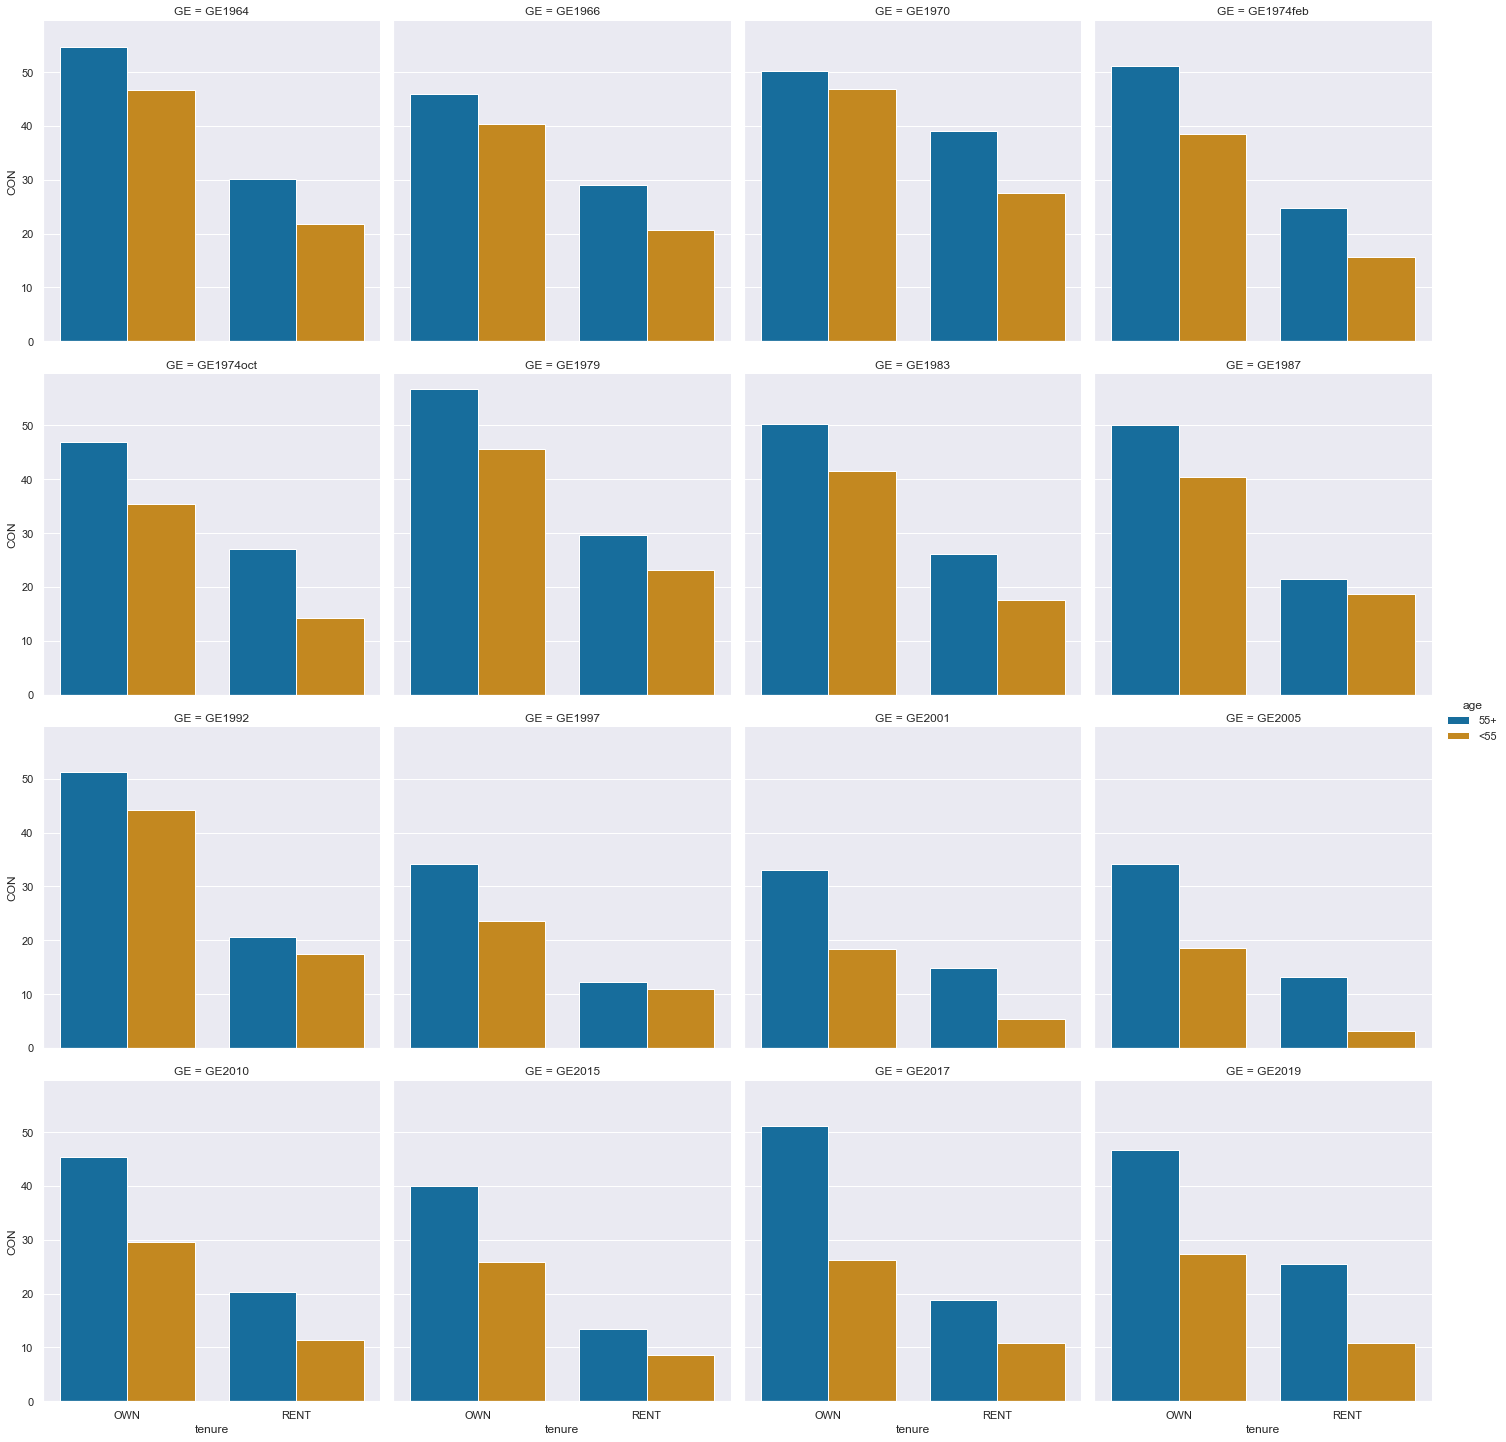

In [221]:
# %%time
mask = df_all_years_hous["tenure"].isin(["OWN","RENT"])&df_all_years_hous["age"].isin(["<55","55+"])
sns.catplot(
    data=df_all_years_hous[mask], x="tenure", y="CON", col="GE",
    hue="age", col_wrap=4,
    kind='bar',
#     style="age",
#     kind="line",
   
);

 #palette=["b", "r"]

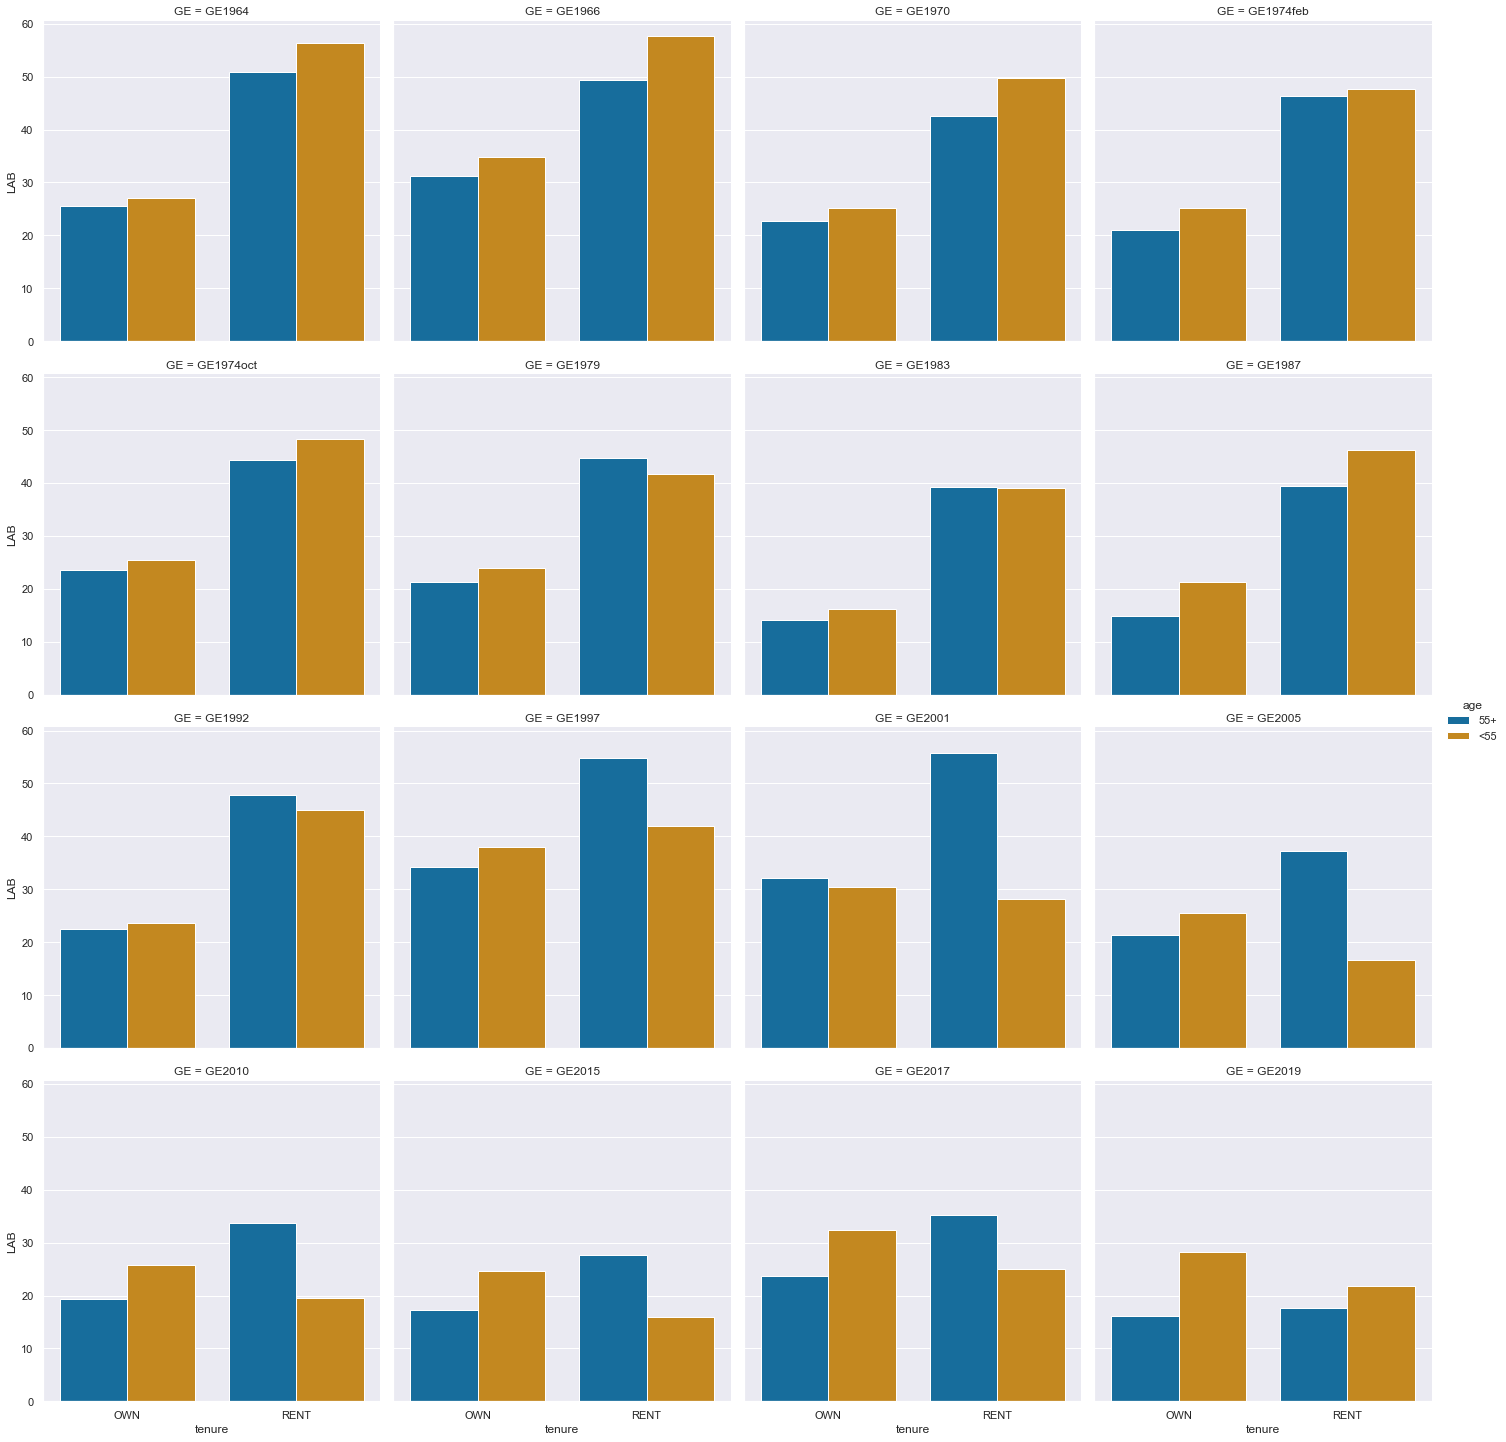

In [222]:
# %%time
mask = df_all_years_hous["tenure"].isin(["OWN","RENT"])&df_all_years_hous["age"].isin(["<55","55+"])
sns.catplot(
    data=df_all_years_hous[mask], x="tenure", y="LAB", col="GE",
    hue="age", col_wrap=4,
    kind='bar',
#     style="age",
#     kind="line",
   
);

 #palette=["b", "r"]

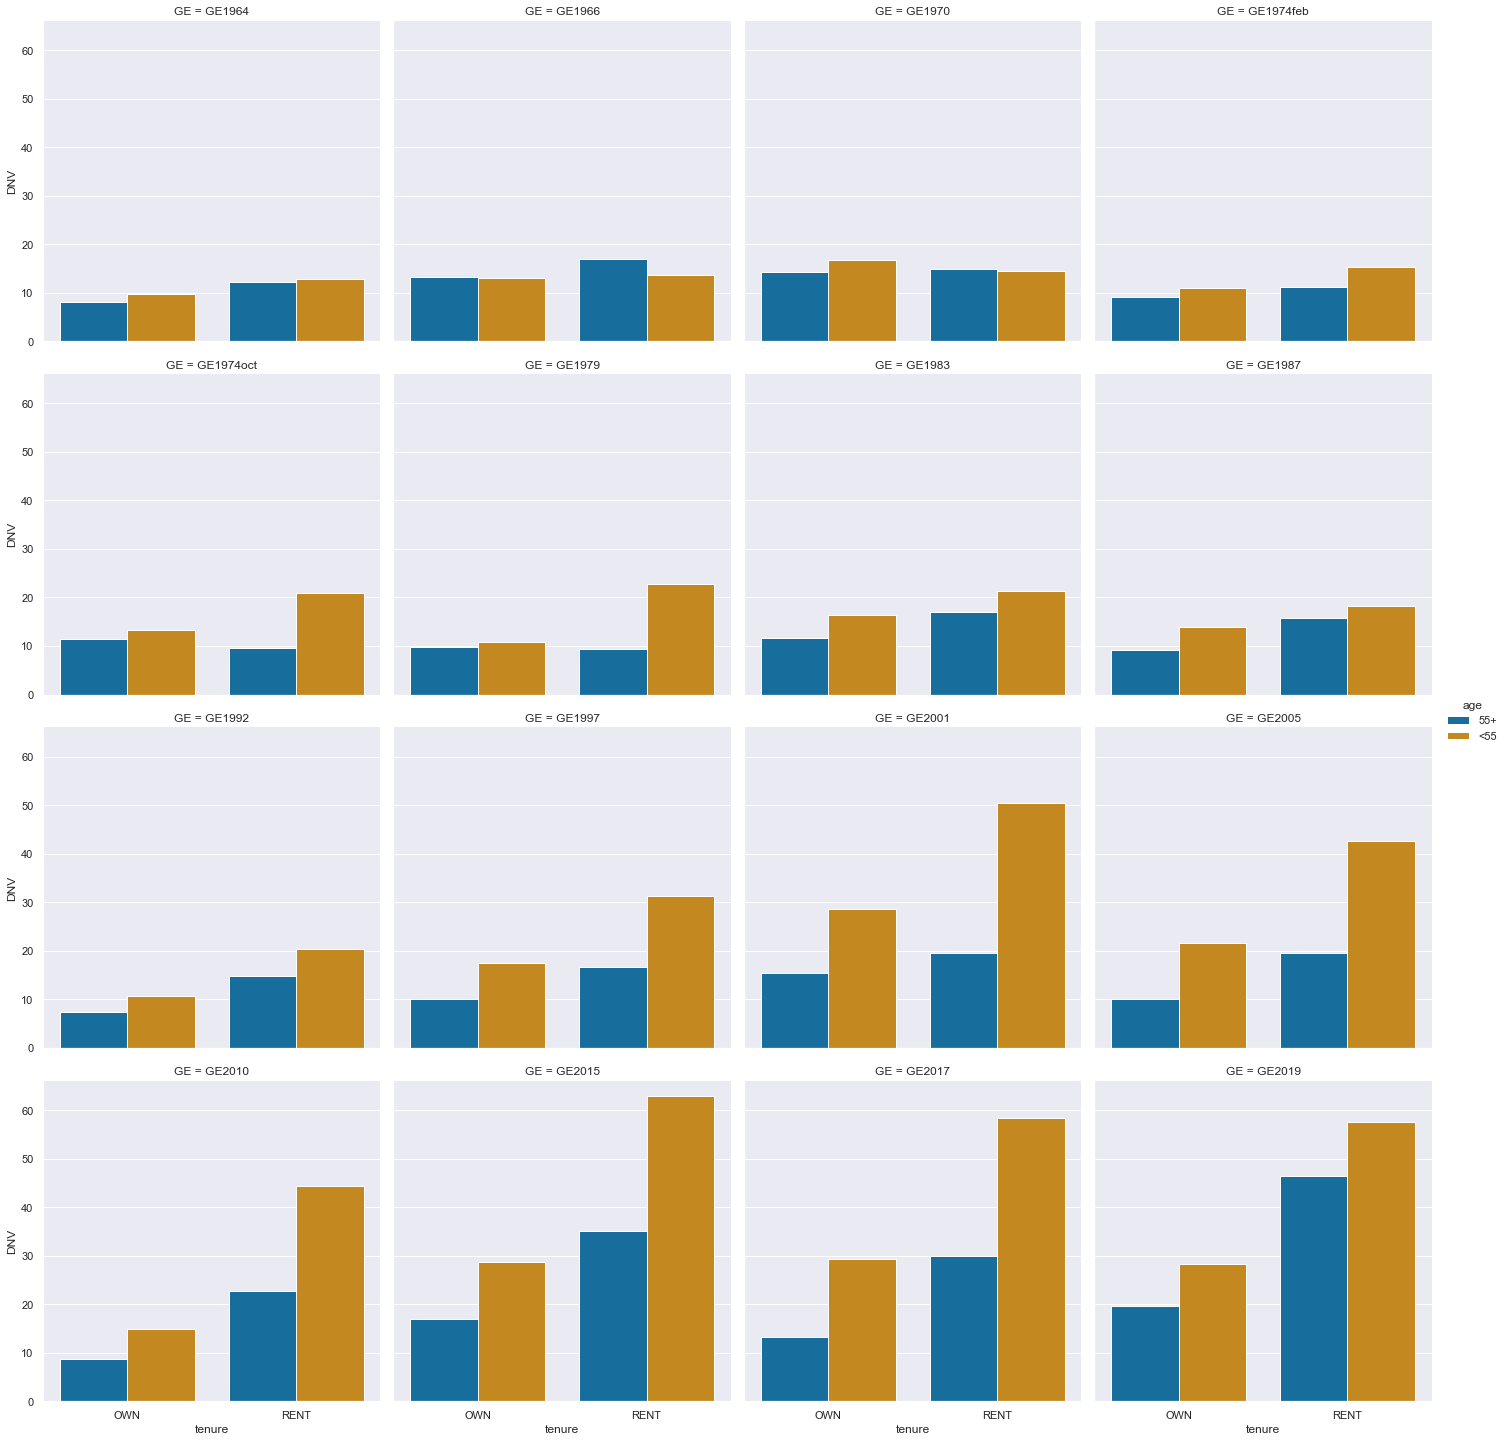

In [223]:
# %%time
mask = df_all_years_hous["tenure"].isin(["OWN","RENT"])&df_all_years_hous["age"].isin(["<55","55+"])
sns.catplot(
    data=df_all_years_hous[mask], x="tenure", y="DNV", col="GE",
    hue="age", col_wrap=4,
    kind='bar',
#     style="age",
#     kind="line",
   
);

 #palette=["b", "r"]

In [224]:
GE_list_hous["GE1966"]

,CON(32.0%),DK(1.4%),DNV(15.9%),LAB(43.3%),LIB(6.7%),OTH(0.0%),PC(0.4%)
55+|DK(3.8%),40.6,2.1,14.2,38.4,4.3,0.0,0.0
55+|OTH(0.8%),34.5,0.0,0.0,65.4,0.0,0.0,0.0
55+|OWN(14.6%),45.9,1.9,13.3,31.3,7.4,0.0,0.0
55+|RENT(15.4%),29.0,0.8,17.0,49.4,3.6,0.0,0.0
<55|DK(17.4%),26.8,2.9,24.9,38.0,7.0,0.0,0.2
<55|OTH(1.8%),27.7,2.8,16.1,46.5,6.6,0.0,0.0
<55|OWN(21.6%),40.4,1.1,13.1,34.8,9.6,0.0,0.7
<55|RENT(24.3%),20.6,0.5,13.7,57.7,6.3,0.2,0.8
DK|OTH(0.0%),0.0,0.0,0.0,0.0,0.0,0.0,0.0
DK|OWN(0.0%),0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [225]:
GE_list_hous["GE1970"]

,CON(40.9%),DK(1.2%),DNV(15.3%),LAB(34.3%),LIB(7.1%),OTH(0.0%),PC(0.8%),SNP(0.1%)
55+|DK(0.4%),50.2,44.4,0.0,5.2,0.0,0.0,0.0,0.0
55+|OTH(0.7%),41.6,0.0,3.7,38.8,15.7,0.0,0.0,0.0
55+|OWN(21.9%),50.2,1.4,14.3,22.7,10.2,0.0,0.8,0.0
55+|RENT(19.8%),39.1,0.6,14.9,42.5,2.7,0.0,0.0,0.0
<55|OTH(1.1%),19.0,0.0,38.3,30.7,11.8,0.0,0.0,0.0
<55|OWN(30.3%),46.9,1.1,16.8,25.1,8.2,0.0,1.6,0.0
<55|RENT(25.3%),27.5,0.9,14.4,49.7,6.2,0.0,0.7,0.3
DK|DK(0.0%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DK|OWN(0.0%),100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
All(100.0%),40.9,1.2,15.3,34.3,7.1,0.0,0.8,0.1


In [226]:
GE_list_hous["GE1970_det"]

,CON(40.9%),DK(1.2%),DNV(15.3%),LAB(34.3%),LIB(7.1%),OTH(0.0%),PC(0.8%),SNP(0.1%)
55+|DK(0.4%),50.2,44.4,0.0,5.2,0.0,0.0,0.0,0.0
55+|OTH(0.7%),41.6,0.0,3.7,38.8,15.7,0.0,0.0,0.0
55+|OWN(21.9%),50.2,1.4,14.3,22.7,10.2,0.0,0.8,0.0
55+|RENT-LA(11.1%),37.3,0.5,11.5,48.2,2.2,0.0,0.0,0.0
55+|RENT-PR(8.7%),41.4,0.7,19.1,35.2,3.3,0.0,0.0,0.0
<55|OTH(1.1%),19.0,0.0,38.3,30.7,11.8,0.0,0.0,0.0
<55|OWN(30.3%),46.9,1.1,16.8,25.1,8.2,0.0,1.6,0.0
<55|RENT-LA(18.1%),26.3,1.2,15.6,47.8,7.3,0.0,1.0,0.5
<55|RENT-PR(7.2%),30.5,0.0,11.5,54.3,3.5,0.0,0.0,0.0
DK|DK(0.0%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [227]:
df_all_years_hous[df_all_years_hous["GE"]=="GE1970"][["index","%","%_voter_only"]]

,index,%,%_voter_only
0,55+|DK(0.4%),0.4,0.474849
1,55+|OTH(0.7%),0.7,0.800239
2,55+|OWN(21.9%),21.9,22.280273
3,55+|RENT(19.8%),19.8,20.002778
4,<55|OTH(1.1%),1.1,0.805700
5,<55|OWN(30.3%),30.3,29.926885
6,<55|RENT(25.3%),25.3,25.709276
7,DK|DK(0.0%),0.0,0.000000
8,DK|OWN(0.0%),0.0,0.000000
9,All(100.0%),NaN,NaN


In [228]:
df_all_years_hous[df_all_years_hous["GE"]=="GE1974feb"][["index","%","%_voter_only"]]

,index,%,%_voter_only
0,55+|DK(0.2%),0.2,0.183063
1,55+|OTH(0.5%),0.5,0.531455
2,55+|OWN(17.7%),17.7,18.408494
3,55+|RENT(16.3%),16.3,16.579464
4,<55|DK(0.1%),0.1,0.114415
5,<55|OTH(1.5%),1.5,1.232244
6,<55|OWN(34.1%),34.1,34.762676
7,<55|RENT(28.3%),28.3,27.425273
8,DK|DK(0.0%),0.0,0.000000
9,DK|OWN(0.4%),0.4,0.419672


In [229]:
GE_dates_dict = {"1964":"15 October 1964",
"1966":"31 March 1966",
"1970":"18 June 1970",
"1974feb":"28 February 1974",
"1974oct":"10 October 1974",
"1979":"3 May 1979",
"1983":"9 June 1983",
"1987":"11 June 1987",
"1992":"9 April 1992",
"1997":"1 May 1997",
"2001":"7 June 2001",
"2005":"5 May 2005",
"2010":"6 May 2010",
"2015":"7 May 2015",
"2017":"8 June 2017",
"2019":"12 December 2019",}

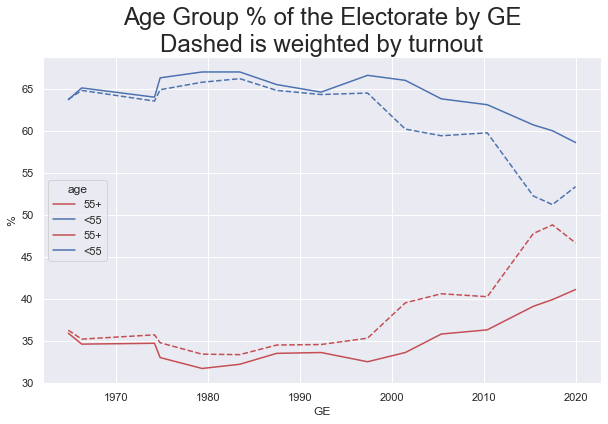

In [230]:
df_all_years_hous.groupby(["age","GE"]).mean()["%"].index


df_all_years_hous["age_minus"] = df_all_years_hous["age"].replace("DK",np.nan).replace("All",np.nan)

plt.figure(figsize=(10,6));
nicer_df = df_all_years_hous.copy()
nicer_df.drop("age",axis=1,inplace=True)
nicer_df = nicer_df.rename(columns={"age_minus":"age"});
nicer_df["GE"] = nicer_df["GE"].apply(lambda x: x.replace("GE",""))
nicer_df = nicer_df[nicer_df["GE"]!="1970"]
nicer_df["GE"] = nicer_df["GE"].cat.remove_unused_categories()
nicer_df["GE"] = pd.to_datetime(nicer_df["GE"].replace(GE_dates_dict))
sns.lineplot(data=nicer_df.groupby(["age","GE"]).sum()["%"].reset_index(),
           x="GE",y="%",hue="age", palette=['r','b'])
sns.lineplot(data=nicer_df.groupby(["age","GE"]).sum()["%_voter_only"].reset_index(),
           x="GE",y="%_voter_only",hue="age",palette=['r','b'],linestyle='--')

plt.title("Age Group % of the Electorate by GE\nDashed is weighted by turnout",fontsize=24);

## Problem with 1970!!!!

Text(0.5, 1.0, 'How about this for a Major Political Crossover?')

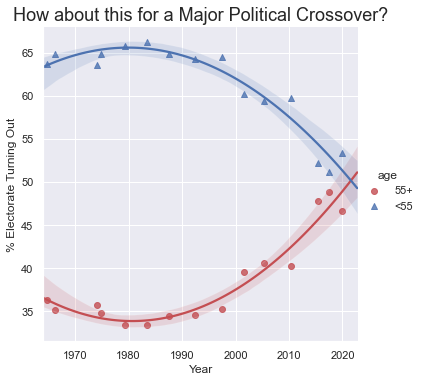

In [231]:
# sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)
# plt.figure(figsize=(10,6));
# ax =plt.gca()
# temp_df = nicer_df.groupby(["age","GE"]).sum()["%"].reset_index()
# temp_df["GE_num"] = temp_df["GE"].dt.year + temp_df["GE"].dt.month/12
# plot1 = sns.lmplot(data=temp_df,
#            x="GE_num",y="%",hue="age",palette=['r','b'],lowess=True,markers=[".","s"])
temp_df = nicer_df.groupby(["age","GE"]).sum()["%_voter_only"].reset_index()
temp_df["GE_num"] = temp_df["GE"].dt.year + temp_df["GE"].dt.month/12
plot1 = sns.lmplot(data=temp_df,
           x="GE_num",y="%_voter_only",hue="age",palette=['r','b'],lowess=False,order=2,markers=["o","^"],truncate=False)
plt.xlim([1964,2023]);
plt.ylabel("% Electorate Turning Out");
plt.xlabel("Year");
plt.title("How about this for a Major Political Crossover?",fontsize=18)



In [232]:
# weighted_median(df.dropna(),"Age","wt_vote")
# weighted_median(df[df["b01"]==1],"Age","wt_vote")

In [233]:
age_medians = pd.DataFrame(columns = ["electorate median age","turnout-weighted electorate median age"])

In [234]:
age_replace_dict = {"Refusal":np.nan,"Not stated":np.nan,"Refused":np.nan}

temp_df = pd.concat([BES_Panel_19["wt_vote"],
           BES_Panel_19['Age'].replace(age_replace_dict).astype(float),
           vote_19],axis=1)

age_medians.loc["2019"] = [weighted_median(temp_df.dropna(),"Age","wt_vote"),\
                           weighted_median(temp_df[temp_df["2019GE"]!="DNV"].dropna(),"Age","wt_vote")]

In [235]:
age_replace_dict = {"Refusal":np.nan,"Not stated":np.nan,"Refused":np.nan}

temp_df = pd.concat([BES_Panel_17["wt_vote"],
           BES_Panel_17['Age'].replace(age_replace_dict).astype(float),
           vote_2017],axis=1)

temp_df.columns = ["wt","Age","vote"]

age_medians.loc["2017"] = [weighted_median(temp_df.dropna(),"Age","wt"),\
                           weighted_median(temp_df[temp_df["vote"]!="DNV"].dropna(),"Age","wt")]
age_medians.loc["2017"]

electorate median age                     49.0
turnout-weighted electorate median age    54.0
Name: 2017, dtype: float64

In [236]:
age_replace_dict = {"Refusal":np.nan,"Not stated":np.nan,"Refused":np.nan}

temp_df = pd.concat([BES_Panel_15["wt_vote"],
           BES_Panel_15['Age'].replace(-1,np.nan),
           vote_2015],axis=1)

temp_df.columns = ["wt","Age","vote"]

age_medians.loc["2015"] = [weighted_median(temp_df.dropna(),"Age","wt"),\
                           weighted_median(temp_df[temp_df["vote"]!="DNV"].dropna(),"Age","wt")]
age_medians.loc["2015"]

electorate median age                     49.0
turnout-weighted electorate median age    53.0
Name: 2015, dtype: float64

In [237]:
replace_dict = {'not stated':np.nan,"refused":np.nan,"don't know":np.nan}

temp_df = pd.concat([
            BES_Panel_10["panwgtc"],
            BES_Panel_10[["aq63","bq89","cq42","zq89"]].replace(replace_dict).astype(float).fillna(method='ffill',axis=1)["zq89"],
            vote_2010],axis=1)

temp_df.columns = ["wt","Age","vote"]

age_medians.loc["2010"] = [weighted_median(temp_df.dropna(),"Age","wt"),\
                           weighted_median(temp_df[temp_df["vote"]!="DNV"].dropna(),"Age","wt")]
age_medians.loc["2010"]

electorate median age                     46.0
turnout-weighted electorate median age    48.0
Name: 2010, dtype: float64

In [238]:
replace_dict = {'not stated':np.nan,"refused":np.nan,"don't know":np.nan}

temp_df = pd.concat([
            BES_Panel_05["prewtbr"],
            BES_Panel_05[["aq48","bq77","tq77","cage"]].replace(999,np.nan).fillna(axis=1,method='ffill')["cage"],
            vote_2005],axis=1)

temp_df.columns = ["wt","Age","vote"]

age_medians.loc["2005"] = [weighted_median(temp_df.dropna(),"Age","wt"),\
                           weighted_median(temp_df[temp_df["vote"]!="DNV"].dropna(),"Age","wt")]
age_medians.loc["2005"]

electorate median age                     46.0
turnout-weighted electorate median age    49.0
Name: 2005, dtype: float64

In [239]:
replace_dict = {"not app":np.nan,'refused':np.nan,'na':np.nan,'refused, na':np.nan}

temp_df = pd.concat([
            BES_Panel_01["postoctw"],
            BES_Panel_01[["aq38","bq72","ageall"]].replace(replace_dict).astype(float).fillna(axis=1,method='ffill')["ageall"],
            vote_2001],axis=1)

temp_df.columns = ["wt","Age","vote"]

age_medians.loc["2001"] = [weighted_median(temp_df.dropna(),"Age","wt"),\
                           weighted_median(temp_df[temp_df["vote"]!="DNV"].dropna(),"Age","wt")]
age_medians.loc["2001"]

electorate median age                     44.0
turnout-weighted electorate median age    49.0
Name: 2001, dtype: float64

In [240]:
replace_dict = {"not app":np.nan,'refused':np.nan,'na':np.nan,'refused, na':np.nan}

temp_df = pd.concat([
            BES_Panel_97["wtergb"],
            BES_Panel_97["rage"].replace("don't   know",np.nan).replace("97+",97).replace('not     answered',np.nan).astype(float),
            vote_1997],axis=1)

temp_df.columns = ["wt","Age","vote"]

age_medians.loc["1997"] = [weighted_median(temp_df.dropna(),"Age","wt"),\
                           weighted_median(temp_df[temp_df["vote"]!="DNV"].dropna(),"Age","wt")]
age_medians.loc["1997"]

electorate median age                     45.0
turnout-weighted electorate median age    47.0
Name: 1997, dtype: float64

In [241]:
replace_dict = {"not app":np.nan,'refused':np.nan,'na':np.nan,'refused, na':np.nan}

temp_df = pd.concat([
            BES_Panel_92["wtfactor"],
            BES_Panel_92["v915c"].replace({ 'refused':np.nan, 'not     answered':np.nan}).astype(float),
            vote_1992],axis=1)

temp_df.columns = ["wt","Age","vote"]

age_medians.loc["1992"] = [weighted_median(temp_df.dropna(),"Age","wt"),\
                           weighted_median(temp_df[temp_df["vote"]!="DNV"].dropna(),"Age","wt")]
age_medians.loc["1992"]

electorate median age                     45.0
turnout-weighted electorate median age    45.0
Name: 1992, dtype: float64

In [242]:
replace_dict = {"not app":np.nan,'refused':np.nan,'na':np.nan,'refused, na':np.nan}

temp_df = pd.concat([
            BES_Panel_87["weight"],
            BES_Panel_87["v58c"].replace("refused",np.nan).replace("not answered",np.nan).astype(float),
            vote_1987],axis=1)

temp_df.columns = ["wt","Age","vote"]

age_medians.loc["1987"] = [weighted_median(temp_df.dropna(),"Age","wt"),\
                           weighted_median(temp_df[temp_df["vote"]!="DNV"].dropna(),"Age","wt")]
age_medians.loc["1987"]

electorate median age                     44.0
turnout-weighted electorate median age    45.0
Name: 1987, dtype: float64

In [243]:
replace_dict = {"not app":np.nan,'refused':np.nan,'na':np.nan,'refused, na':np.nan}

temp_df = pd.concat([
            BES_Panel_83["weight"],
            BES_Panel_83['q56'].replace("na",np.nan).astype('float'),
            vote_1983],axis=1)

temp_df.columns = ["wt","Age","vote"]

age_medians.loc["1983"] = [weighted_median(temp_df.dropna(),"Age","wt"),\
                           weighted_median(temp_df[temp_df["vote"]!="DNV"].dropna(),"Age","wt")]
age_medians.loc["1983"]

electorate median age                     44.0
turnout-weighted electorate median age    45.0
Name: 1983, dtype: float64

In [244]:
replace_dict = {"not app":np.nan,'refused':np.nan,'na':np.nan,'refused, na':np.nan}

temp_df = pd.concat([
            pd.Series(np.ones(vote_1979.shape)),
            1979-BES_Panel_79["m191279"].replace(0,np.nan).astype(float),
            vote_1979],axis=1)

temp_df.columns = ["wt","Age","vote"]

age_medians.loc["1979"] = [weighted_median(temp_df.dropna(),"Age","wt"),\
                           weighted_median(temp_df[temp_df["vote"]!="DNV"].dropna(),"Age","wt")]
age_medians.loc["1979"]

electorate median age                     45.0
turnout-weighted electorate median age    46.0
Name: 1979, dtype: float64

In [245]:
replace_dict = {"not app":np.nan,'refused':np.nan,'na':np.nan,'refused, na':np.nan}

temp_df = pd.concat([
            pd.Series(np.ones(vote_1974_oct.shape)),
            1974-BES_Panel_74_oct["oct191"].replace(0,np.nan).replace('na',np.nan).astype(float),
            vote_1974_oct],axis=1)

temp_df.columns = ["wt","Age","vote"]

age_medians.loc["1974oct"] = [weighted_median(temp_df.dropna(),"Age","wt"),\
                           weighted_median(temp_df[temp_df["vote"]!="DNV"].dropna(),"Age","wt")]
age_medians.loc["1974oct"]

electorate median age                     45.0
turnout-weighted electorate median age    46.0
Name: 1974oct, dtype: float64

In [246]:
replace_dict = {"not app":np.nan,'refused':np.nan,'na':np.nan,'refused, na':np.nan,0:np.nan}

temp_df = pd.concat([
            pd.Series(np.ones(vote_1974_feb.shape)),
            1974-BES_Panel_74_feb["feb191"].replace(replace_dict).astype(float),
            vote_1974_feb],axis=1)

temp_df.columns = ["wt","Age","vote"]

age_medians.loc["1974feb"] = [weighted_median(temp_df.dropna(),"Age","wt"),\
                           weighted_median(temp_df[temp_df["vote"]!="DNV"].dropna(),"Age","wt")]
age_medians.loc["1974feb"]

electorate median age                     46.0
turnout-weighted electorate median age    47.0
Name: 1974feb, dtype: float64

In [247]:
temp_df = pd.concat([BES_Panel_63_70['v12'],
           BES_Panel_63_70["v939"].replace(0,np.nan).astype(float),
           vote_64],axis=1)[(BES_Panel_63_70["v11"]==1)]

temp_df.columns = ["wt","Age","vote"]

age_medians.loc["1964"] = [weighted_median(temp_df.dropna(),"Age","wt"),\
                           weighted_median(temp_df[temp_df["vote"]!="DNV"].dropna(),"Age","wt")]

In [248]:
temp_df = pd.concat([BES_Panel_63_70['v14'],
           BES_Panel_63_70["v940"].replace(0,np.nan).astype(float),
           vote_66],axis=1)[(BES_Panel_63_70["v13"]==1)]

temp_df.columns = ["wt","Age","vote"]

age_medians.loc["1966"] = [weighted_median(temp_df.dropna(),"Age","wt"),\
                           weighted_median(temp_df[temp_df["vote"]!="DNV"].dropna(),"Age","wt")]

In [249]:
electorate_70_filter  = BES_Panel_63_70["v34"].replace(0,np.nan).notnull()
electorate_70_weights = BES_Panel_63_70[["v25","v22","v20","v16"]].mean(axis=1)
electorate_70_weights = electorate_70_weights.replace(0,np.nan)
electorate_70_weights = electorate_70_weights*(electorate_70_weights.notnull().sum()/electorate_70_weights.sum())

temp_df = pd.concat([electorate_70_weights,
           BES_Panel_63_70["v941"].replace(0,np.nan).astype(float),
           vote_70],axis=1)[electorate_70_filter==1]

temp_df.columns = ["wt","Age","vote"]

age_medians.loc["1970"] = [weighted_median(temp_df.dropna(),"Age","wt"),\
                           weighted_median(temp_df[temp_df["vote"]!="DNV"].dropna(),"Age","wt")]
age_medians.loc["1970"]

electorate median age                     51.0
turnout-weighted electorate median age    51.0
Name: 1970, dtype: float64

In [250]:
BES_Panel_63_70['v14'][(BES_Panel_63_70["v13"]==0)].value_counts()

0.0    882
1.0     65
1.1     36
1.4     36
1.2     29
Name: v14, dtype: int64

In [251]:
BES_Panel_63_70['v14']*(BES_Panel_63_70["v13"].replace(0.0,np.nan))

0       NaN
1       NaN
2       1.4
3       1.2
4       1.0
       ... 
2917    0.8
2918    0.8
2919    0.8
2920    0.8
2921    0.8
Length: 2922, dtype: float64

In [252]:
age_medians.sort_index()

,electorate median age,turnout-weighted electorate median age
1964,48.0,48.0
1966,47.0,47.0
1970,51.0,51.0
1974feb,46.0,47.0
1974oct,45.0,46.0
1979,45.0,46.0
1983,44.0,45.0
1987,44.0,45.0
1992,45.0,45.0
1997,45.0,47.0


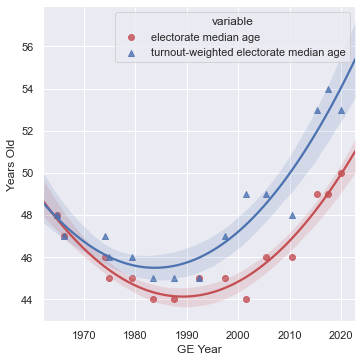

In [253]:
age_med = age_medians.drop("1970").sort_index().reset_index()
age_med["index"] = age_med["index"].replace(GE_dates_dict)

age_med.columns = ['GE year', 'electorate median age',
       'turnout-weighted electorate median age']
# plot1 = sns.lmplot(data=temp_df,
#            x="GE_num",y="%_voter_only",hue="age",palette=['r','b'],lowess=False,order=2,markers=["o","^"],truncate=False)

temp_df = age_med.melt(id_vars = "GE year",value_vars = ['electorate median age', 'turnout-weighted electorate median age'])
temp_df["GE year"] = pd.to_datetime(temp_df["GE year"])
temp_df["GE_num"] = temp_df["GE year"].dt.year + temp_df["GE year"].dt.month/12
plot1 = sns.lmplot(data=temp_df,
           x="GE_num",y="value",hue="variable",palette=['r','b'],lowess=False,order=2,markers=["o","^"],truncate=False,legend_out=False)
plt.ylabel("Years Old");
plt.xlabel("GE Year");

In [254]:
df_all_years_hous.loc[["All" in df_all_years_hous.loc[x,"index"] for x in df_all_years_hous.index]]

,index,COM,CON,DK,DNV,LAB,LIB,OTH,PC,age,...,BNP,GP,LD,SD,REF,UKIP,BXP,left-lib bloc,right-auth bloc,age_minus


In [255]:
compare_ge = df_all_years_hous.loc[df_all_years_hous["index"].apply(lambda x: "All" in x)][["GE","CON","LAB","DNV"]]
compare_ge = compare_ge.reset_index()
compare_ge[["CON","LAB"]] = compare_ge[["CON","LAB"]].apply(lambda x: 100*x/(100-compare_ge["DNV"]))
compare_ge


# some significant deviations - no obv pattern!
# add wikipedia results and flag differentials?

,index,GE,CON,LAB,DNV
0,10,GE1964,40.832396,45.894263,11.1
1,11,GE1966,38.049941,51.486326,15.9
2,9,GE1970,48.288076,40.495868,15.3
3,10,GE1979,44.988345,36.013986,14.2
4,9,GE1974oct,34.777518,40.983607,14.6
5,11,GE1974feb,36.291240,38.794084,12.1
6,10,GE1983,43.884892,27.817746,16.6
7,12,GE1987,42.857143,30.081301,13.9
8,11,GE1992,44.178082,33.105023,12.4
9,11,GE1997,27.960928,47.741148,18.1


In [256]:
# compare_ge[["CON","LAB"]]/(100-compare_ge["DNV"])

In [257]:
df_all_years_hous

,index,COM,CON,DK,DNV,LAB,LIB,OTH,PC,age,...,BNP,GP,LD,SD,REF,UKIP,BXP,left-lib bloc,right-auth bloc,age_minus
0,55+|DK(0.4%),0.0,21.4,38.0,15.4,9.5,15.4,0.0,0.0,55+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.9,21.4,55+
1,55+|OTH(0.9%),0.0,52.0,0.0,18.8,23.4,5.7,0.0,0.0,55+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.1,52.0,55+
2,55+|OWN(16.4%),0.3,54.6,2.3,8.1,25.6,8.7,0.0,0.0,55+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.6,54.6,55+
3,55+|RENT(18.2%),0.0,30.2,1.0,12.2,50.8,5.0,0.3,0.3,55+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.1,30.2,55+
4,<55|DK(0.5%),0.0,31.3,27.2,0.0,16.1,25.2,0.0,0.0,<55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.3,31.3,<55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,DK|DK(0.0%),NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,DK,...,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN
9,DK|OTH(0.0%),NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,DK,...,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN
10,DK|OWN(0.0%),NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,DK,...,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN
11,DK|RENT(0.0%),NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,DK,...,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN


In [258]:
df_all_years_hous[["index","%","GE"]]

,index,%,GE
0,55+|DK(0.4%),0.4,GE1964
1,55+|OTH(0.9%),0.9,GE1964
2,55+|OWN(16.4%),16.4,GE1964
3,55+|RENT(18.2%),18.2,GE1964
4,<55|DK(0.5%),0.5,GE1964
...,...,...,...
8,DK|DK(0.0%),0.0,GE2019
9,DK|OTH(0.0%),0.0,GE2019
10,DK|OWN(0.0%),0.0,GE2019
11,DK|RENT(0.0%),0.0,GE2019


In [259]:
df_all_years_hous["demo_stub"] = df_all_years_hous["index"].apply(lambda x: x.split("(")[0])

In [260]:
df_demo = df_all_years_hous.copy()
df_demo = df_demo[df_demo["age_minus"].notnull()]
df_demo["tenure"] = df_demo["demo_stub"].apply(lambda x: x.split("|")[1])
df_demo["tenure"] = df_demo["tenure"].replace({"DK":np.nan,"OTH":np.nan})
df_demo = df_demo[df_demo["tenure"].notnull()]

In [261]:
### problems with 1966 and 1970!

df_demo["GE"] = df_demo["GE"].replace("GE1966",np.nan).replace("GE1970",np.nan)
df_demo = df_demo[df_demo["GE"].notnull()]

In [262]:
df_demo["GE"] = df_demo["GE"].apply(lambda x: x.replace("GE",""))
df_demo["GE"] = pd.to_datetime(df_demo["GE"].replace(GE_dates_dict))
df_demo["GE_num"] = df_demo["GE"].dt.year + df_demo["GE"].dt.month/12

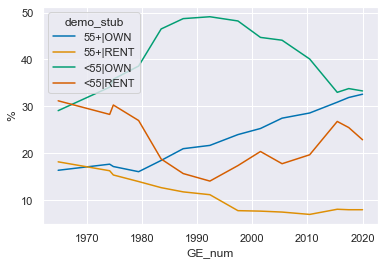

In [263]:
sns.lineplot(data= df_demo[["GE_num","demo_stub","%"]],x="GE_num",y="%",hue="demo_stub")

In [264]:
df_demo["voting%"] = df_demo["%"] * (100-df_demo["DNV"])/100
df_demo["nonvoting%"] = df_demo["%"] * (df_demo["DNV"])/100

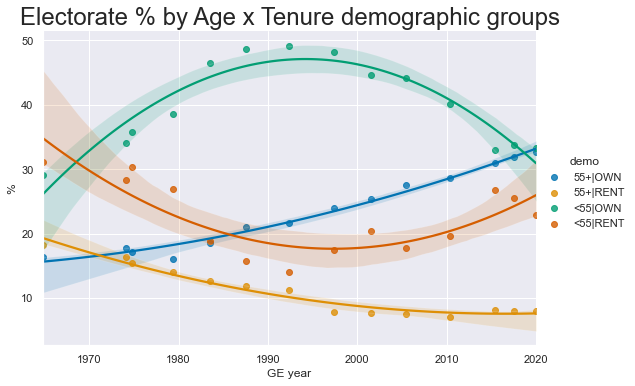

In [265]:


sns.lmplot(data= df_demo[["GE_num","demo_stub","%"]].rename(columns={"demo_stub":"demo","GE_num":"GE year"}),
           x="GE year",y="%",hue="demo",lowess=False,order=2,
          height=5,aspect=1.5);
plt.title("Electorate % by Age x Tenure demographic groups",fontsize=24);

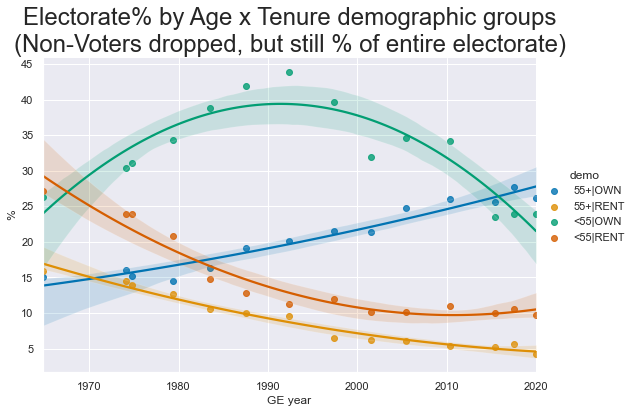

In [266]:
sns.lmplot(data= df_demo[["GE_num","demo_stub","voting%"]].rename(columns={"demo_stub":"demo","GE_num":"GE year","voting%":"%"}),
           x="GE year",y="%",hue="demo",lowess=False,order=2,
          height=5,aspect=1.5);
plt.title("Electorate% by Age x Tenure demographic groups\n(Non-Voters dropped, but still % of entire electorate)",fontsize=24);

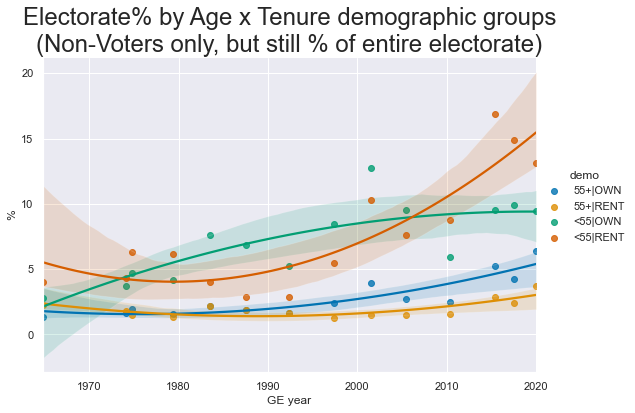

In [267]:
sns.lmplot(data= df_demo[["GE_num","demo_stub","nonvoting%"]].rename(columns={"demo_stub":"demo","GE_num":"GE year","nonvoting%":"%"}),
           x="GE year",y="%",hue="demo",lowess=False,order=2,
          height=5,aspect=1.5);
plt.title("Electorate% by Age x Tenure demographic groups\n(Non-Voters only, but still % of entire electorate)",fontsize=24);

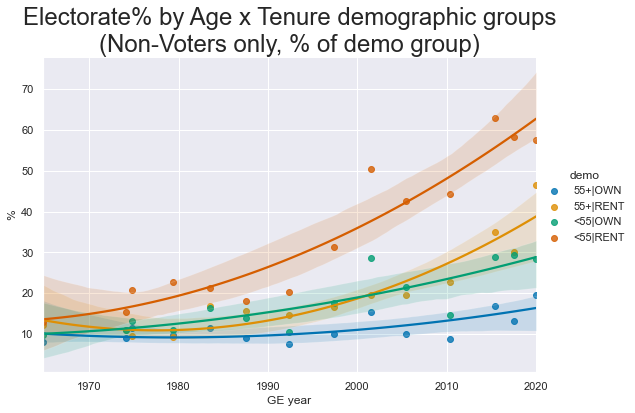

In [268]:
sns.lmplot(data= df_demo[["GE_num","demo_stub","DNV"]].rename(columns={"demo_stub":"demo","GE_num":"GE year","DNV":"%"}),
           x="GE year",y="%",hue="demo",lowess=False,order=2,
          height=5,aspect=1.5);
plt.title("Electorate% by Age x Tenure demographic groups\n(Non-Voters only, % of demo group)",fontsize=24);

In [269]:
# df

In [270]:
# temp_df

In [271]:
replace_dict = {"not app":np.nan,'refused':np.nan,'na':np.nan,'refused, na':np.nan,0:np.nan}
BES_Panel_74_feb["Age"] = 1974-BES_Panel_74_feb["feb191"].replace(replace_dict).astype(float)
BES_Panel_74_oct["Age"] = 1974-BES_Panel_74_oct["oct191"].replace(replace_dict).astype(float)
BES_Panel_79["Age"] = 1979-BES_Panel_79["m191279"].replace(replace_dict).astype(float)

replace_dict = {0:np.nan}
electorate_70_filter  = BES_Panel_63_70["v34"].replace(replace_dict).notnull()
electorate_70_weights = BES_Panel_63_70[["v25","v22","v20","v16"]].mean(axis=1)
electorate_70_weights = electorate_70_weights.replace(replace_dict)
electorate_70_weights = electorate_70_weights*(electorate_70_weights.notnull().sum()/electorate_70_weights.sum())
BES_Panel_63_70["wt_70"] = electorate_70_weights

BES_Panel_63_70["wt_66"] = (BES_Panel_63_70['v14']*BES_Panel_63_70["v13"]).replace(replace_dict).astype(float)

BES_Panel_63_70["wt_64"] = (BES_Panel_63_70['v12']*BES_Panel_63_70["v11"]).replace(replace_dict).astype(float)

In [272]:
## weights are either a single string relating to dataframe column
## or a ... NaN? ... meaning create pd.Series(np.ones(vote_1974_feb.shape))

## age variables are a list (mostly length 1), ordered by increasing reliability

## replace_dict, astype float for all

In [273]:
wt_list = {"2019":"wt_vote",
           "2017":"wt_vote",
           "2015":"wt_vote",
           "2010":"panwgtc",
           "2005":"prewtbr",
           "2001":"postoctw",
           "1997":"wtergb",
           "1992":"wtfactor",
           "1987":"weight",
           "1983":"weight",
           "1979":np.nan,
           "1974_feb":np.nan,
           "1974_oct":np.nan,
           "1970":"wt_70",
           "1966":"wt_66",
           "1964":"wt_64",}

age_list = {"2019":["Age"],
           "2017":["Age"],
           "2015":["Age"],
           "2010":["aq63","bq89","cq42","zq89"],
           "2005":["aq48","bq77","tq77","cage"],
           "2001":["aq38","bq72","ageall"],
           "1997":["rage"],
           "1992":["v915c"],
           "1987":["v58c"],
           "1983":['q56'],
           "1979":["Age"],
           "1974_feb":["Age"],
           "1974_oct":["Age"],
           "1970":["v941"],
           "1966":["v940"],
           "1964":["v939"],}

year_list = {"2019":2019,
           "2017":2017,
           "2015":2015,
           "2010":2010,
           "2005":2005,
           "2001":2001,
           "1997":1997,
           "1992":1992,
           "1987":1987,
           "1983":1983,
           "1979":1979,
           "1974_feb":1974,
           "1974_oct":1974,
           "1970":1970,
           "1966":1966,
           "1964":1964,}

vote_list = {"2019":vote_19,
           "2017":vote_2017,
           "2015":vote_2015,
           "2010":vote_2010,
           "2005":vote_2005,
           "2001":vote_2001,
           "1997":vote_1997,
           "1992":vote_1992,
           "1987":vote_1987,
           "1983":vote_1983,
           "1979":vote_1979,
           "1974_feb":vote_1974_feb,
           "1974_oct":vote_1974_oct,
           "1970":vote_70,
           "1966":vote_66,
           "1964":vote_64,}

BES_df_list = {"2019":BES_Panel_19,
           "2017":BES_Panel_17,
           "2015":BES_Panel_15,
           "2010":BES_Panel_10,
           "2005":BES_Panel_05,
           "2001":BES_Panel_01,
           "1997":BES_Panel_97,
           "1992":BES_Panel_92,
           "1987":BES_Panel_87,
           "1983":BES_Panel_83,
           "1979":BES_Panel_79,
           "1974_feb":BES_Panel_74_feb,
           "1974_oct":BES_Panel_74_oct,
           "1970":BES_Panel_63_70,
           "1966":BES_Panel_63_70,
           "1964":BES_Panel_63_70,}

BES_label_list = {"2019":labels_19,
           "2017":labels_17,
           "2015":labels_15,
           "2010":labels_10,
           "2005":labels_05,
           "2001":labels_01,
           "1997":labels_97,
           "1992":labels_92,
           "1987":labels_87,
           "1983":labels_83,
           "1979":labels_79,
           "1974_feb":labels_74_feb,
           "1974_oct":labels_74_oct,
           "1970":labels_63_70,
           "1966":labels_63_70,
           "1964":labels_63_70,}

In [274]:
replace_dict = {"Refusal":np.nan,"Not stated":np.nan,"Refused":np.nan,
                "Refusal":np.nan,"Not stated":np.nan,"Refused":np.nan,
                "Refusal":np.nan,"Not stated":np.nan,"Refused":np.nan,-1:np.nan,
                'not stated':np.nan,"refused":np.nan,"don't know":np.nan,
                'not stated':np.nan,"refused":np.nan,"don't know":np.nan,999:np.nan,
                "not app":np.nan,'refused':np.nan,'na':np.nan,'refused, na':np.nan,
                "not app":np.nan,'refused':np.nan,'na':np.nan,'refused, na':np.nan,"don't   know":np.nan,"97+":97,'not     answered':np.nan,
                "not app":np.nan,'refused':np.nan,'na':np.nan,'refused, na':np.nan,'not     answered':np.nan,
                "not app":np.nan,'refused':np.nan,'na':np.nan,'refused, na':np.nan,
                "not app":np.nan,'refused':np.nan,'na':np.nan,'refused, na':np.nan,
                "not app":np.nan,'refused':np.nan,'na':np.nan,'refused, na':np.nan,0:np.nan,
                "not app":np.nan,'refused':np.nan,'na':np.nan,'refused, na':np.nan,0:np.nan,
                "not app":np.nan,'refused':np.nan,'na':np.nan,'refused, na':np.nan,0:np.nan,
                0:np.nan,
                'not answered':np.nan}

In [275]:
## go through year_list keys

df_by = pd.DataFrame()
first_df = True


for year_str in year_list.keys():

    temp_df = pd.DataFrame(columns = ["GE","year","wt","age","vote","birth_year"])

    
    temp_df["vote"] = vote_list[year_str]
    
    wt_var = wt_list[year_str]
    if pd.notnull(wt_var):
        temp_df["wt"] = BES_df_list[year_str][wt_var].replace(replace_dict).astype('float')
    else:
        temp_df["wt"] = pd.Series(np.ones(temp_df["vote"].shape))
        
    temp_df["age"] = BES_df_list[year_str][age_list[year_str]].replace(replace_dict).astype('float').fillna(axis=1,method='ffill')[age_list[year_str][-1]]
    
    temp_df["GE"] = year_str
    temp_df["year"] = year_list[year_str]    
    
    temp_df["birth_year"] = temp_df["year"] - temp_df["age"]
    
    
    
    if first_df:
        df_by = temp_df.copy()
        first_df = False
    else:
        df_by = df_by.append(temp_df)
    
    
    
    
    

In [276]:
year_list[year_str] 

1964

In [277]:
df_by

,GE,year,wt,age,vote,birth_year
0,2019,2019,0.926940,34.0,DNV,1985.0
1,2019,2019,NaN,NaN,DNV,NaN
2,2019,2019,0.920836,33.0,LAB,1986.0
3,2019,2019,1.197730,22.0,DNV,1997.0
4,2019,2019,1.979724,35.0,DNV,1984.0
...,...,...,...,...,...,...
2917,1964,1964,NaN,NaN,DK,NaN
2918,1964,1964,NaN,NaN,DK,NaN
2919,1964,1964,NaN,NaN,DK,NaN
2920,1964,1964,NaN,NaN,DK,NaN


In [278]:
df_by

,GE,year,wt,age,vote,birth_year
0,2019,2019,0.926940,34.0,DNV,1985.0
1,2019,2019,NaN,NaN,DNV,NaN
2,2019,2019,0.920836,33.0,LAB,1986.0
3,2019,2019,1.197730,22.0,DNV,1997.0
4,2019,2019,1.979724,35.0,DNV,1984.0
...,...,...,...,...,...,...
2917,1964,1964,NaN,NaN,DK,NaN
2918,1964,1964,NaN,NaN,DK,NaN
2919,1964,1964,NaN,NaN,DK,NaN
2920,1964,1964,NaN,NaN,DK,NaN


In [279]:
df_by["year"]

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
2917    1964
2918    1964
2919    1964
2920    1964
2921    1964
Name: year, Length: 55618, dtype: int64

In [280]:
# BES_df_list[year_str][age_list[year_str]].replace(replace_dict).fillna(axis=1,method='ffill')[age_list[year_str][-1]]

In [281]:
temp_df["age"].value_counts()

44.0    57
58.0    52
37.0    46
43.0    45
60.0    44
        ..
85.0     2
88.0     2
83.0     2
93.0     1
99.0     1
Name: age, Length: 71, dtype: int64

In [282]:
year_list.keys()

dict_keys(['2019', '2017', '2015', '2010', '2005', '2001', '1997', '1992', '1987', '1983', '1979', '1974_feb', '1974_oct', '1970', '1966', '1964'])

In [283]:
df_by.isnull().sum()

GE                0
year              0
wt            12761
age            7799
vote           3928
birth_year     7799
dtype: int64

In [284]:
df_by["vote"].value_counts()

CON     14089
LAB     14021
DNV      8698
DK       6516
LD       4164
LIB      1370
SNP      1118
ALL       416
UKIP      365
GP        277
PC        252
OTH       165
SD         94
REF        54
BNP        47
BXP        43
COM         1
Name: vote, dtype: int64

In [285]:
vote_simple_dict = {'CON':"CON", 'LAB':"LAB", 'DNV':"DNV", 'DK':"DK", 'LD':"LD", 'LIB':"LD", 'SNP':"SNP", 'ALL':"LD", 'UKIP':"REFUK", 'GP':"GP",
       'PC':"PC", 'OTH':np.nan, 'SD':np.nan, 'REF':"REFUK", 'BNP':"REFUK", 'BXP':"REFUK", 'COM':np.nan}

vote_bloc_dict = {'CON':"Right-Auth", 'LAB':"Left-Lib", 'DNV':"Neither", 'DK':"Neither", 'LD':"Left-Lib", 'LIB':"Left-Lib", 'SNP':"Left-Lib", 'ALL':"Left-Lib", 'UKIP':"Right-Auth", 'GP':"Left-Lib",
       'PC':"Left-Lib", 'OTH':"Neither", 'SD':"Neither", 'REF':"Right-Auth", 'BNP':"Right-Auth", 'BXP':"Right-Auth", 'COM':"Left-Lib"}


In [286]:
df_by["vote_simple"] = df_by["vote"].replace(vote_simple_dict)
df_by["bloc"] = df_by["vote"].replace(vote_bloc_dict)

In [287]:
df_by["vote"].value_counts()

CON     14089
LAB     14021
DNV      8698
DK       6516
LD       4164
LIB      1370
SNP      1118
ALL       416
UKIP      365
GP        277
PC        252
OTH       165
SD         94
REF        54
BNP        47
BXP        43
COM         1
Name: vote, dtype: int64

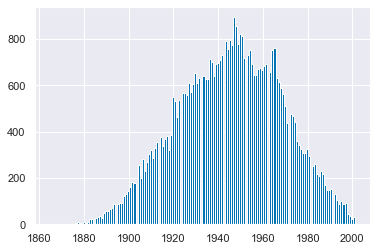

In [288]:
df_by["birth_year"].hist(bins=150)

In [289]:
df_by["birth_year"].max(),df_by["birth_year"].min()

(2001.0, 1865.0)

In [290]:
# df_by[df_by["birth_year"]==2001]

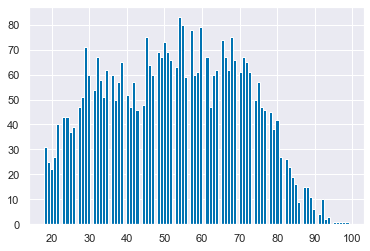

In [291]:
df_by[df_by["GE"]=="2019"]["age"].hist(bins=100)

In [292]:
temp = pd.get_dummies( df_by["vote_simple"] )
df_by[temp.columns] = temp

In [293]:
temp = pd.get_dummies( df_by["bloc"] )
df_by[temp.columns] = temp

In [294]:
# df_by.groupby("birth_year").mean()

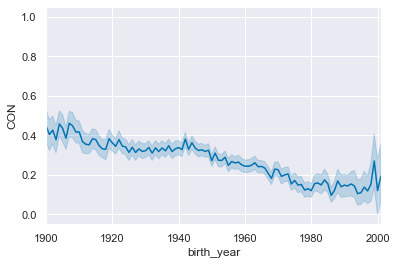

In [295]:
sns.lineplot(data = df_by,x="birth_year",y="CON")
plt.xlim([1900,2001]);

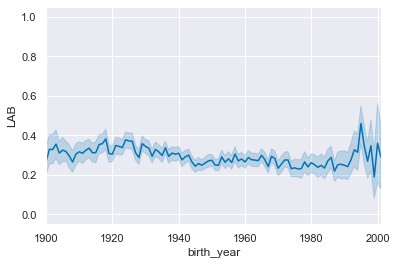

In [296]:
sns.lineplot(data = df_by,x="birth_year",y="LAB")
plt.xlim([1900,2001]);

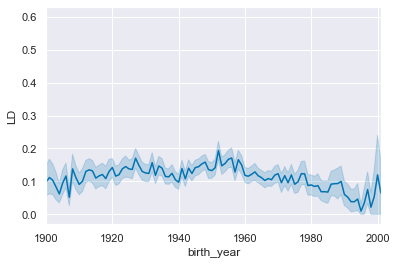

In [297]:
sns.lineplot(data = df_by,x="birth_year",y="LD")
plt.xlim([1900,2001]);

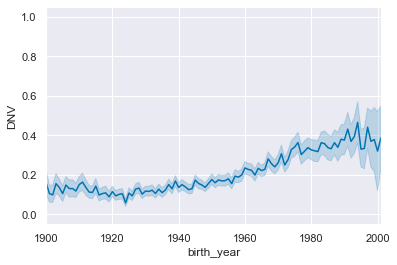

In [298]:
sns.lineplot(data = df_by,x="birth_year",y="DNV")
plt.xlim([1900,2001]);

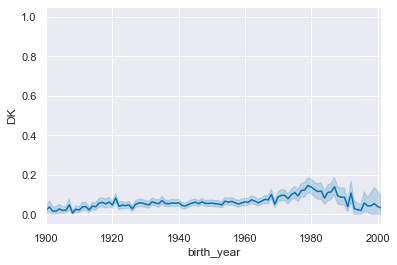

In [299]:
sns.lineplot(data = df_by,x="birth_year",y="DK")
plt.xlim([1900,2001]);

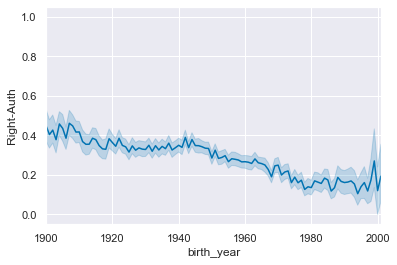

In [300]:
sns.lineplot(data = df_by,x="birth_year",y='Right-Auth')
plt.xlim([1900,2001]);

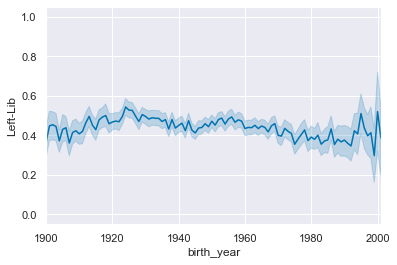

In [301]:
sns.lineplot(data = df_by,x="birth_year",y='Left-Lib')
plt.xlim([1900,2001]);

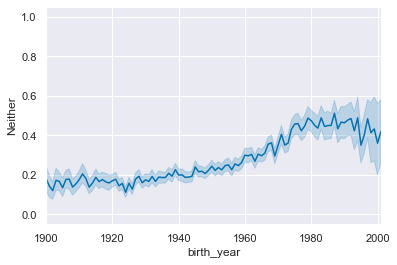

In [302]:
sns.lineplot(data = df_by,x="birth_year",y='Neither')
plt.xlim([1900,2001]);

In [303]:
# quietly drops row with np.nan weights!    
def weighted_mean(x, **kws):
    val, weight = map(np.asarray, zip(*x))
    mask = (~np.isnan(val))&(~np.isnan(weight))
    val, weight = val[mask],weight[mask]
    return (val * weight).sum() / weight.sum()

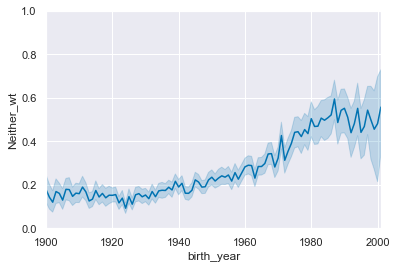

In [304]:
col = "Neither"

df_by[col+"_wt"] = list(zip(df_by[col],df_by["wt"]))
sns.lineplot(data = df_by,x="birth_year",y=col+"_wt",estimator=weighted_mean)
plt.xlim([1900,2001]);
plt.ylim([0,1]);

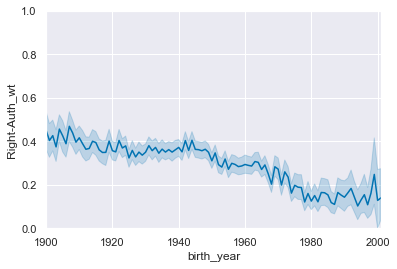

In [305]:
col = "Right-Auth"

df_by[col+"_wt"] = list(zip(df_by[col],df_by["wt"]))
sns.lineplot(data = df_by,x="birth_year",y=col+"_wt",estimator=weighted_mean)
plt.xlim([1900,2001]);
plt.ylim([0,1]);

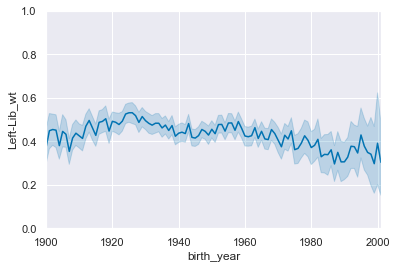

In [306]:
col = "Left-Lib"

df_by[col+"_wt"] = list(zip(df_by[col],df_by["wt"]))
sns.lineplot(data = df_by,x="birth_year",y=col+"_wt",estimator=weighted_mean)
plt.xlim([1900,2001]);
plt.ylim([0,1]);

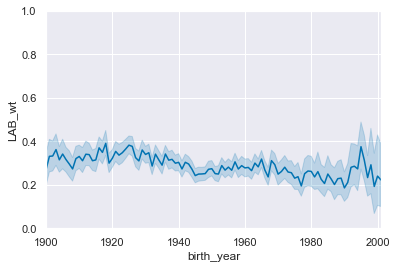

In [307]:
col = "LAB"

df_by[col+"_wt"] = list(zip(df_by[col],df_by["wt"]))
sns.lineplot(data = df_by,x="birth_year",y=col+"_wt",estimator=weighted_mean)
plt.xlim([1900,2001]);
plt.ylim([0,1]);

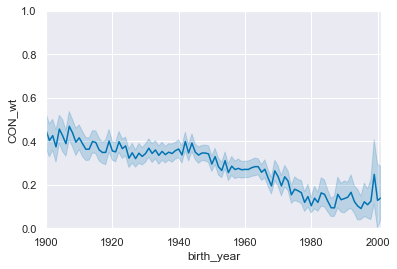

In [308]:
col = "CON"

df_by[col+"_wt"] = list(zip(df_by[col],df_by["wt"]))
sns.lineplot(data = df_by,x="birth_year",y=col+"_wt",estimator=weighted_mean)
plt.xlim([1900,2001]);
plt.ylim([0,1]);

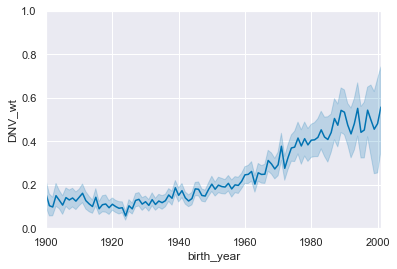

In [309]:
col = "DNV"

df_by[col+"_wt"] = list(zip(df_by[col],df_by["wt"]))
sns.lineplot(data = df_by,x="birth_year",y=col+"_wt",estimator=weighted_mean)
plt.xlim([1900,2001]);
plt.ylim([0,1]);

In [310]:
# sns.lineplot(data = df_by,x="birth_year",y="GP")
# plt.xlim([1900,2001]);

In [311]:
### Bleurgh - no structure other than Young/Old - not unexpected, but disappointing
# I was wrong, forgot to add appended datasets, so that was only 2019

In [312]:
# vote_simple_dict

In [313]:
### On the face of it - pre-weights! - 3 stories by birth year
# (1) Lab/left-lib pretty static on 40%
# (2) Con dives from 40% to 20%
# (3) Non-voting rises from 20% to 40%

In [314]:
# NEXT
# (a) linear regression for CON/LAB/DNV against Age, Birth-Cohort, GE
# ideally, linear regression *with sample weighting*

# (b) xgboost regression on BES f2f datasets


# (c) pre-emptive ^ build a portable version of all the BES f2f datasets

In [315]:
housing_det_list = {
           "2019":housing_det19,
           "2017":housing_det17,
           "2015":housing_det15,
           "2010":housing_det10,
           "2005":housing_det05,
           "2001":housing_det01,
           "1997":housing_det97,
           "1992":housing_det92,
           "1987":housing_det87,
           "1983":housing_det83,
           "1979":housing_det79,
           "1974_feb":housing_det74feb,
           "1974_oct":housing_det74oct,
           "1970":housing_det_70,
           "1966":housing_det_66,
           "1964":housing_det_64,}

housing_list = {"2019":housing_19,
           "2017":housing_17,
           "2015":housing_15,
           "2010":housing_10,
           "2005":housing_05,
           "2001":housing_01,
           "1997":housing_97,
           "1992":housing_92,
           "1987":housing_87,
           "1983":housing_83,
           "1979":housing_79,
           "1974_feb":housing_74feb,
           "1974_oct":housing_74oct,
           "1970":housing_70,
           "1966":housing_66,
           "1964":housing_64,}

inc_list = {
           "2019":inc_19,
           "2017":inc_17,
           "2015":inc_15,
           "2010":inc_10,
           "2005":inc_05,
           "2001":inc_01,
           "1997":inc_97,
           "1992":inc_92,
           "1987":inc_87,
           "1983":inc_83,
           "1979":inc_79,
           "1974_feb":inc_74_feb,
           "1974_oct":inc_74_oct,
           "1970":inc_70,
           "1966":inc_66,
           "1964":inc_64,}





In [321]:
memory_use(locs = locals().items())

               BES_Panel_63_70:  32.9MiB
                     BES_Panel:  32.7MiB
                     dataframe:  32.7MiB
                         df_by:  31.7MiB
                          _277:  31.7MiB
                          _278:  31.7MiB
                  BES_Panel_05:  29.4MiB
                  BES_Panel_01:  20.7MiB
              pan_dataset_ages:  16.7MiB
                  BES_Panel_10:  12.3MiB


In [ ]:

BES_df_list = {"2019":BES_Panel_19,
           "2017":BES_Panel_17,
           "2015":BES_Panel_15,
           "2010":BES_Panel_10,
           "2005":BES_Panel_05,
           "2001":BES_Panel_01,
           "1997":BES_Panel_97,
           "1992":BES_Panel_92,
           "1987":BES_Panel_87,
           "1983":BES_Panel_83,
           "1979":BES_Panel_79,
           "1974_feb":BES_Panel_74_feb,
           "1974_oct":BES_Panel_74_oct,
           "1970":BES_Panel_63_70,
           "1966":BES_Panel_63_70,
           "1964":BES_Panel_63_70,}

BES_label_list = {"2019":labels_19,
           "2017":labels_17,
           "2015":labels_15,
           "2010":labels_10,
           "2005":labels_05,
           "2001":labels_01,
           "1997":labels_97,
           "1992":labels_92,
           "1987":labels_87,
           "1983":labels_83,
           "1979":labels_79,
           "1974_feb":labels_74_feb,
           "1974_oct":labels_74_oct,
           "1970":labels_63_70,
           "1966":labels_63_70,
           "1964":labels_63_70,}

In [323]:
BES_label_list.to_pickle("E:\\BES_analysis_data\\Face_to_face\\BES_label_list.zip", compression='zip')

AttributeError: 'dict' object has no attribute 'to_pickle'

In [329]:
import pickle

pickle.dump( BES_label_list, open( "E:\\BES_analysis_data\\Face_to_face\\BES_label_list.pickle", "wb" ) )

In [330]:
BES_label_list = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_label_list.pickle", "rb" ) )

In [332]:
pickle.dump( BES_df_list, open( "E:\\BES_analysis_data\\Face_to_face\\BES_df_list.pickle", "wb" ) )

In [333]:
BES_df_list2 = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_df_list.pickle", "rb" ) )

In [334]:
BES_df_list2

{'2019':       finalserialno agency  Y10A Y10B1 Y10B2 Y10B3 Y10B4 Y10B5  \
 0             10102  Ipsos   NaN   NaN   NaN   NaN   NaN   NaN   
 1             10103    NaN   2.0   Yes    No    No    No    No   
 2             10105    NaN   2.0   Yes    No    No    No    No   
 3             10110  Ipsos   NaN   NaN   NaN   NaN   NaN   NaN   
 4             10111  Ipsos   NaN   NaN   NaN   NaN   NaN   NaN   
 ...             ...    ...   ...   ...   ...   ...   ...   ...   
 3941          90006  Ipsos   NaN   NaN   NaN   NaN   NaN   NaN   
 3942          90007    NaN   1.0   Yes    No    No    No    No   
 3943          90008    NaN   2.0   Yes    No    No    No    No   
 3944          90009  Ipsos   NaN   NaN   NaN   NaN   NaN   NaN   
 3945          90010    NaN   2.0   Yes    No    No    No    No   
 
                   a01    a01_code  ... ns_sec ns_sec_analytic  \
 0                  -2         NaN  ...    4.1               2   
 1                             NaN  ...    NaN        

In [316]:
# df_f2f = pd.DataFrame()
# first_df = True


# for year_str in year_list.keys():

# #     temp_df = pd.DataFrame(columns = ["GE","year","wt","age","vote","birth_year"])   
# #     temp_df["vote"] = vote_list[year_str]
#     temp_df = BES_df_list[year_str].copy()
#     temp_df = temp_df.reset_index()
#     temp_df.columns = year_str+"|"+temp_df.columns
#     temp_df["dataset"] = year_str
#     temp_df["uid"] = year_str+"|"+temp_df[year_str+"|"+"index"].astype(str)
#     temp_df["housing_det"] = housing_det_list[year_str]
#     temp_df["housing"] = housing_list[year_str]
#     temp_df["inc"] = inc_list[year_str]
#     temp_df["vote"] = vote_list[year_str]
#     temp_df["year"] = year_list[year_str]
# #     temp_df["age"] = BES_df_list[year_str][age_list[year_str]
# #     temp_df["wt"] = wt_list[year_str]
#     wt_var = wt_list[year_str]
#     if pd.notnull(wt_var):
#         temp_df["wt"] = BES_df_list[year_str][wt_var].replace(replace_dict).astype('float')
#     else:
#         temp_df["wt"] = pd.Series(np.ones(temp_df["vote"].shape))
        
#     temp_df["age"] = BES_df_list[year_str][age_list[year_str]].replace(replace_dict).astype('float').fillna(axis=1,method='ffill')[age_list[year_str][-1]]



#     temp_df["vote_simple"] = temp_df["vote"].replace(vote_simple_dict)
#     temp_df["bloc"] = temp_df["vote"].replace(vote_bloc_dict)
#     temp_df["birth_year"] = temp_df["year"] - temp_df["age"]
       
        
                                           
                                           
# #     wt_var = wt_list[year_str]
# #     if pd.notnull(wt_var):
# #         temp_df["wt"] = BES_df_list[year_str][wt_var].replace(replace_dict).astype('float')
#     if first_df:
#         df_f2f = temp_df.copy()
#         first_df = False
#     else:
#         df_f2f = df_f2f.append(temp_df)

In [317]:
# does 'index' appear already as a column name? What about "|"?

# add all harmonised values


In [318]:
# df_f2f.to_pickle("E:\\BES_analysis_data\\Face_to_face\\f2famalg.zip", compression='zip')

In [319]:
### add harmonised variables!
# wt,Age,birthyear,housing,income,
# DO WE NEED A SPECIAL SOLUTION TO THE 64-70 Panel???
# 

